In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import h5py
from pylab import rcParams
import pandas as pd
rcParams['figure.figsize'] = 20,9

In [2]:
f = h5py.File('logs/predictions_default.h5', 'r')

labels = np.array(f['labels'][:]).astype(int)
probs = np.array(f['probs']).astype(float)
mc_cosmics = np.array(f['rec.mc.cosmic']).astype(float)
vtx_stop = np.array(f['vtx_stop']).astype(float)
y_preds = np.argmax(probs, axis=1)
#pms=f['pm']


In [3]:
clases=['muon', 'electron', 'piminus']
predicciones = {'pdm': [], 'pde': [], 'pdp': [], 'label_true': [], 'predic': [], 'calificacion': [], 'p.pz': [],
                'p.E': [], 'nhitslc': [], 'vtx.x': [], 'vtx.y': [], 'vtx.z': [], 'stop.x': [], 'stop.y': [],
                'stop.z': [], 'euclidean': []}

for y_true, ypred, prob, mc_cosmic, vtxstop in zip(labels, y_preds, probs, mc_cosmics, vtx_stop):

    #predicciones['nombre'].append(fname)
    predicciones['pdm'].append(float(prob[0]))
    predicciones['pde'].append(float(prob[1]))
    predicciones['pdp'].append(float(prob[2]))

    predicciones['label_true'].append(clases[y_true])

    predicciones['predic'].append(clases[ypred])
    if (clases[y_true] == clases[ypred]):
        predicciones['calificacion'].append('T' + str(clases[y_true]))
    else:
        predicciones['calificacion'].append('F' + str(clases[ypred]))
    predicciones['p.pz'].append(float(mc_cosmic[0]))
    predicciones['p.E'].append(float(mc_cosmic[1]))
    predicciones['nhitslc'].append(float(mc_cosmic[2]))
    predicciones['vtx.x'].append(float(vtxstop[0]))
    predicciones['vtx.y'].append(float(vtxstop[1]))
    predicciones['vtx.z'].append(float(vtxstop[2]))
    predicciones['stop.x'].append(float(vtxstop[3]))
    predicciones['stop.y'].append(float(vtxstop[4]))
    predicciones['stop.z'].append(float(vtxstop[5]))
    predicciones['euclidean'].append(float(np.sqrt(np.sum(
        np.square(np.array((vtxstop[0], vtxstop[1], vtxstop[2])) - np.array((vtxstop[3], vtxstop[4], vtxstop[5],)))))))
dfpred = pd.DataFrame(data=predicciones)


In [4]:
dfpred

,pdm,pde,pdp,label_true,predic,calificacion,p.pz,p.E,nhitslc,vtx.x,vtx.y,vtx.z,stop.x,stop.y,stop.z,euclidean
0,2.457609e-03,9.922726e-01,5.269905e-03,electron,electron,Telectron,-0.300652,4.299239,50.0,53.823662,7.519579,199.548645,133.656830,136.945648,187.965637,152.507732
1,2.020654e-03,3.213438e-04,9.976580e-01,piminus,piminus,Tpiminus,0.692460,1.200349,44.0,-7.325578,29.716469,608.287109,-87.320015,67.038902,670.067322,107.744460
2,1.088647e-19,1.000000e+00,1.009071e-13,electron,electron,Telectron,0.747777,3.527506,106.0,-40.068077,170.935867,612.153564,-63.276783,10.138099,650.534546,166.936114
3,1.698460e-03,3.226705e-04,9.979789e-01,piminus,piminus,Tpiminus,-1.444894,1.967378,41.0,115.311790,-10.843349,499.713074,127.544487,-19.217997,483.633240,21.870863
4,9.998548e-01,7.121039e-09,1.451316e-04,muon,muon,Tmuon,1.612226,1.768664,135.0,133.997345,-119.918419,253.820984,-114.204796,62.866974,1018.498901,824.467780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49756,1.483155e-01,2.205144e-01,6.311700e-01,piminus,piminus,Tpiminus,0.023998,1.619777,62.0,-145.067764,-73.895287,401.459778,-113.464630,-3.917307,402.726196,76.793747
49757,7.378570e-02,7.043968e-01,2.218176e-01,electron,electron,Telectron,0.243145,0.511583,36.0,12.709498,-32.384132,237.654144,-17.866791,-84.125191,270.650635,68.562489
49758,9.924940e-01,1.087343e-04,7.397264e-03,muon,muon,Tmuon,0.052230,0.118698,4.0,-47.081398,168.531509,635.681335,-47.163696,168.415833,636.830261,1.157663
49759,9.845573e-01,6.045275e-04,1.483823e-02,muon,muon,Tmuon,-0.023493,0.337655,17.0,89.978096,78.758575,543.969360,75.915733,169.611603,525.472961,93.777073


In [20]:

df=dfpred[dfpred['label_true']=='muon']
df=df[df['pdm']>0.74]
df=df[df['pdm']<0.770]
dfpred

,pdm,pde,pdp,label_true,predic,calificacion,p.pz,p.E,nhitslc,vtx.x,vtx.y,vtx.z,stop.x,stop.y,stop.z,euclidean
0,2.457609e-03,9.922726e-01,5.269905e-03,electron,electron,Telectron,-0.300652,4.299239,50.0,53.823662,7.519579,199.548645,133.656830,136.945648,187.965637,152.507732
1,2.020654e-03,3.213438e-04,9.976580e-01,piminus,piminus,Tpiminus,0.692460,1.200349,44.0,-7.325578,29.716469,608.287109,-87.320015,67.038902,670.067322,107.744460
2,1.088647e-19,1.000000e+00,1.009071e-13,electron,electron,Telectron,0.747777,3.527506,106.0,-40.068077,170.935867,612.153564,-63.276783,10.138099,650.534546,166.936114
3,1.698460e-03,3.226705e-04,9.979789e-01,piminus,piminus,Tpiminus,-1.444894,1.967378,41.0,115.311790,-10.843349,499.713074,127.544487,-19.217997,483.633240,21.870863
4,9.998548e-01,7.121039e-09,1.451316e-04,muon,muon,Tmuon,1.612226,1.768664,135.0,133.997345,-119.918419,253.820984,-114.204796,62.866974,1018.498901,824.467780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49756,1.483155e-01,2.205144e-01,6.311700e-01,piminus,piminus,Tpiminus,0.023998,1.619777,62.0,-145.067764,-73.895287,401.459778,-113.464630,-3.917307,402.726196,76.793747
49757,7.378570e-02,7.043968e-01,2.218176e-01,electron,electron,Telectron,0.243145,0.511583,36.0,12.709498,-32.384132,237.654144,-17.866791,-84.125191,270.650635,68.562489
49758,9.924940e-01,1.087343e-04,7.397264e-03,muon,muon,Tmuon,0.052230,0.118698,4.0,-47.081398,168.531509,635.681335,-47.163696,168.415833,636.830261,1.157663
49759,9.845573e-01,6.045275e-04,1.483823e-02,muon,muon,Tmuon,-0.023493,0.337655,17.0,89.978096,78.758575,543.969360,75.915733,169.611603,525.472961,93.777073


/tmp/ipykernel_29402/1260397204.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


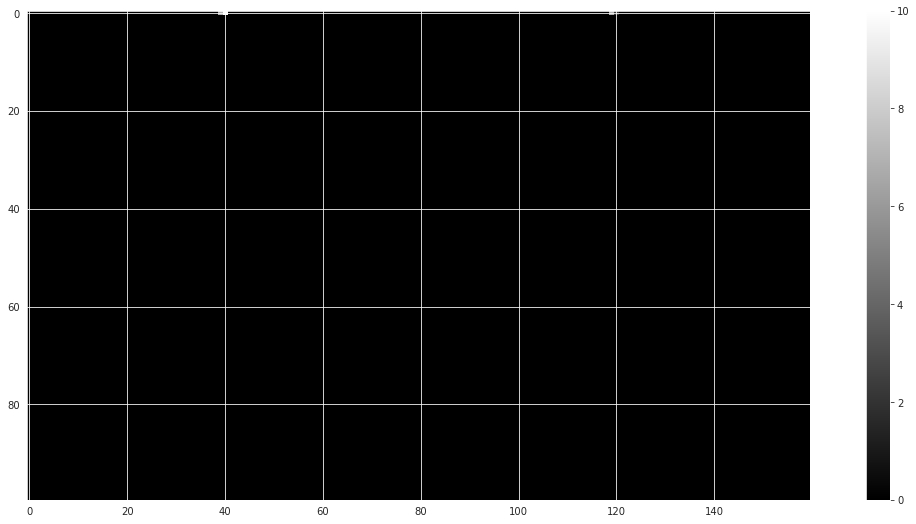

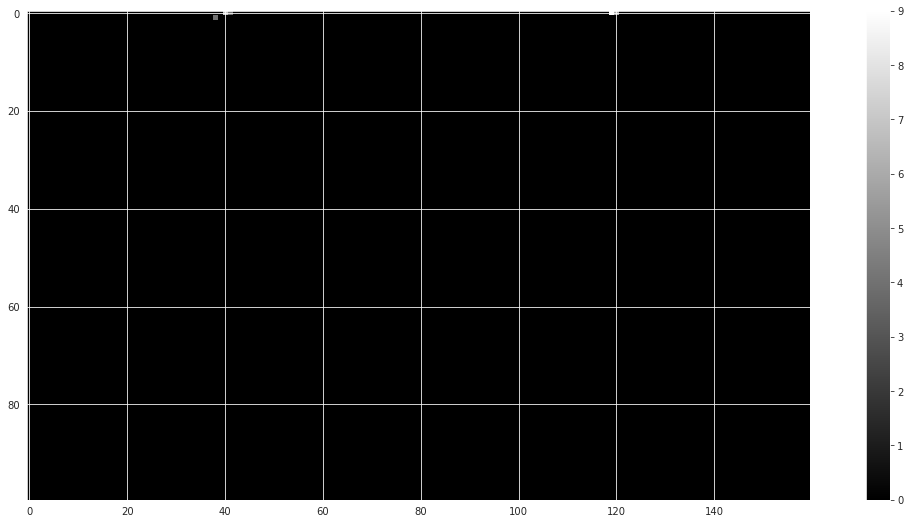

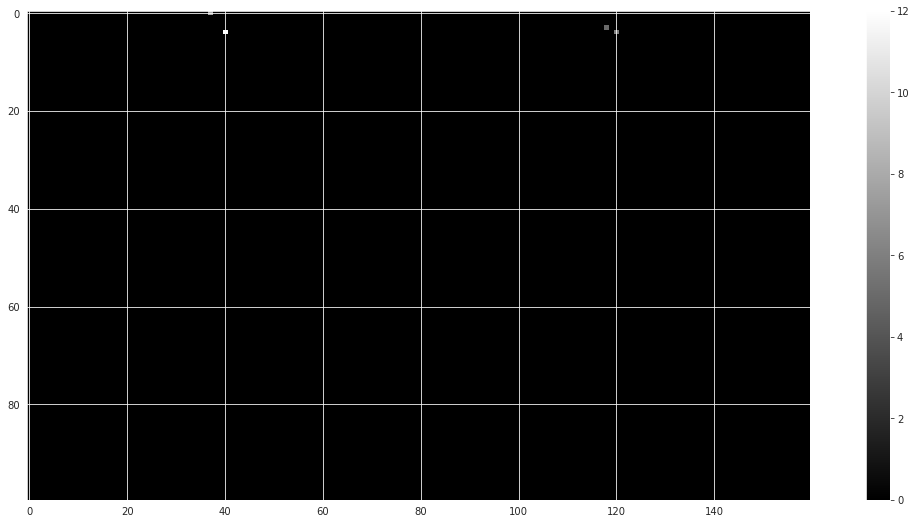

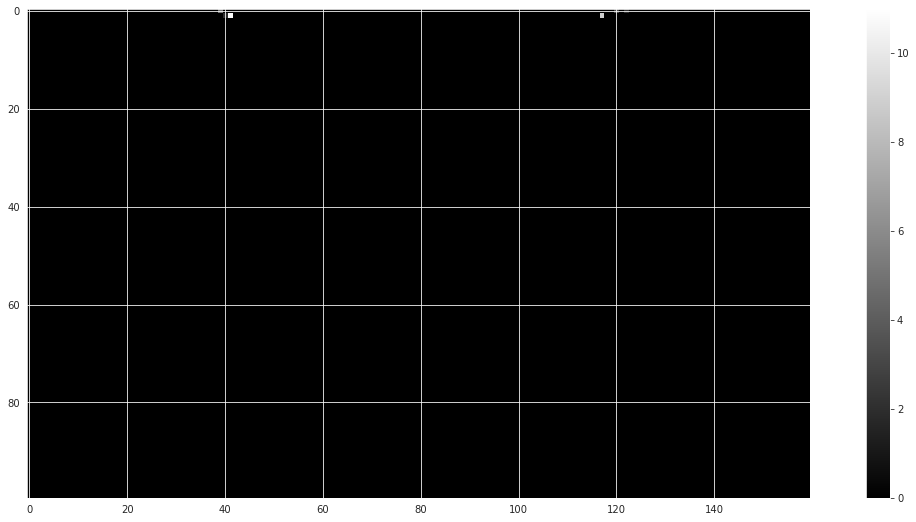

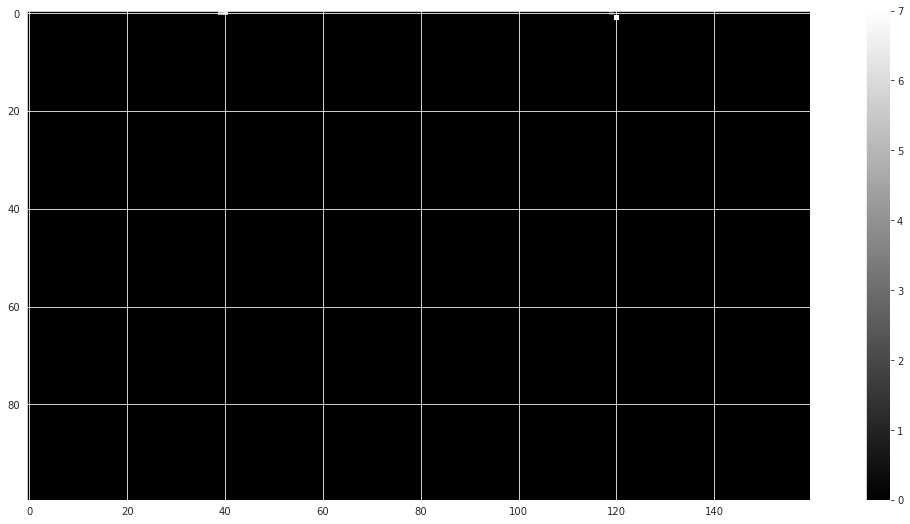

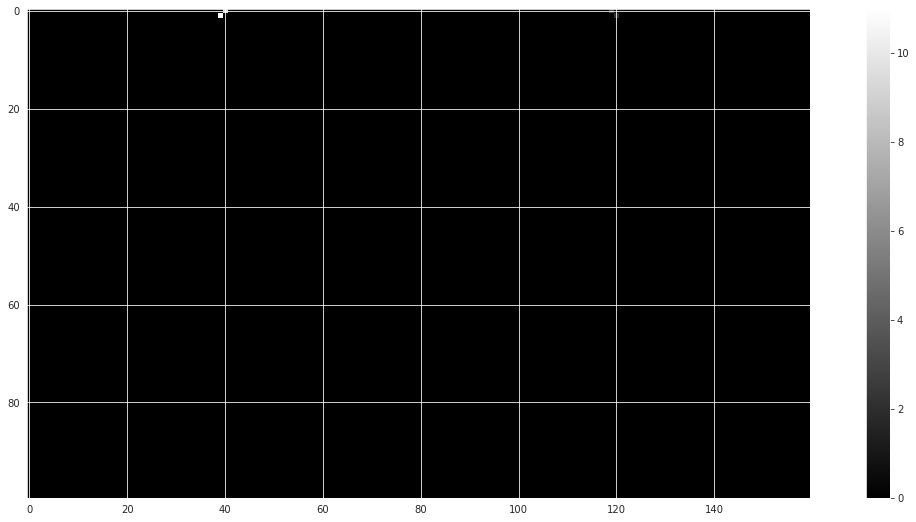

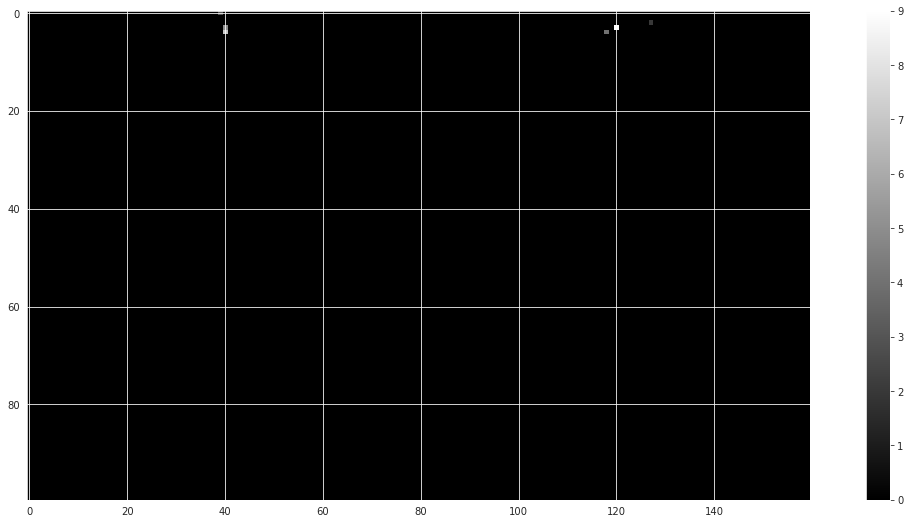

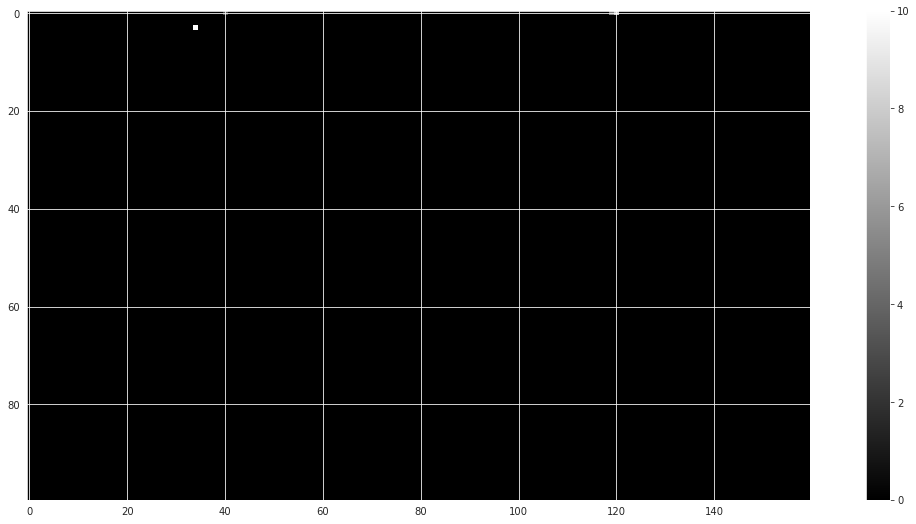

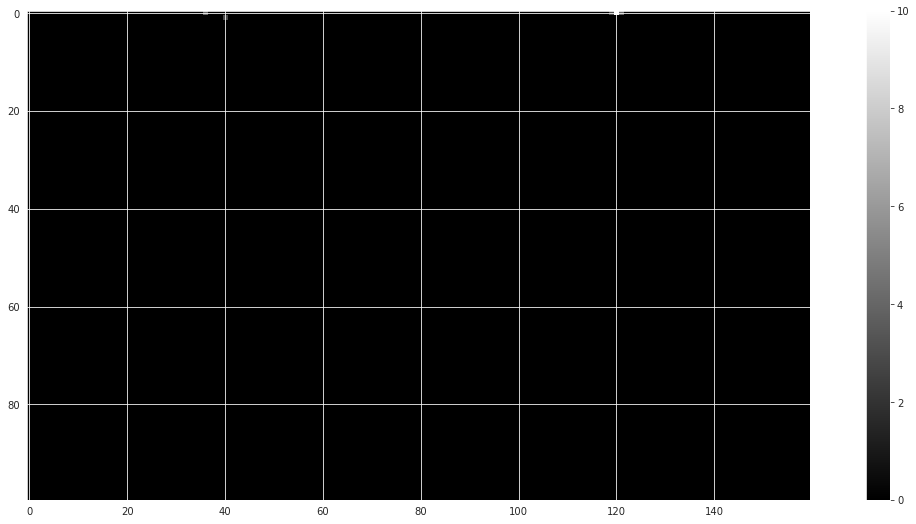

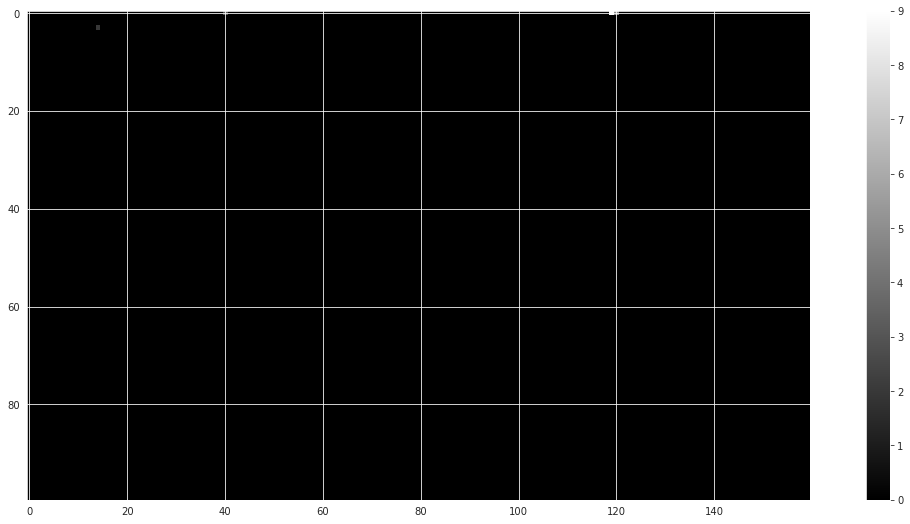

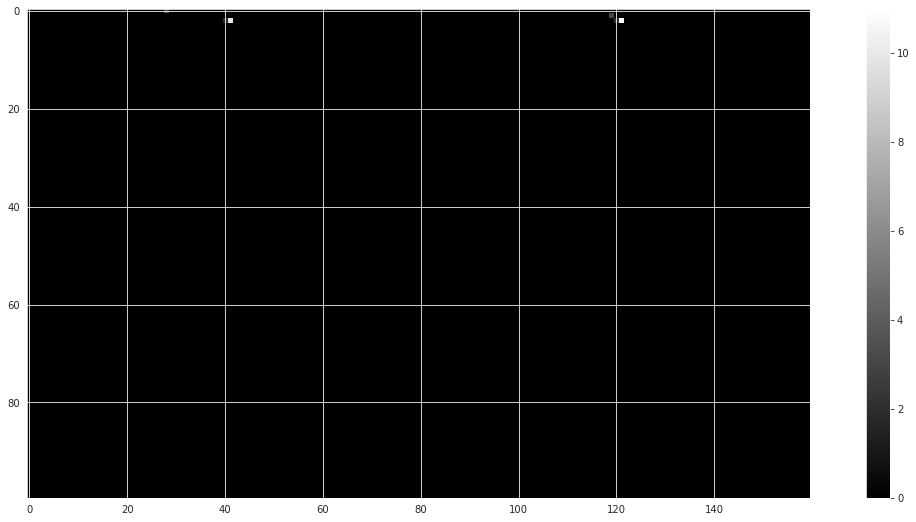

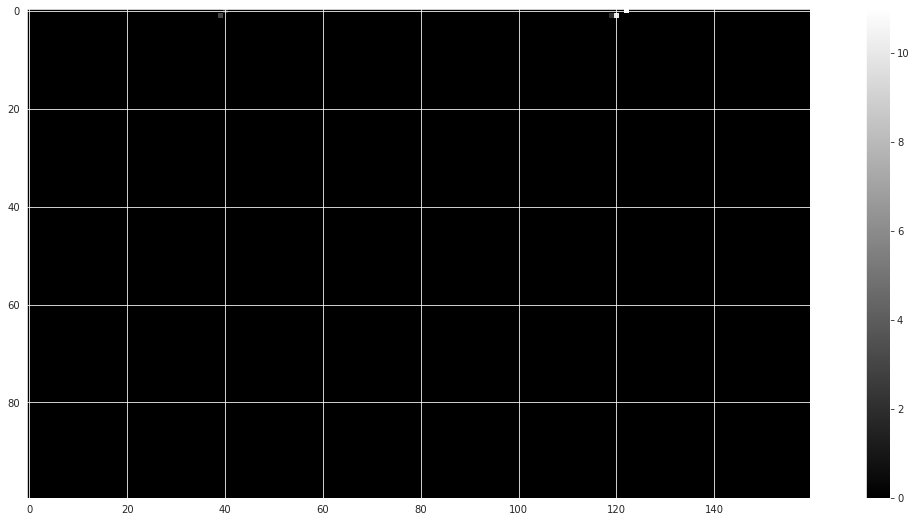

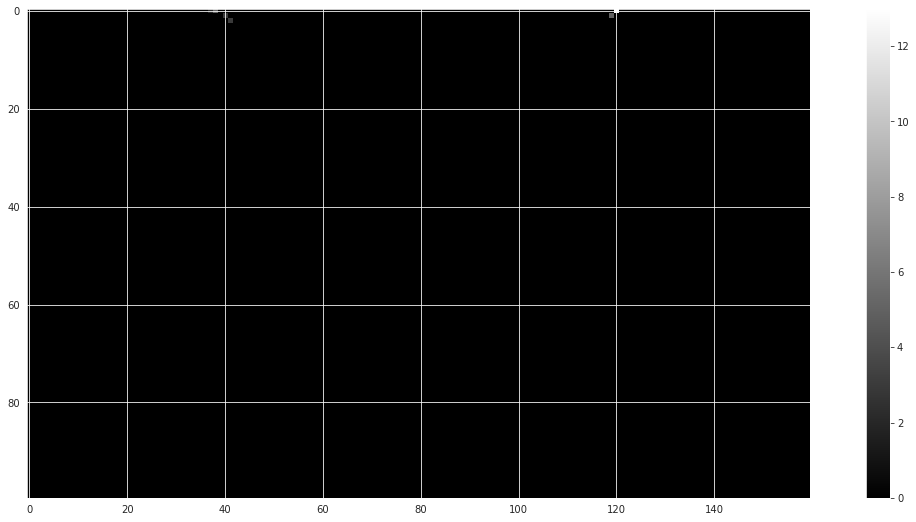

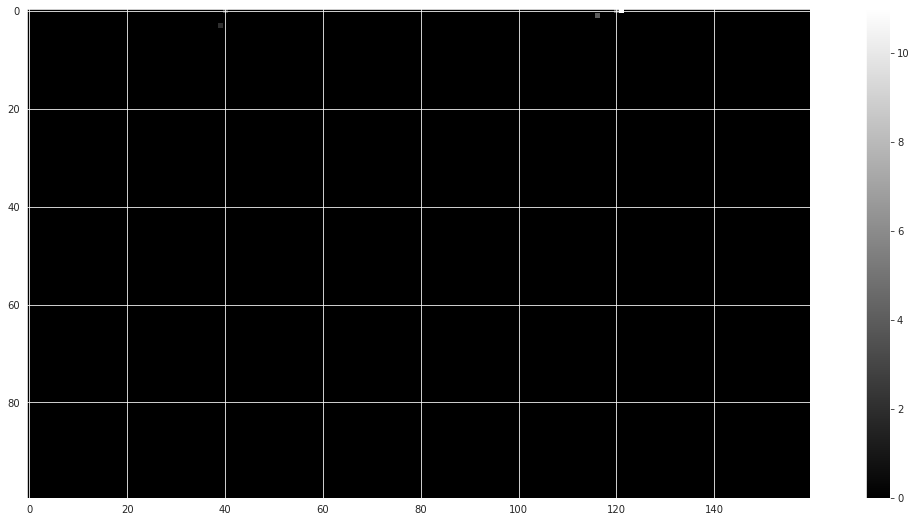

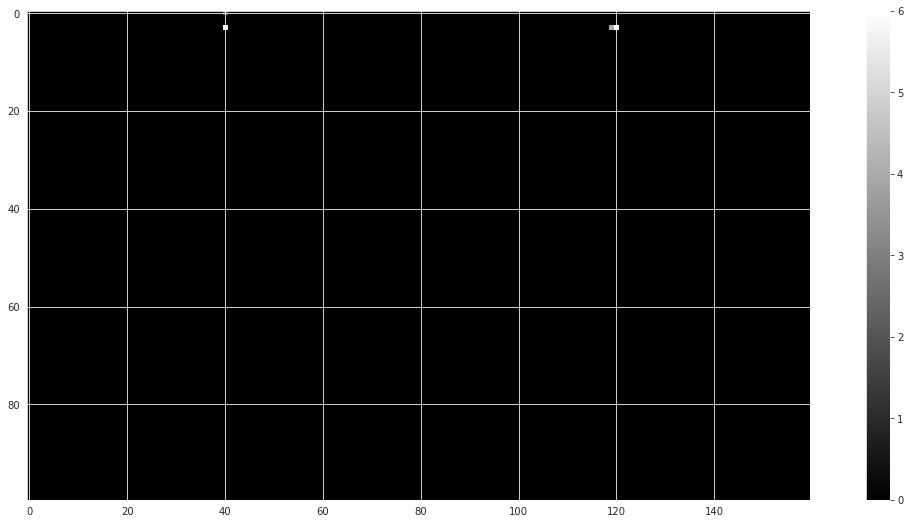

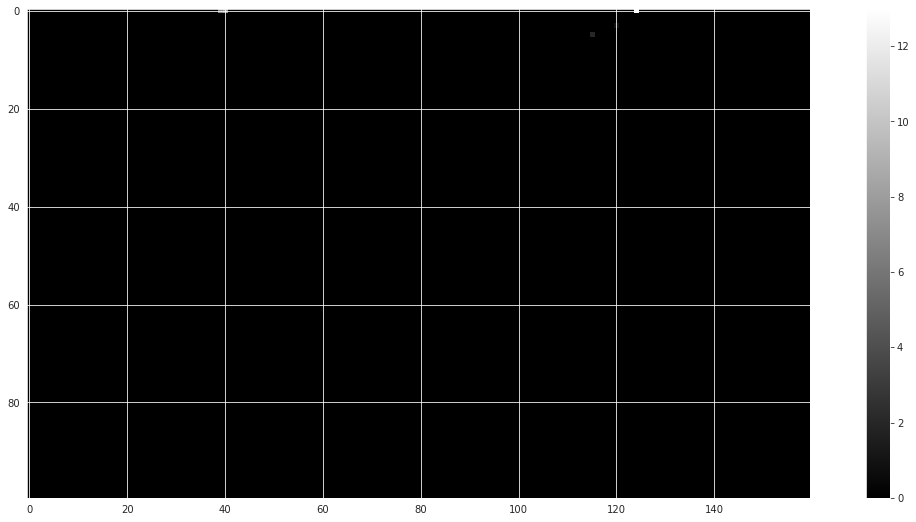

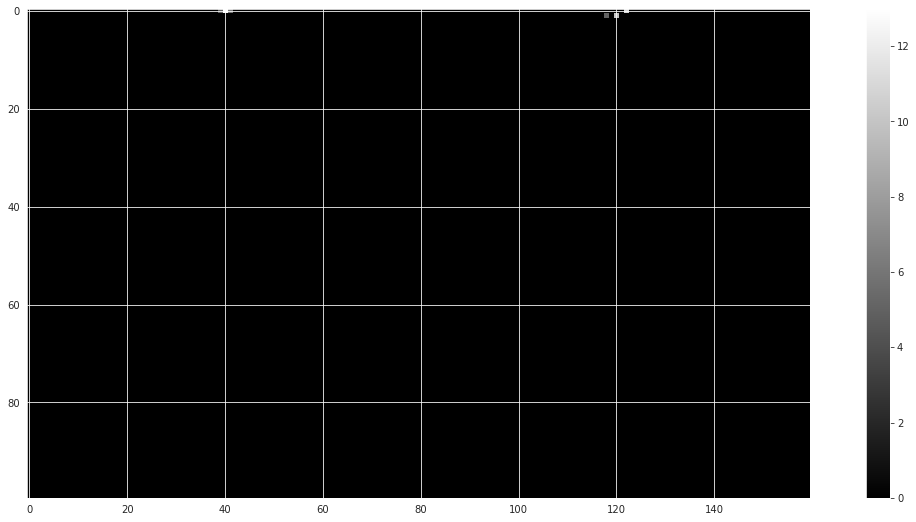

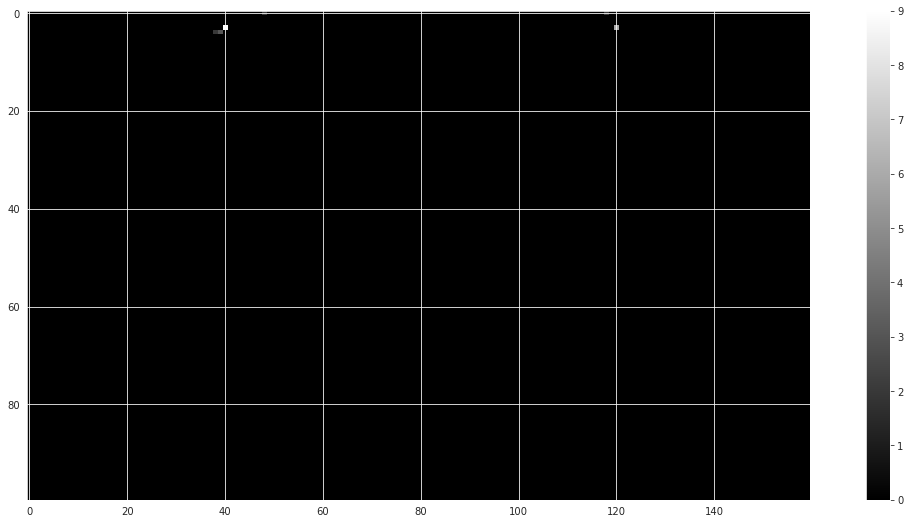

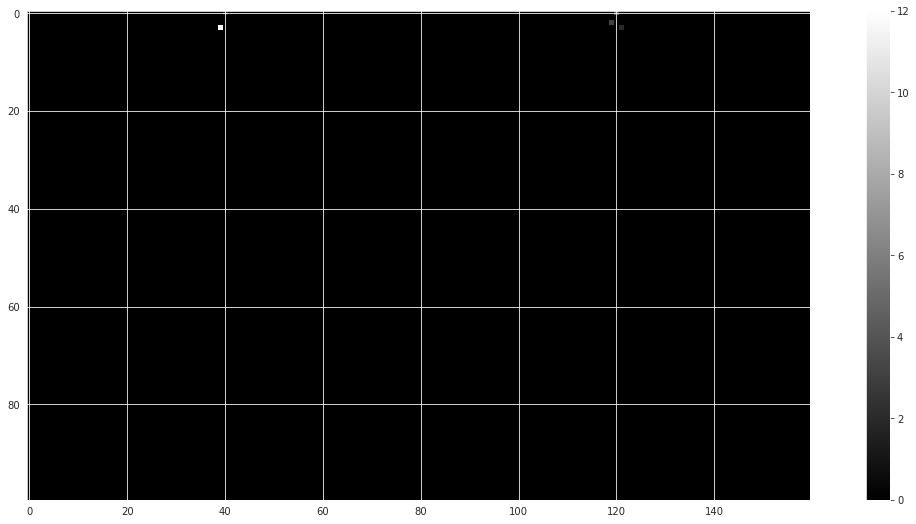

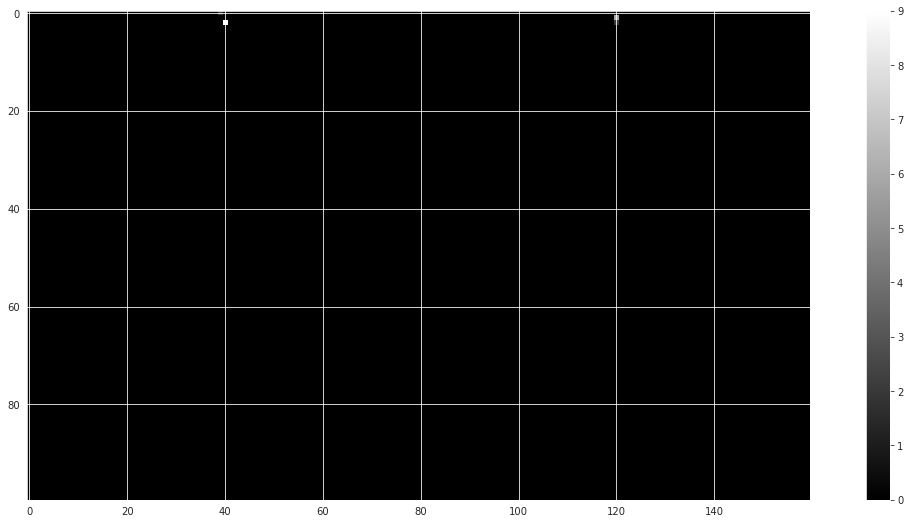

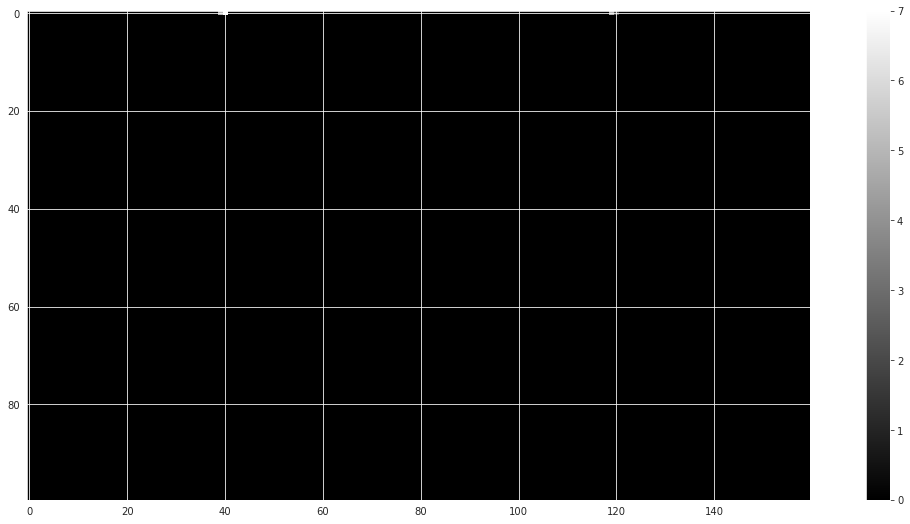

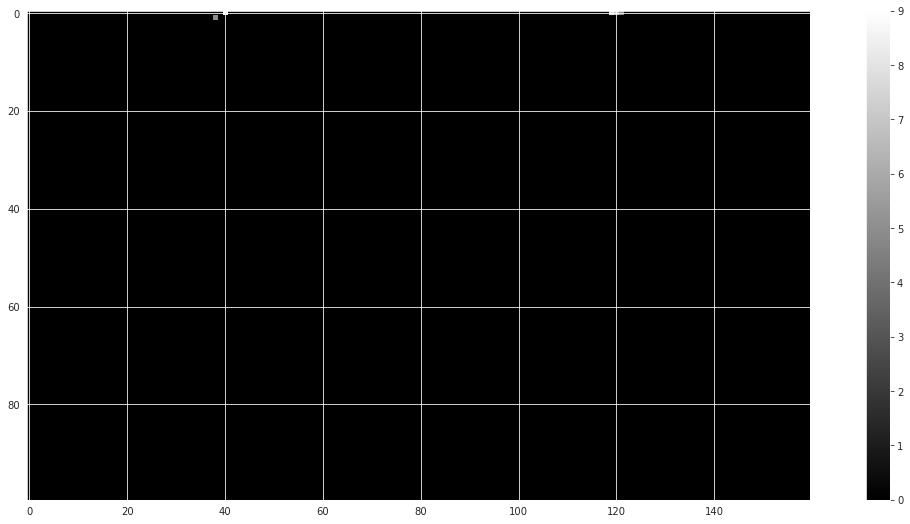

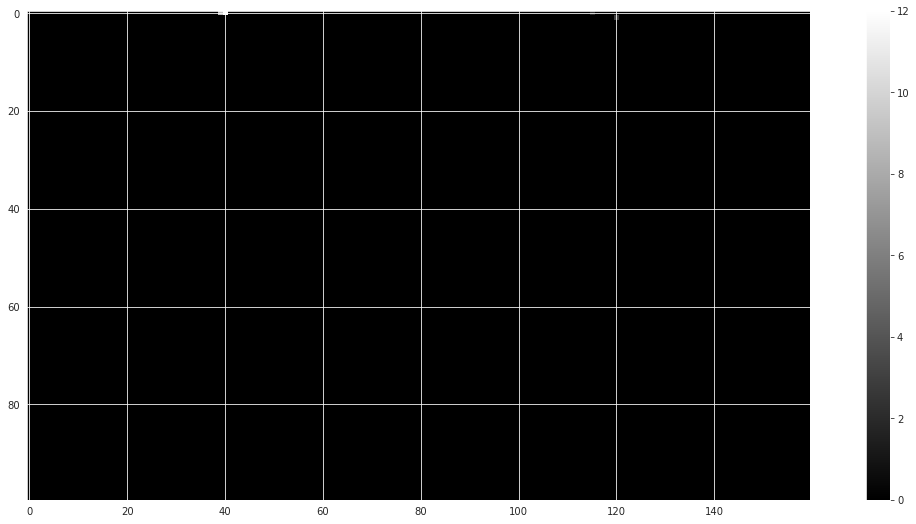

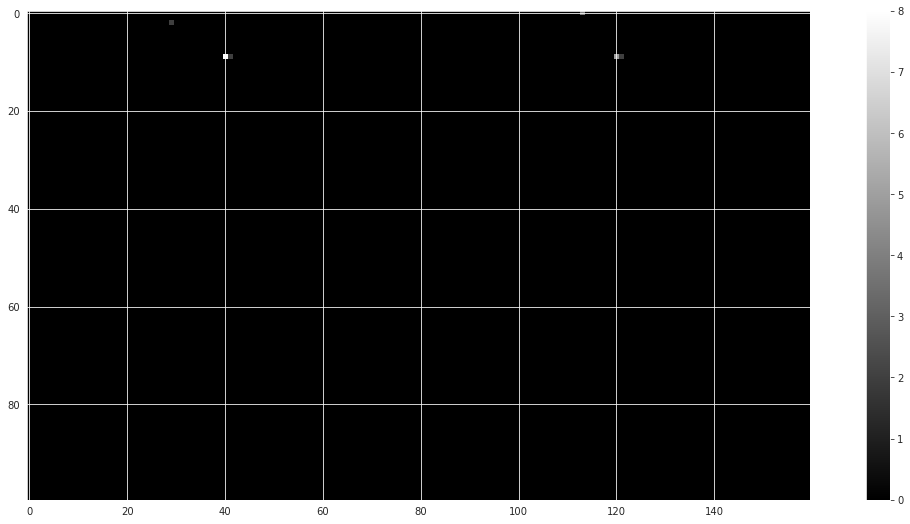

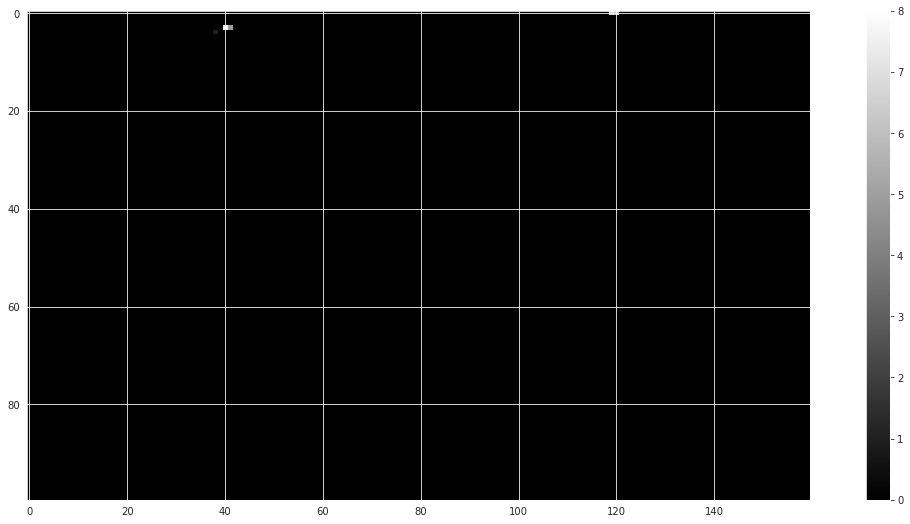

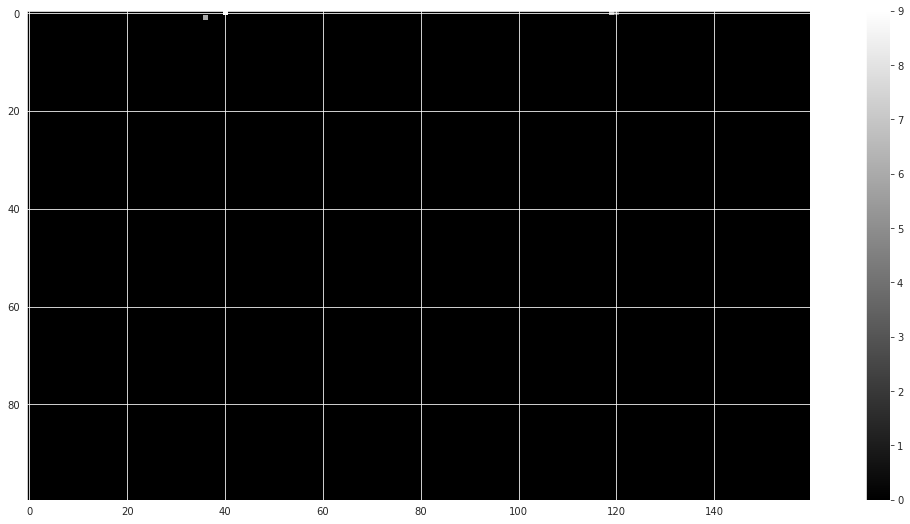

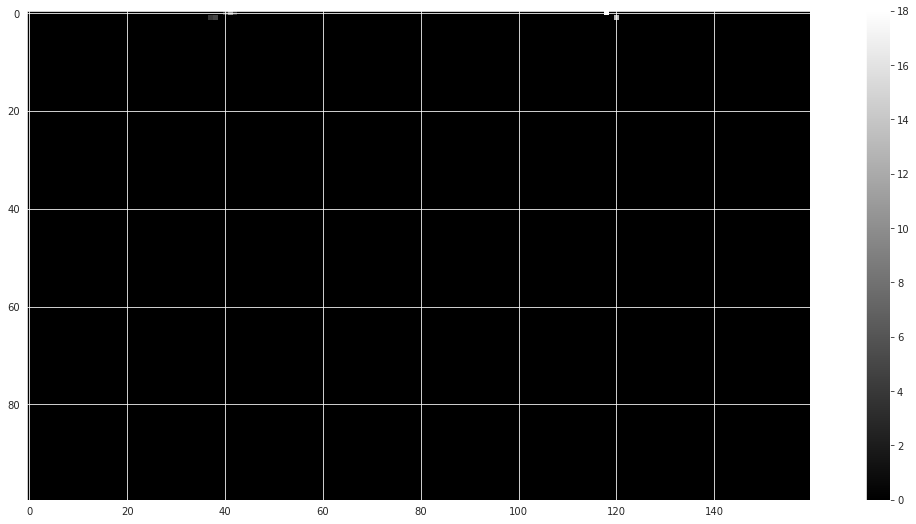

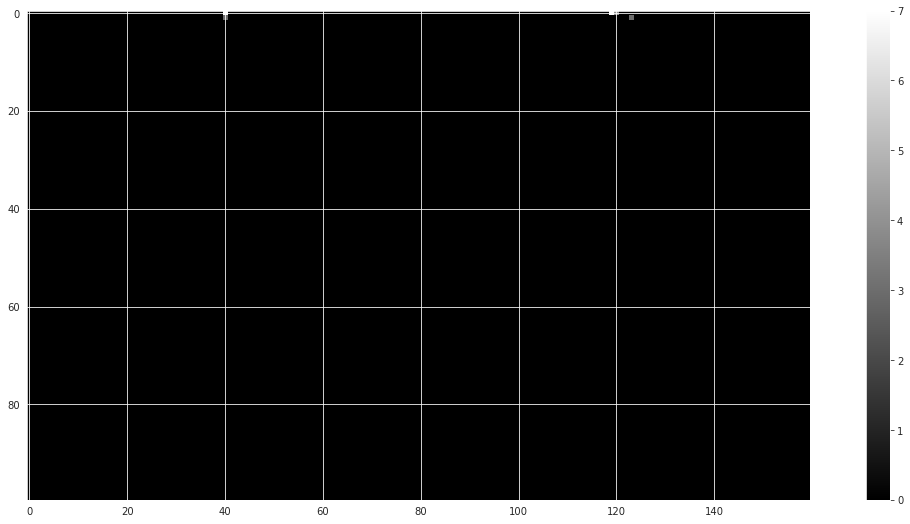

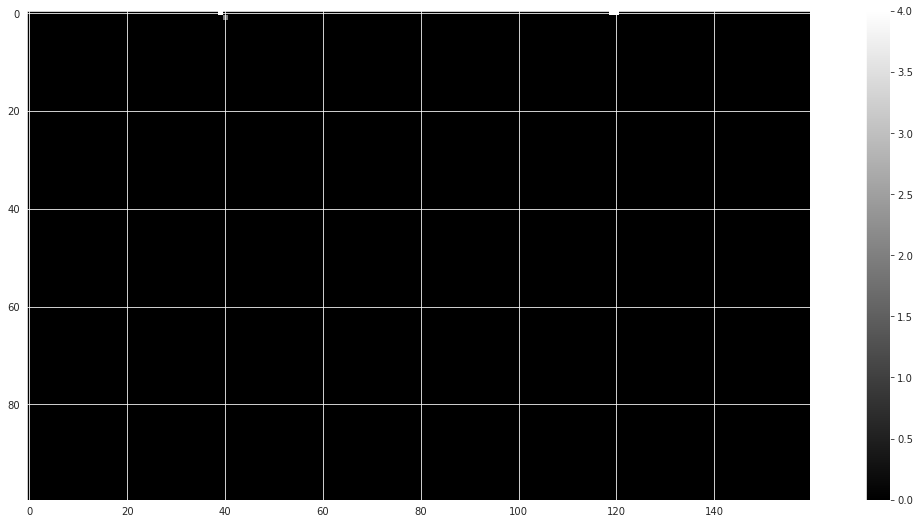

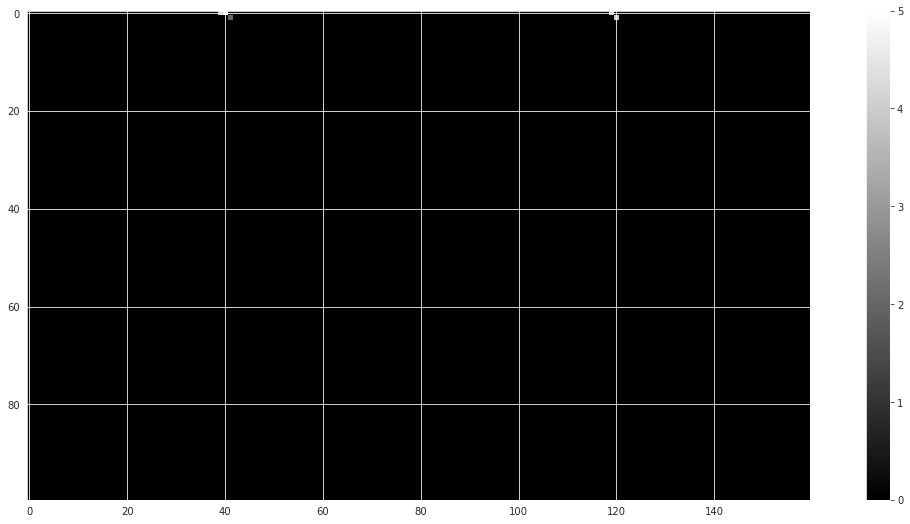

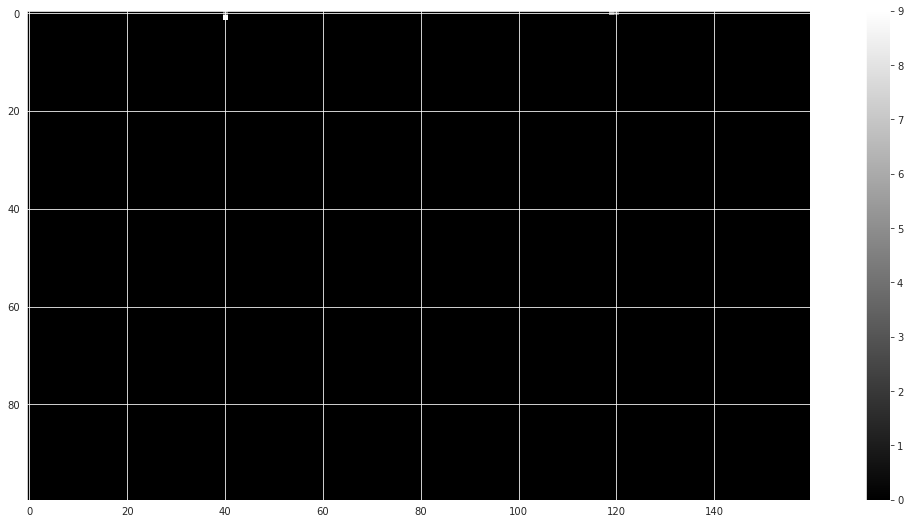

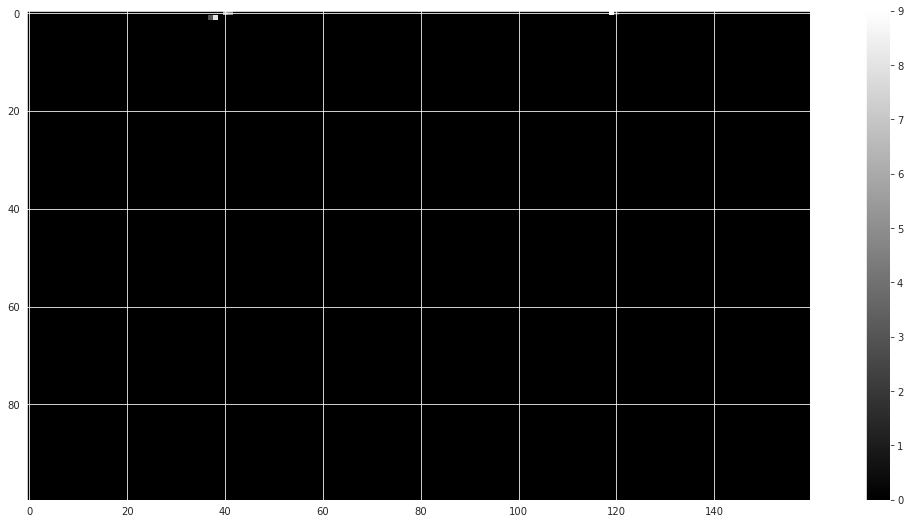

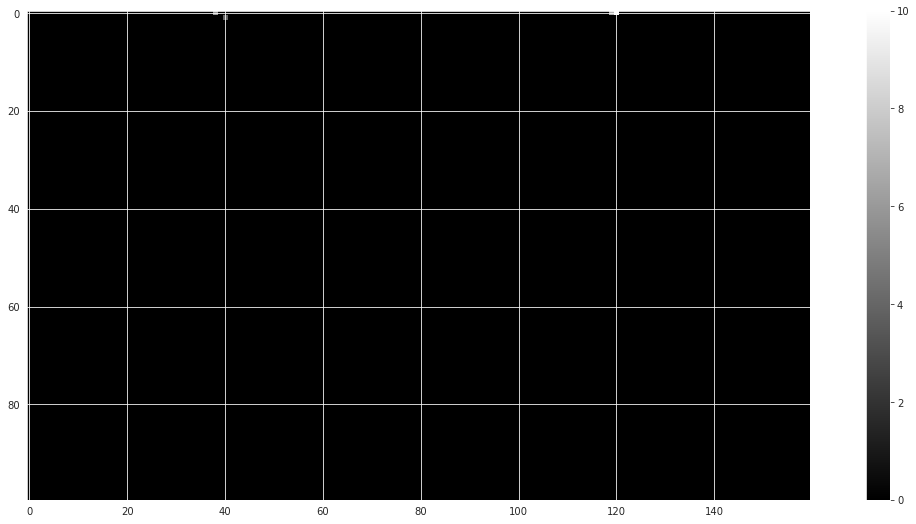

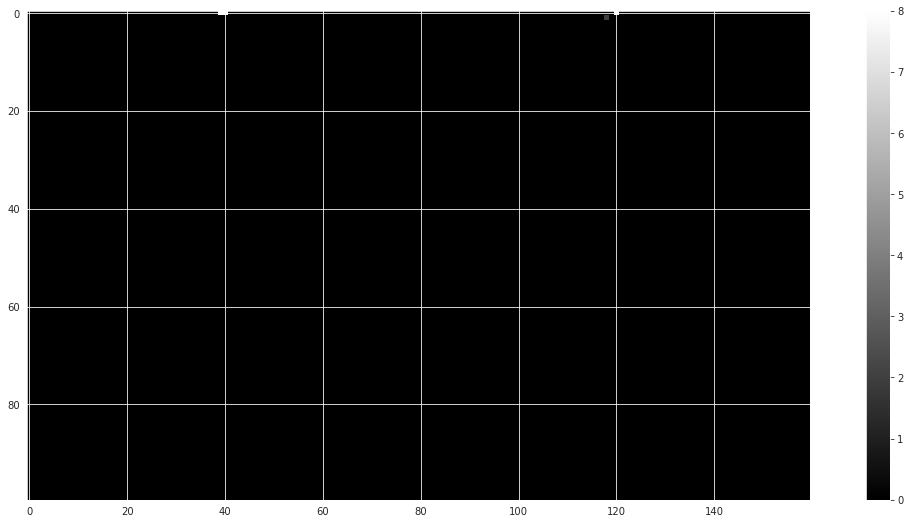

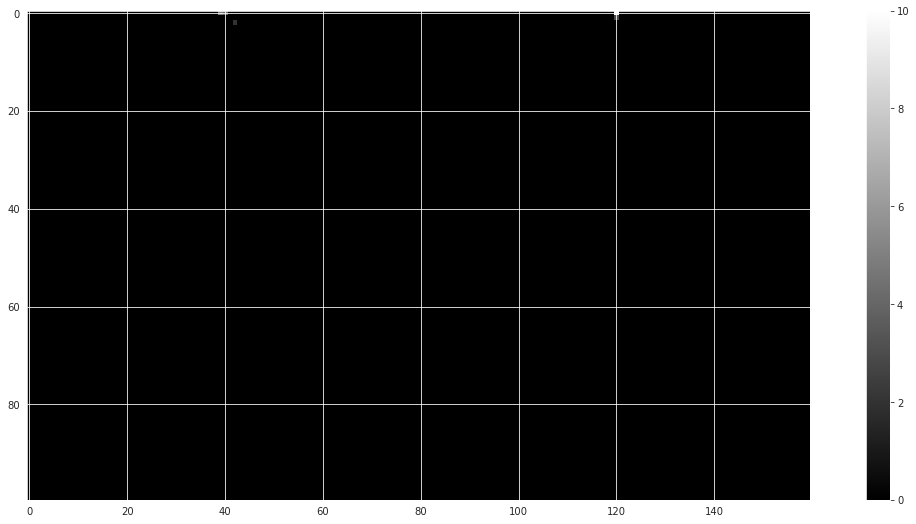

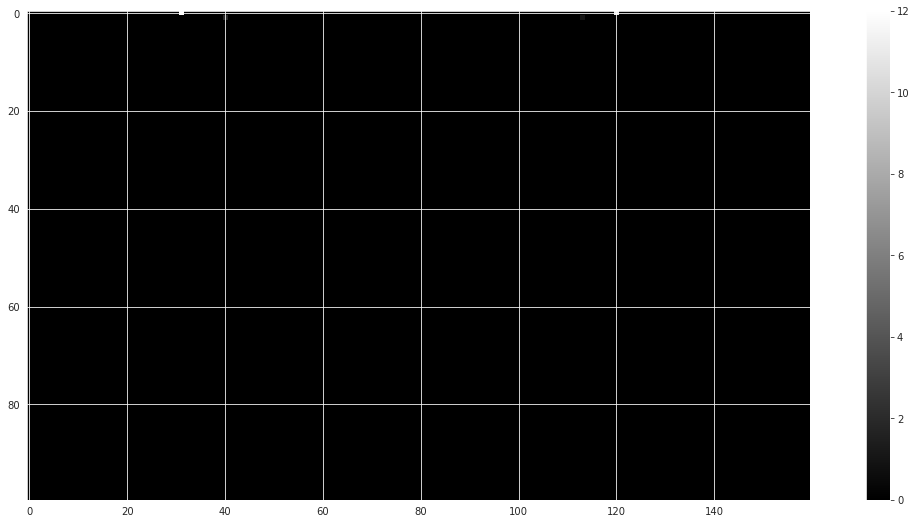

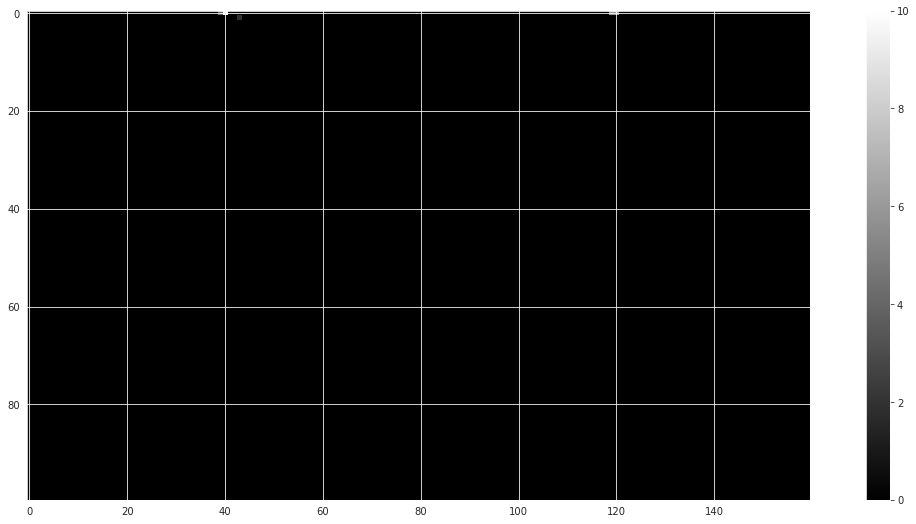

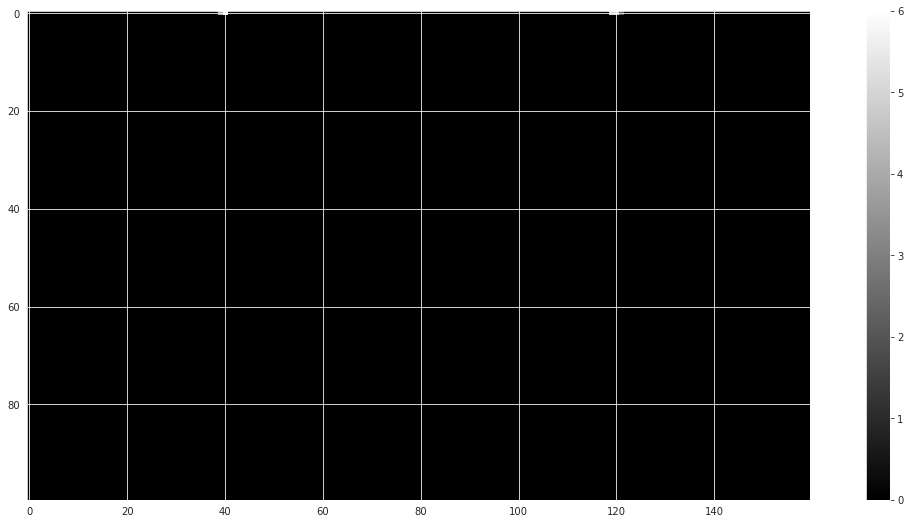

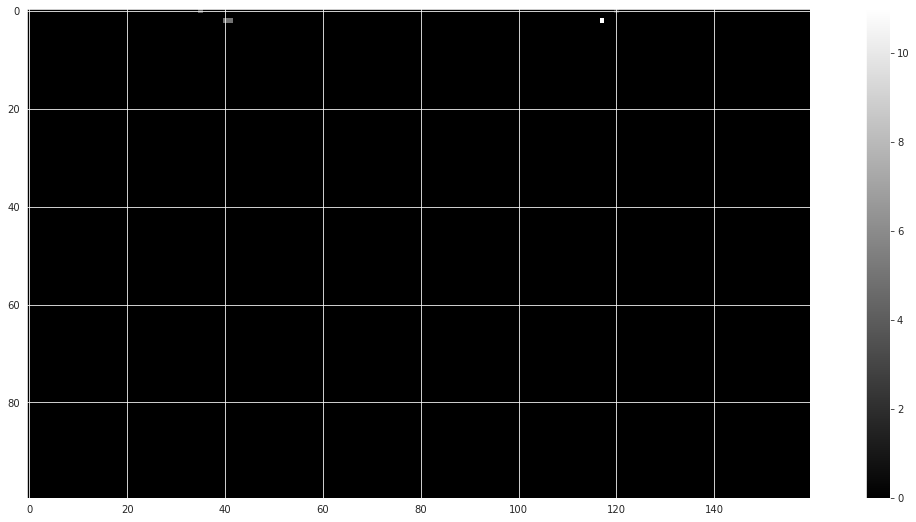

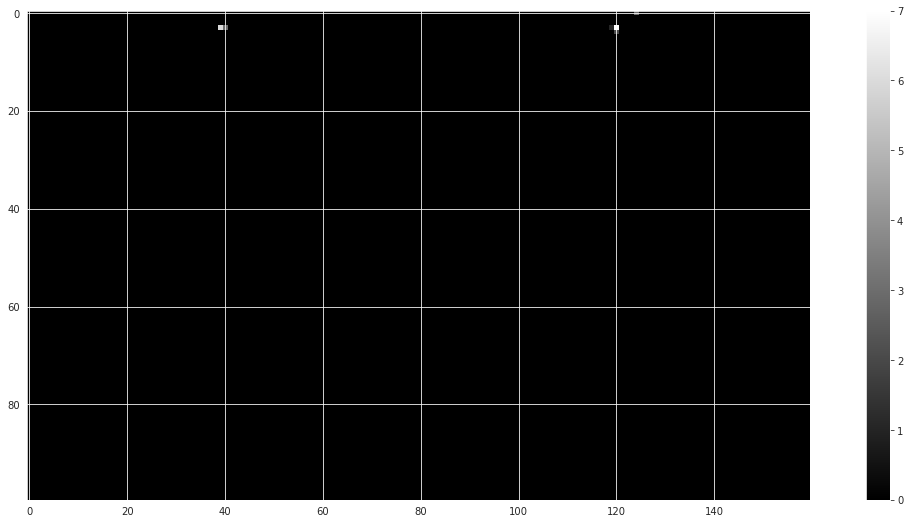

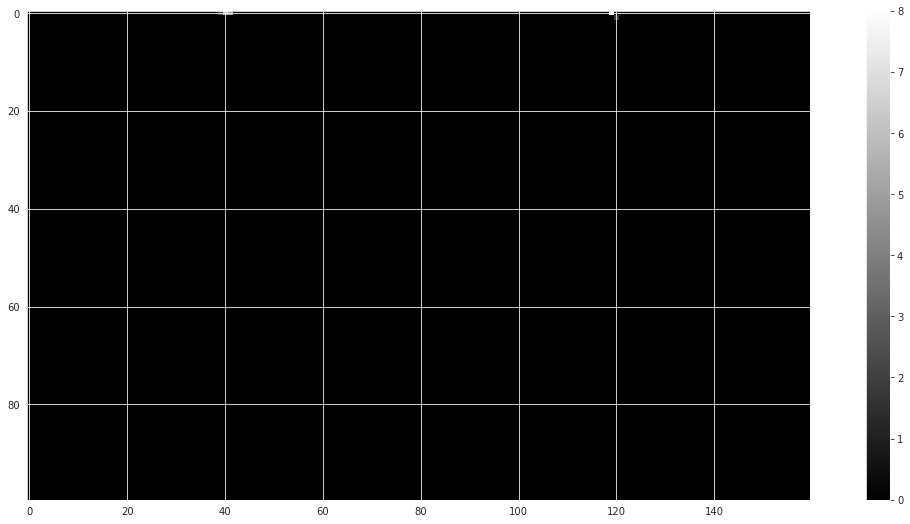

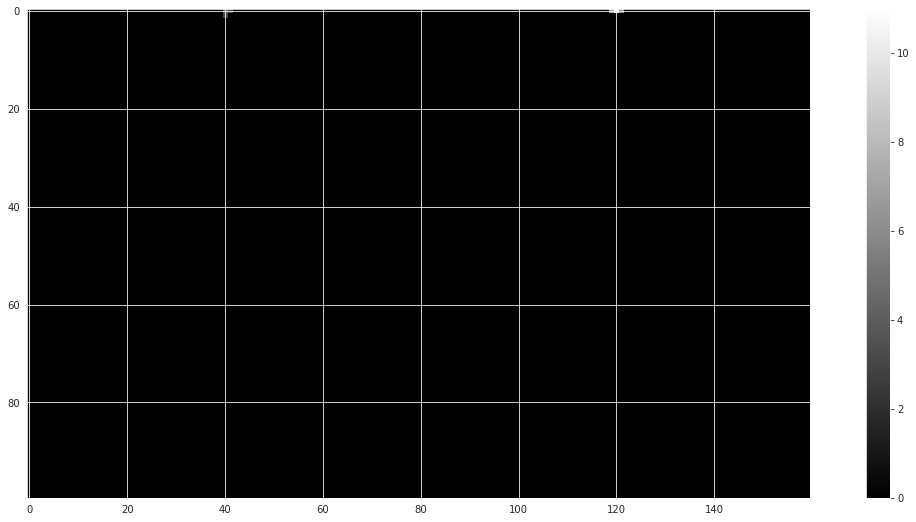

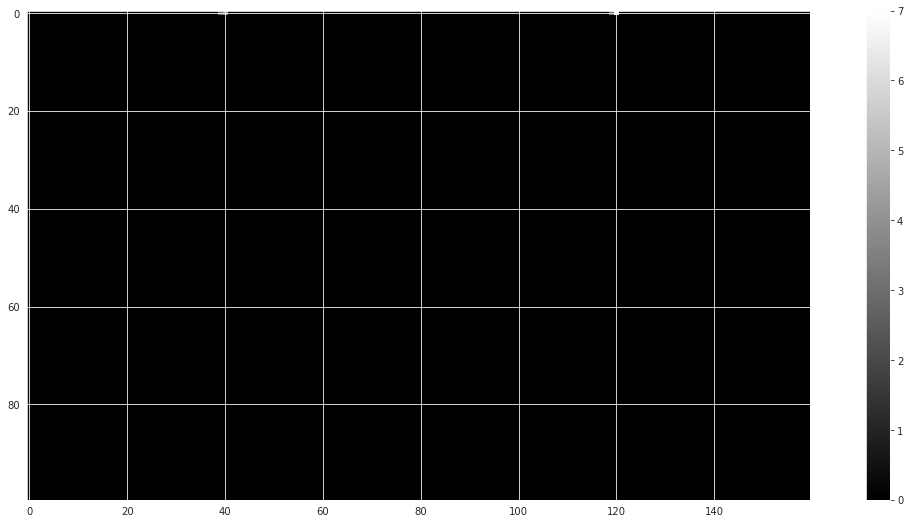

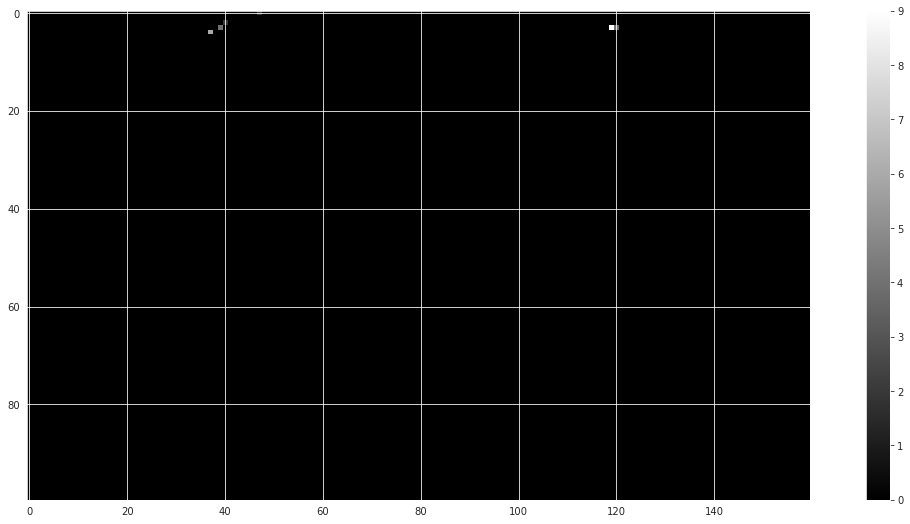

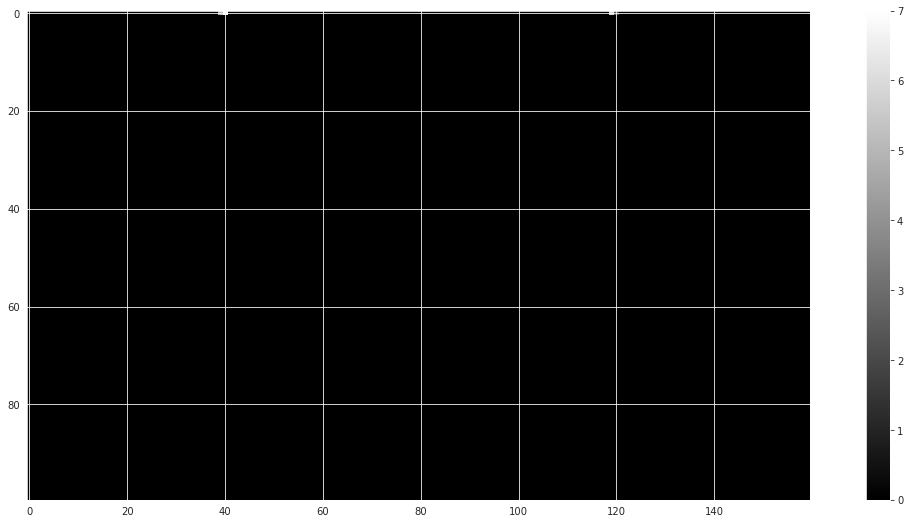

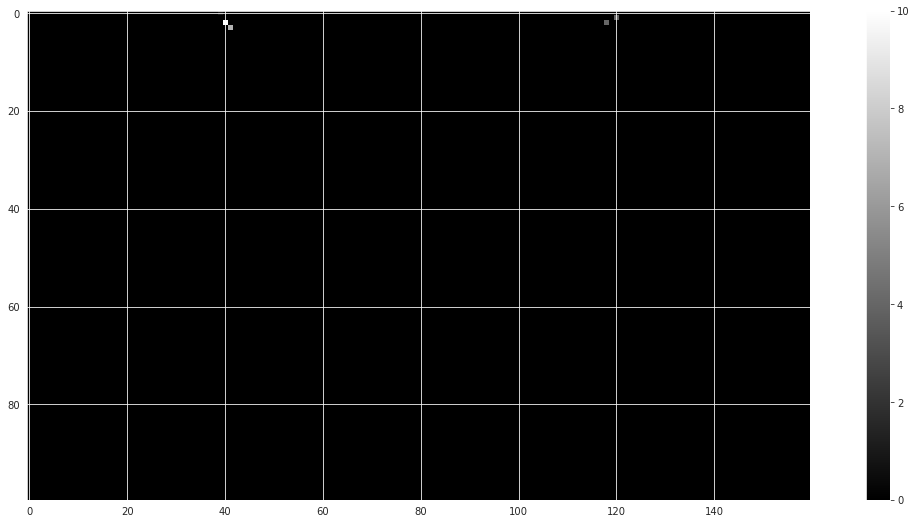

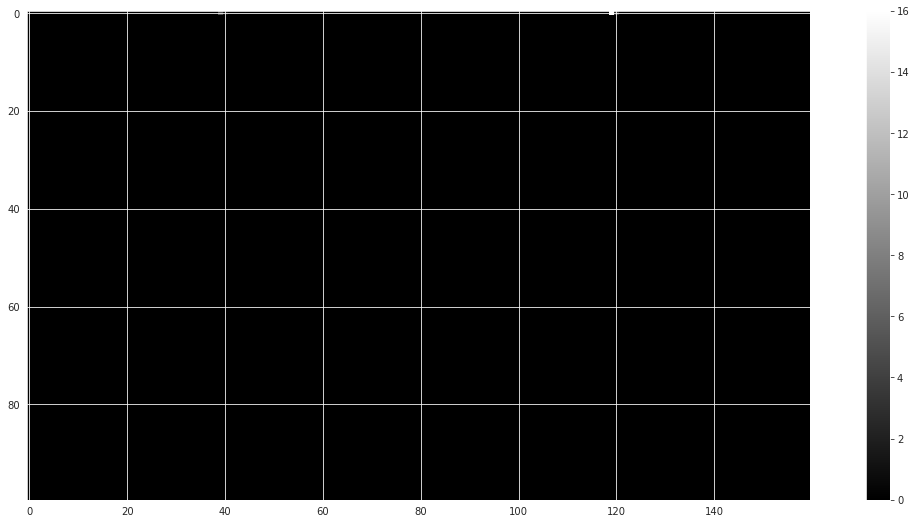

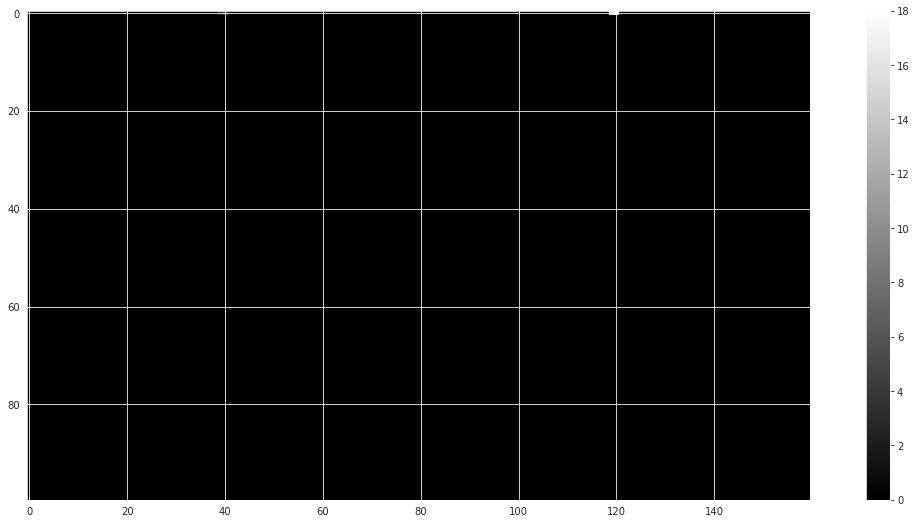

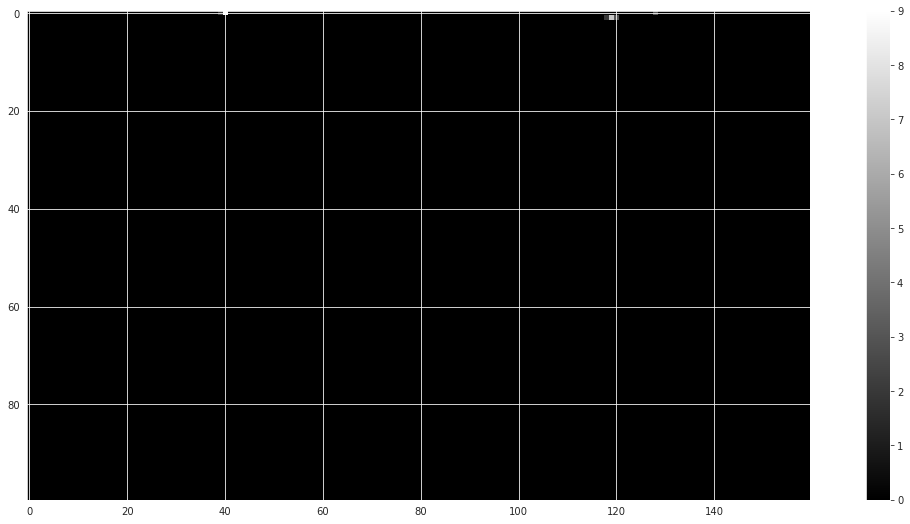

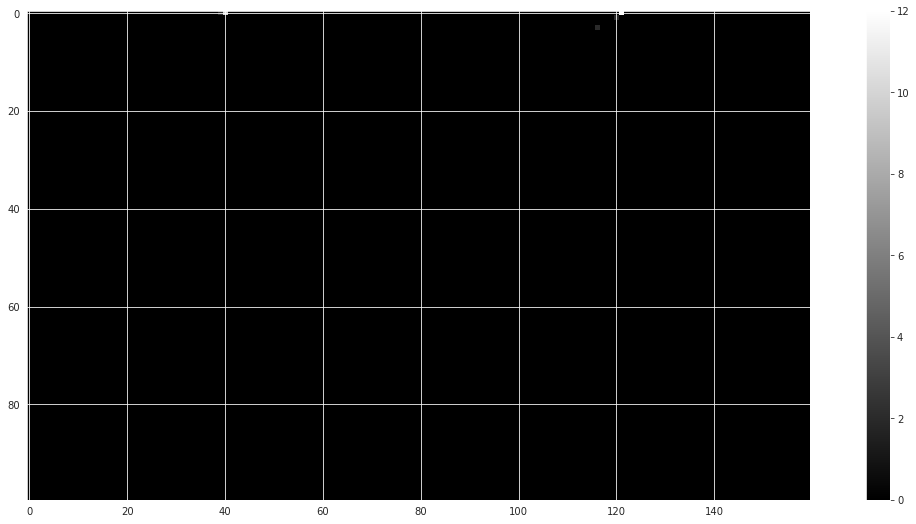

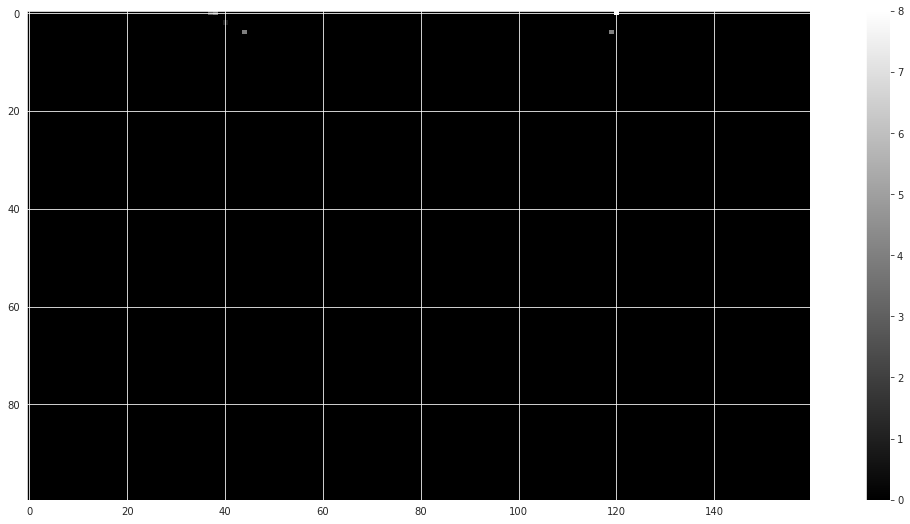

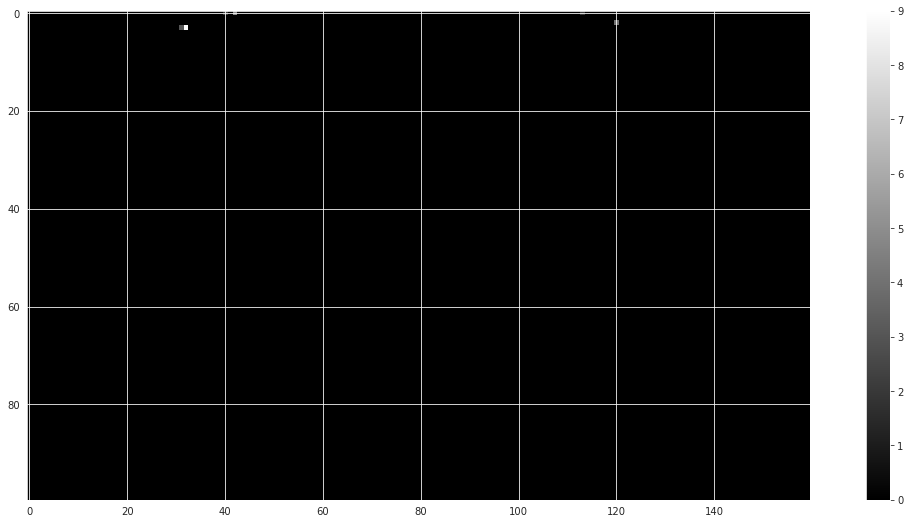

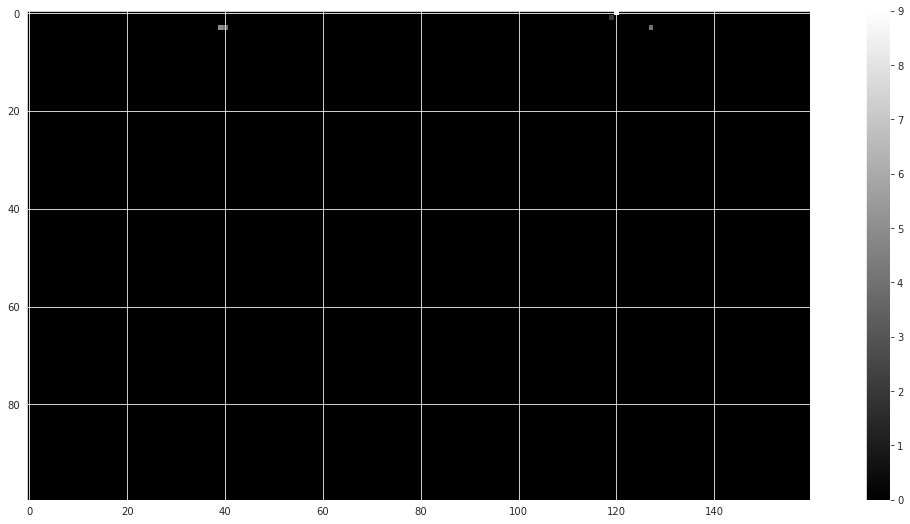

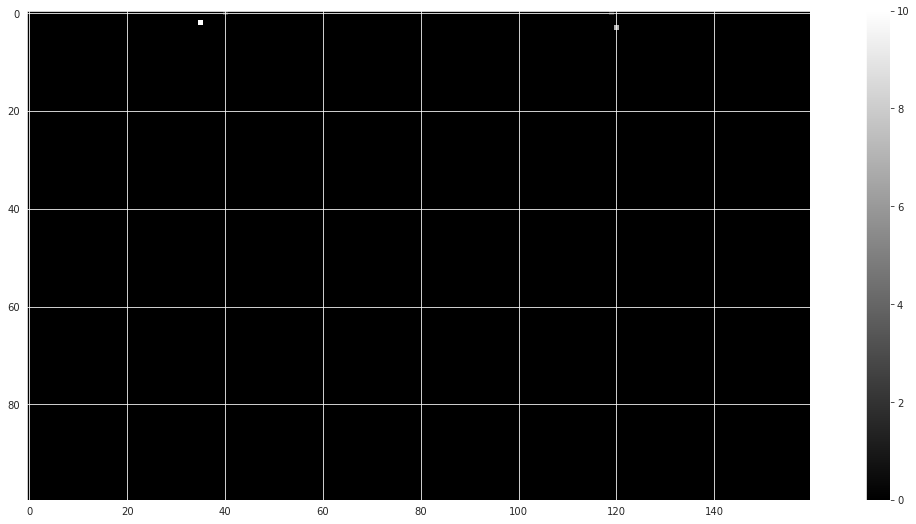

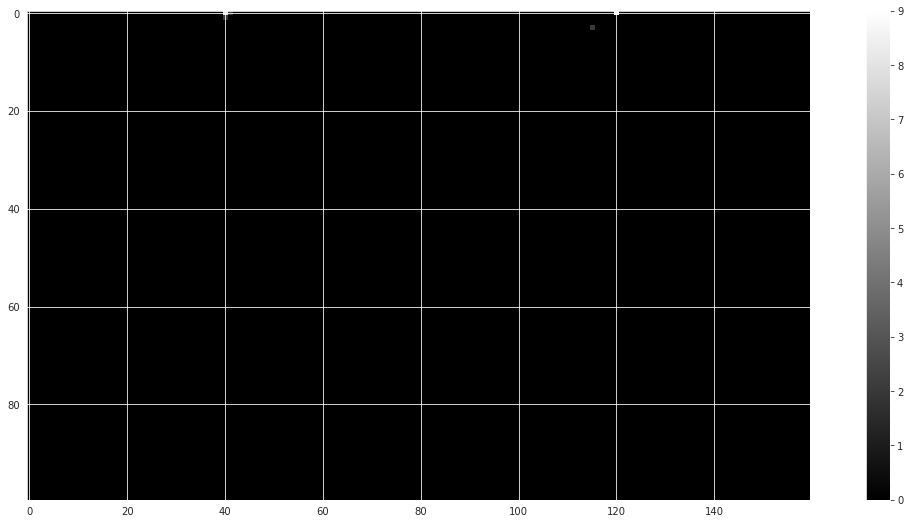

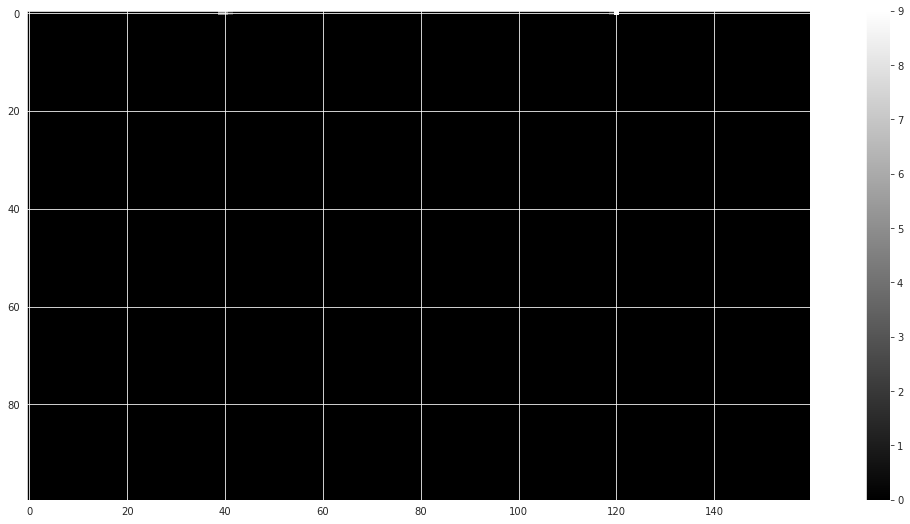

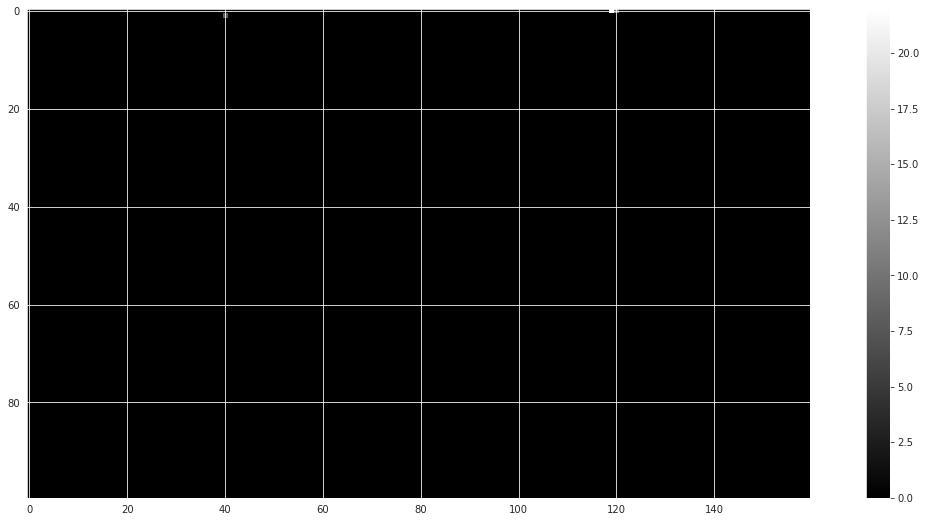

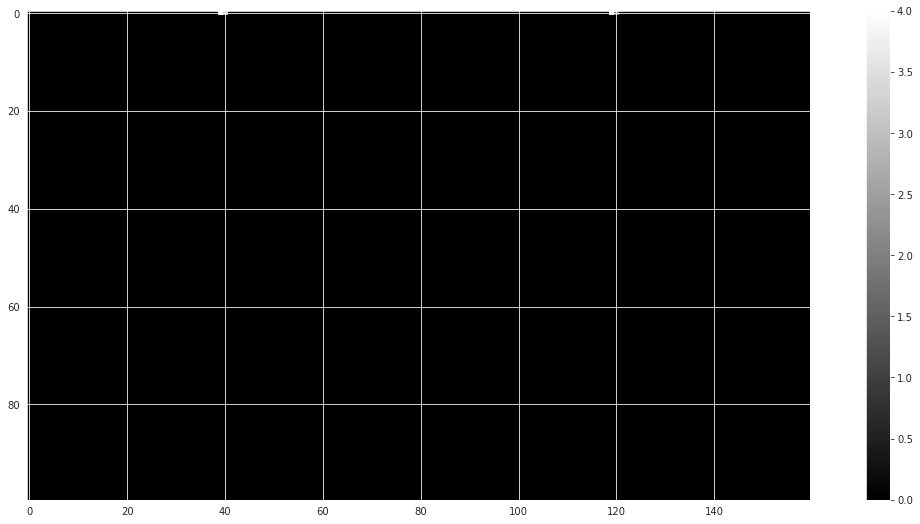

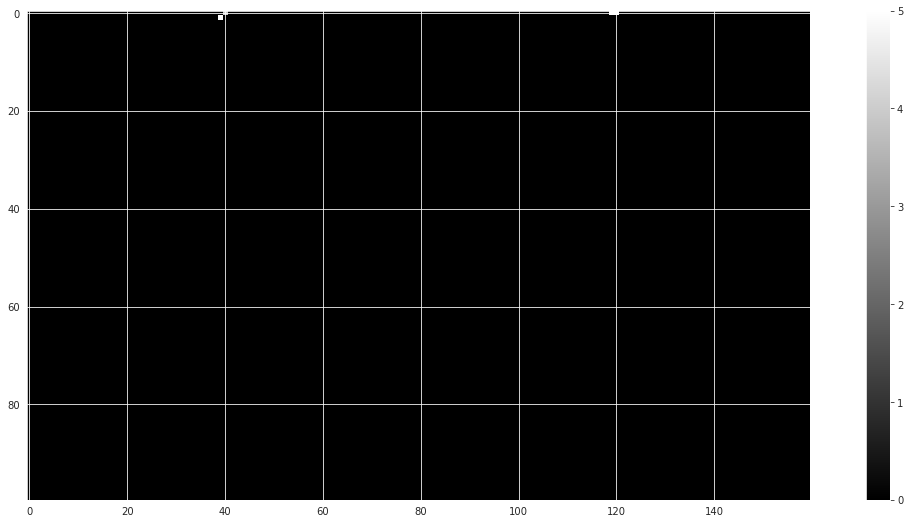

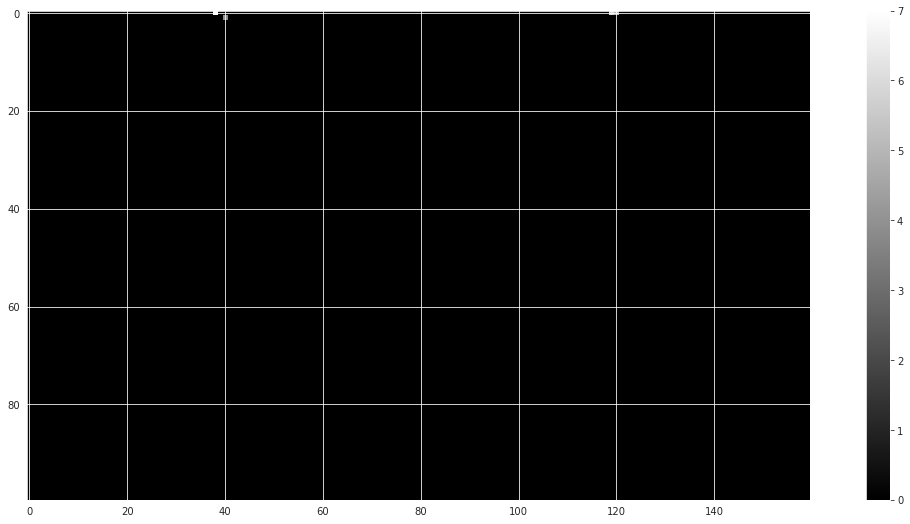

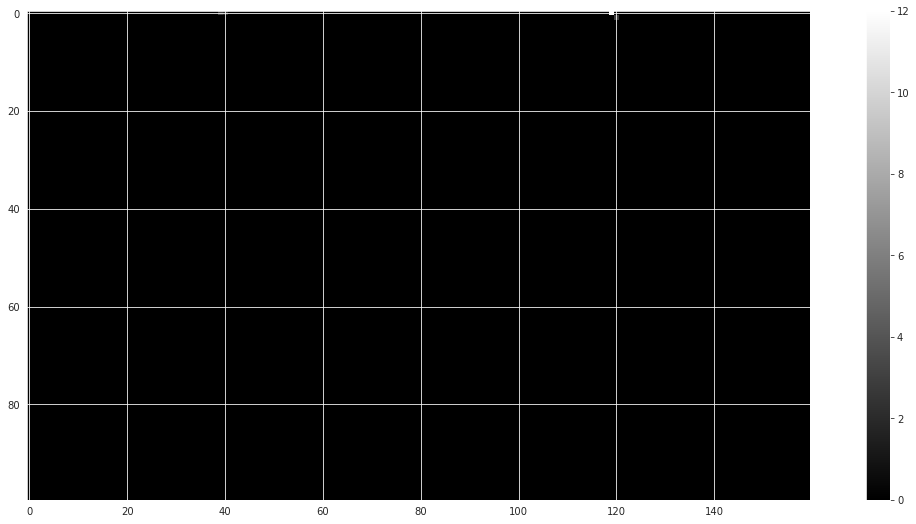

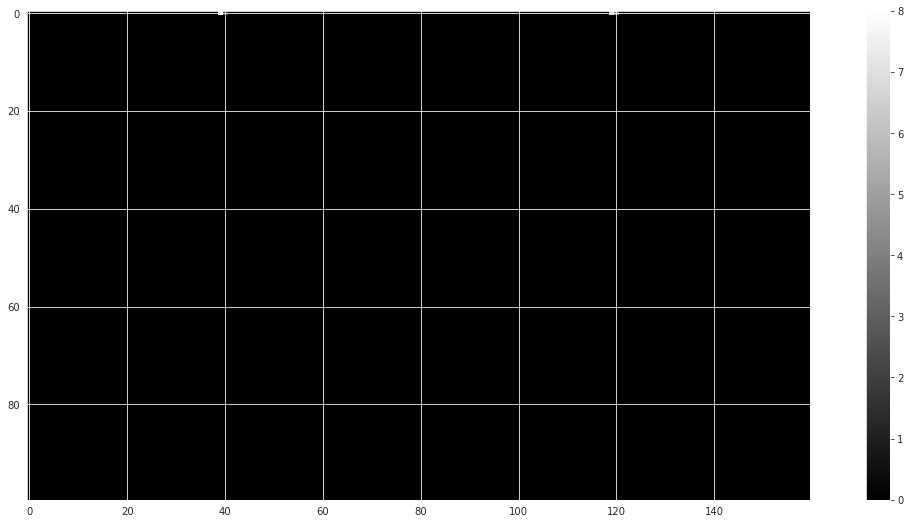

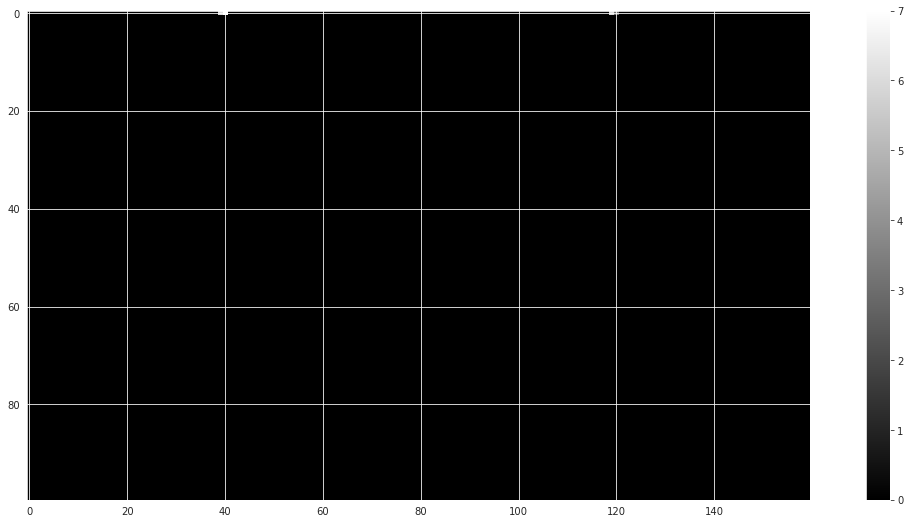

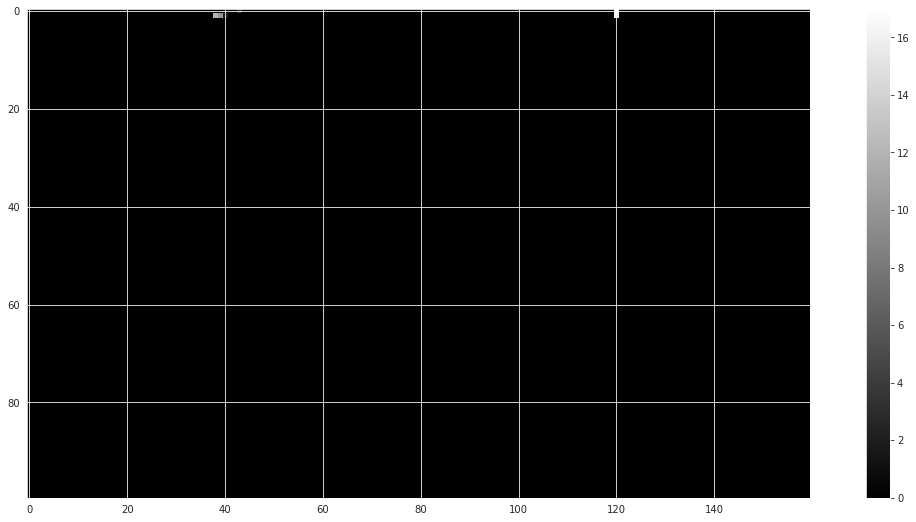

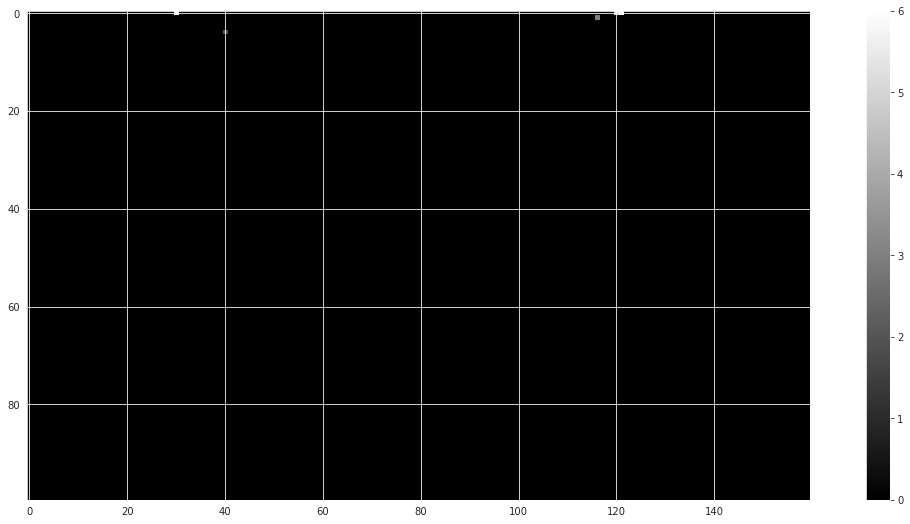

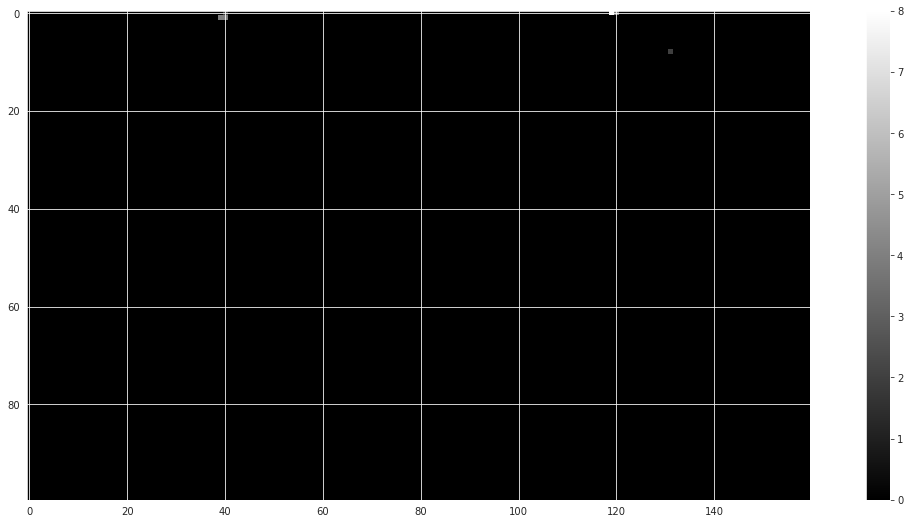

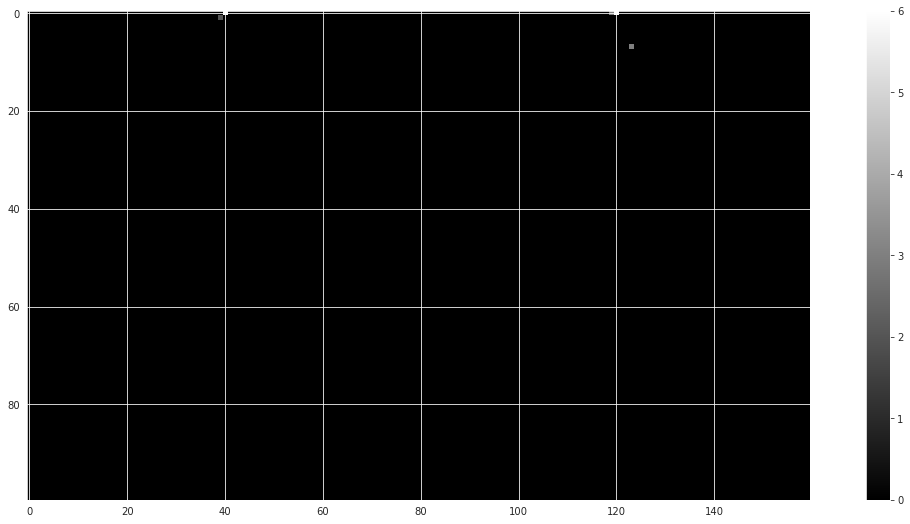

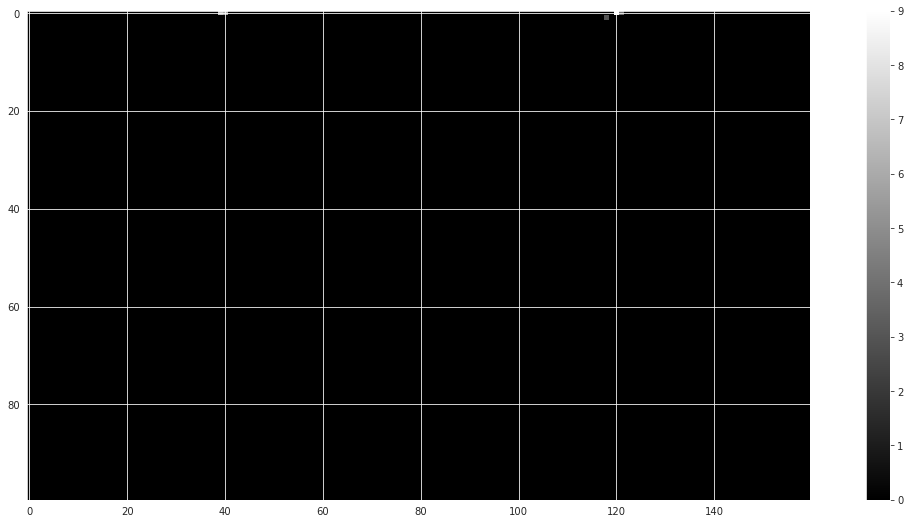

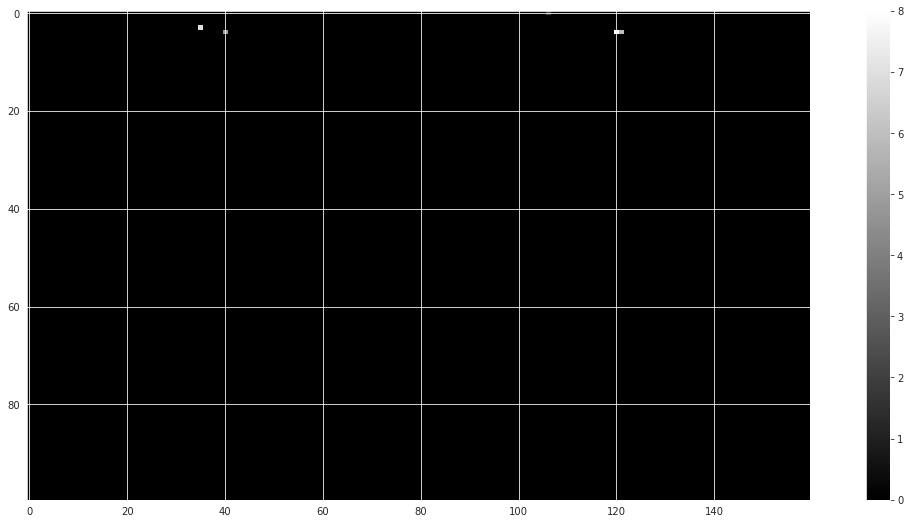

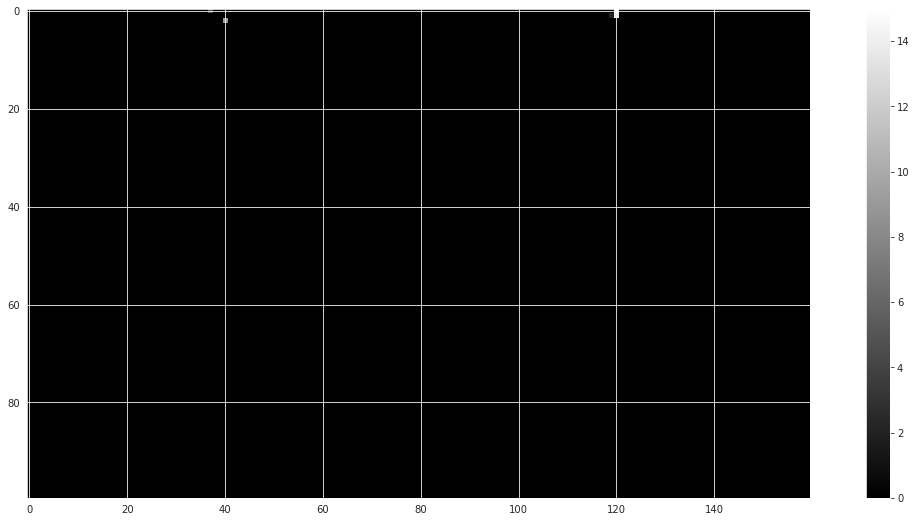

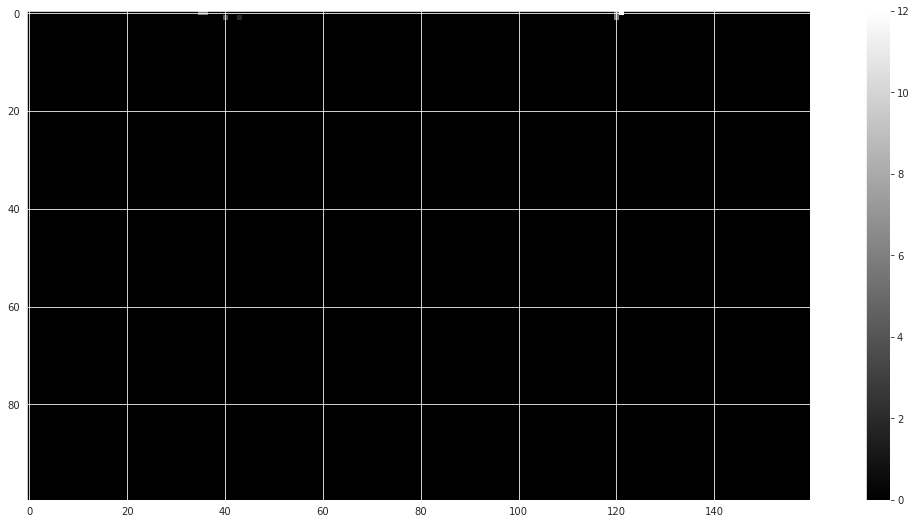

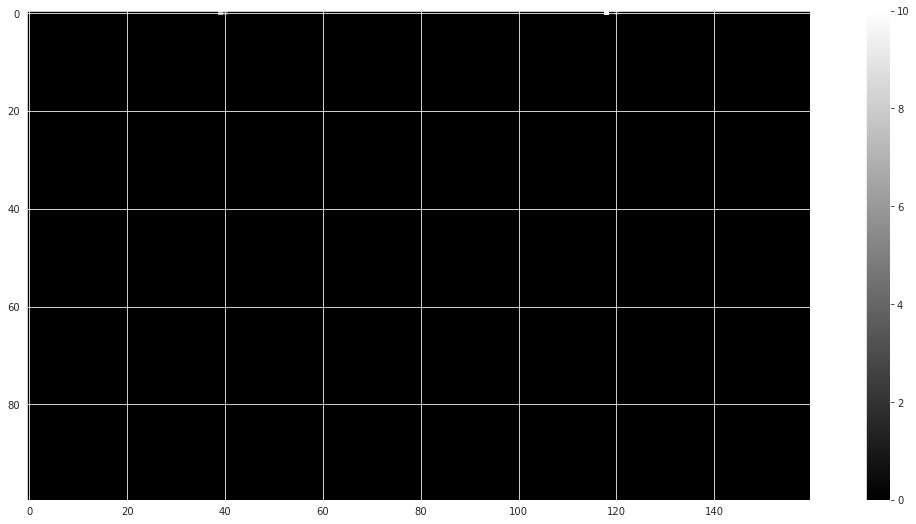

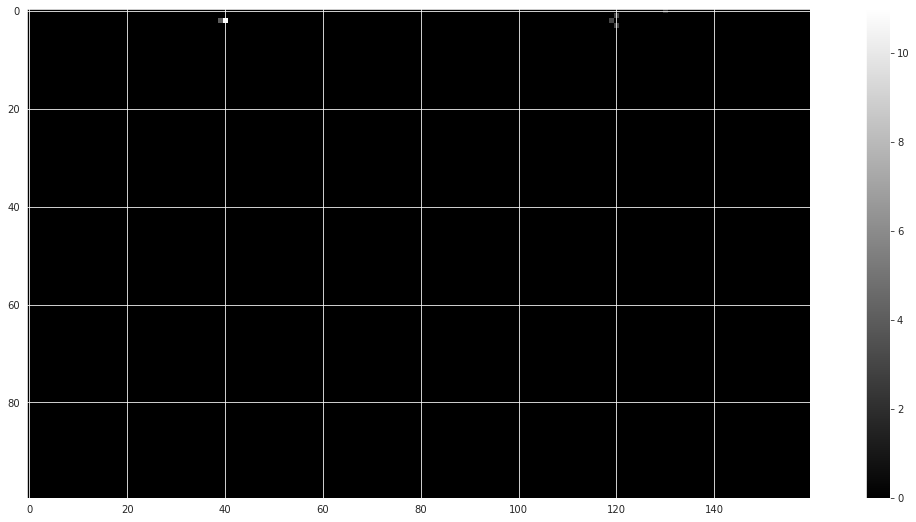

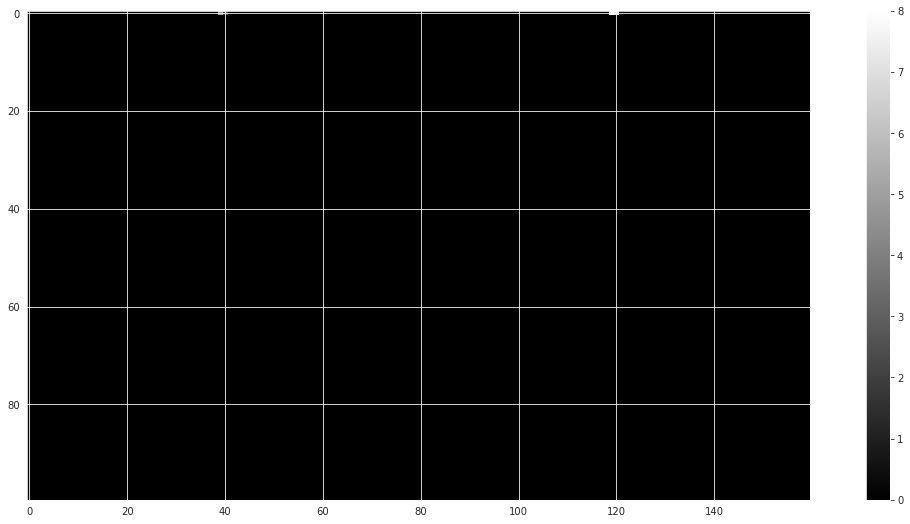

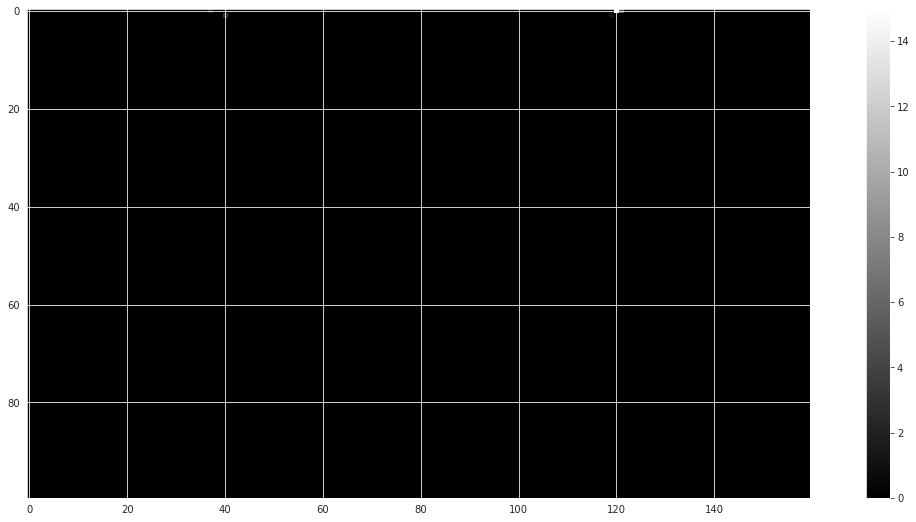

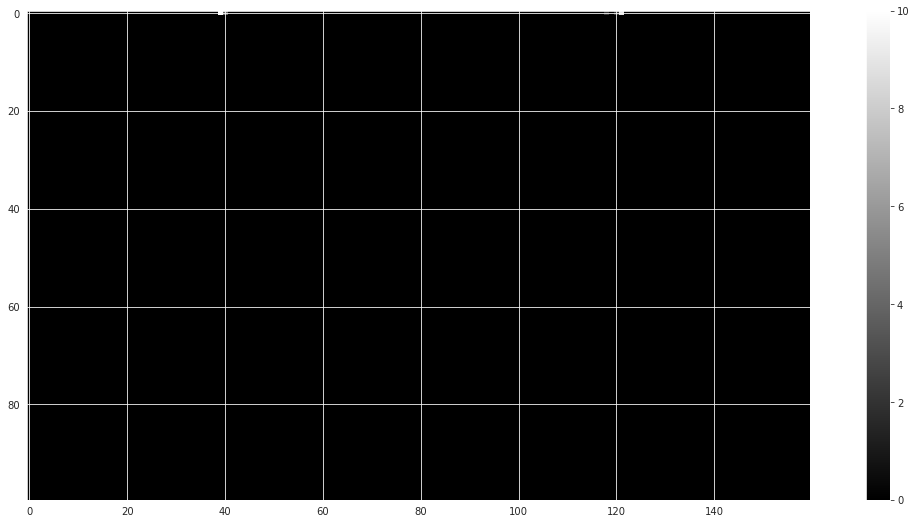

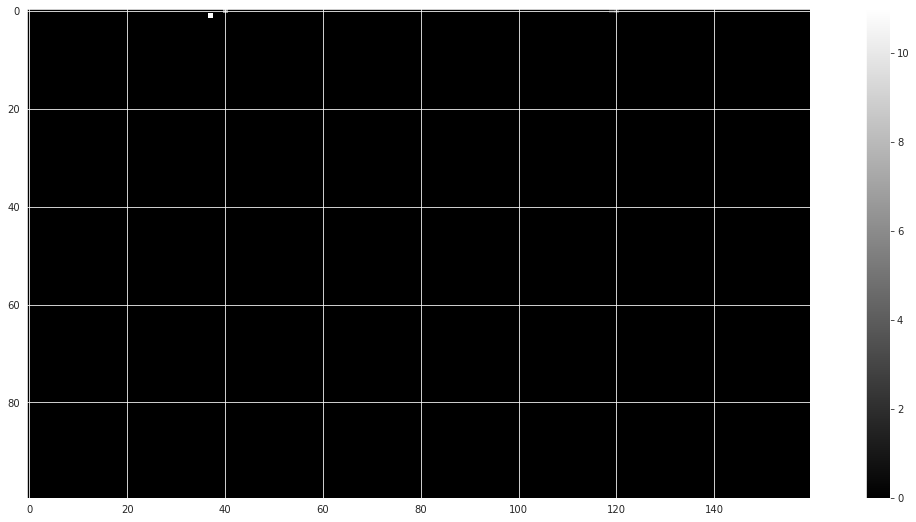

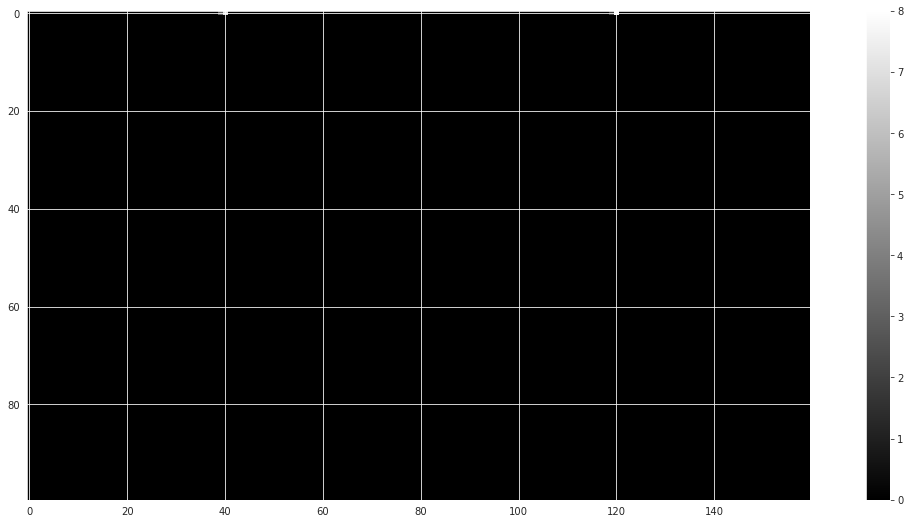

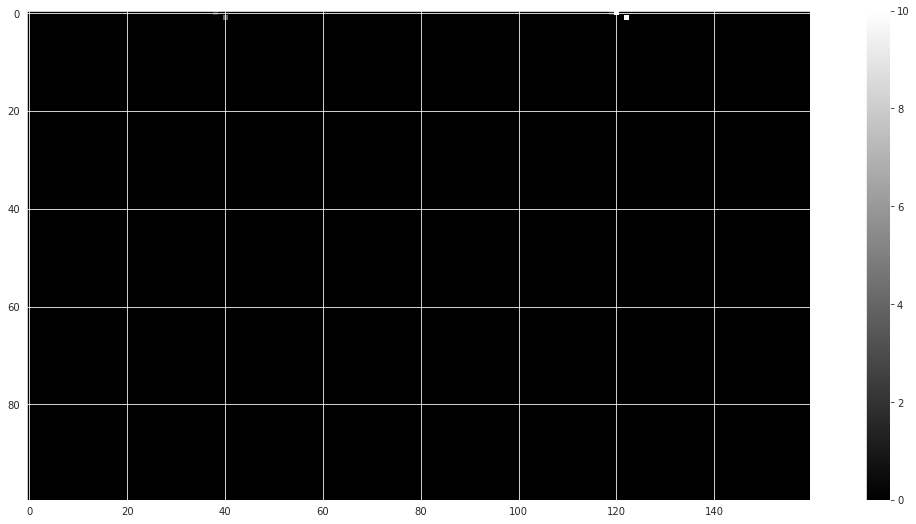

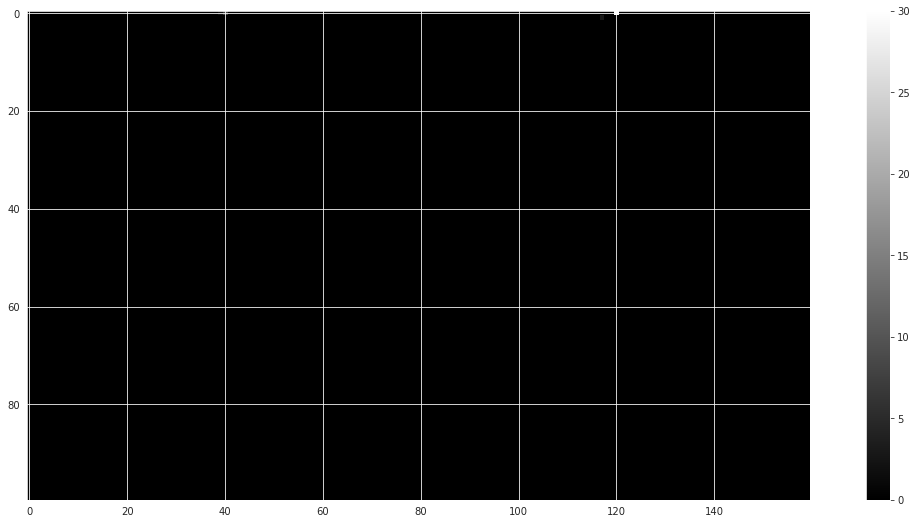

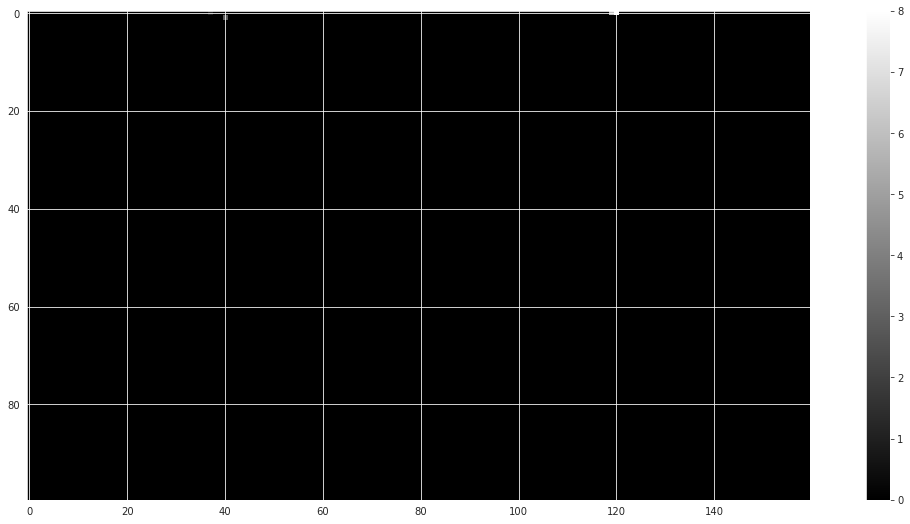

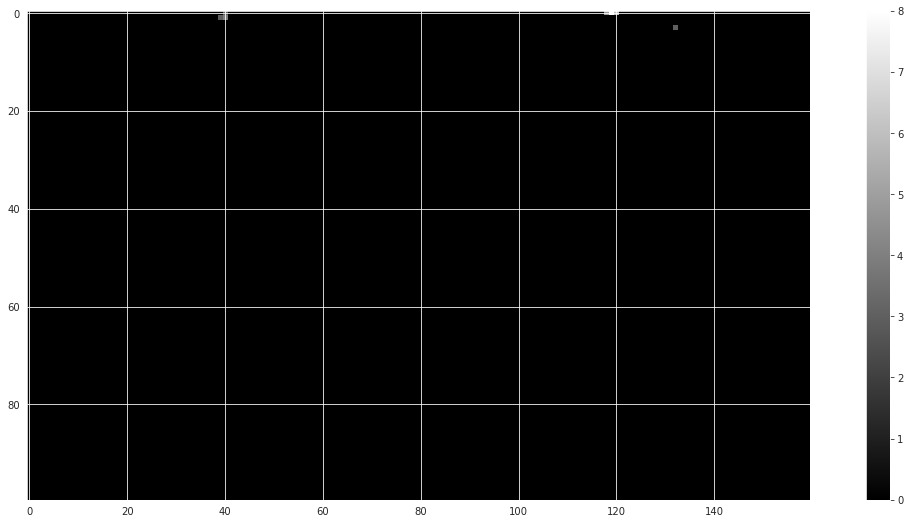

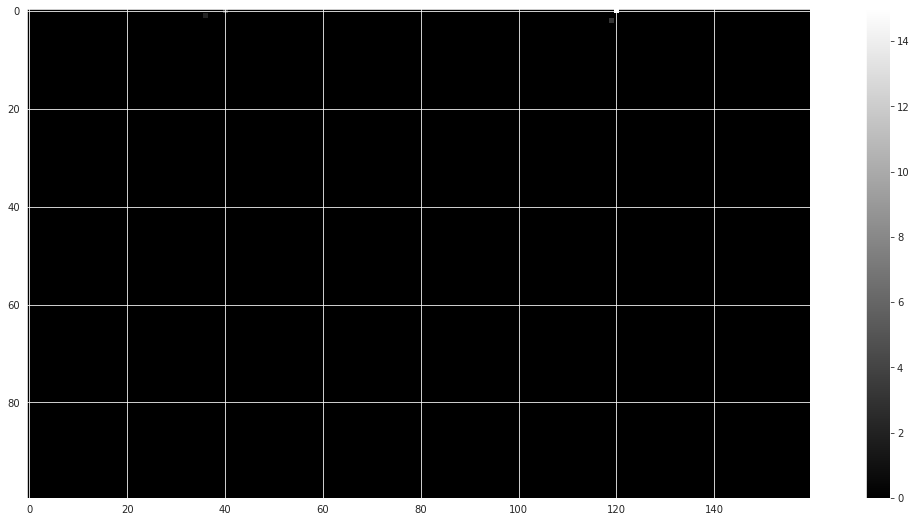

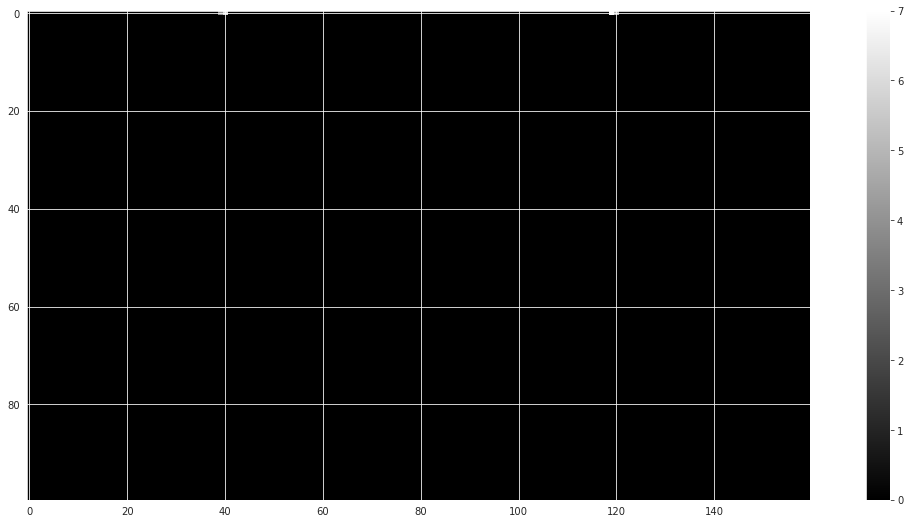

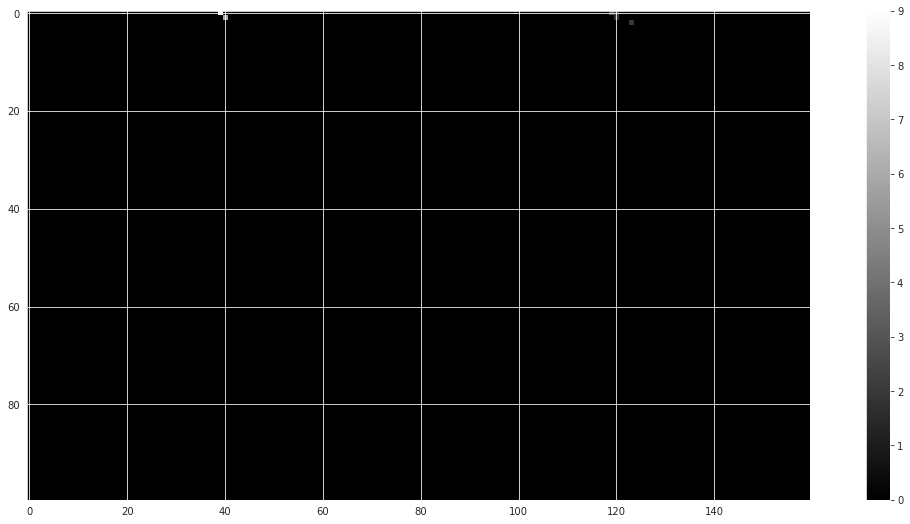

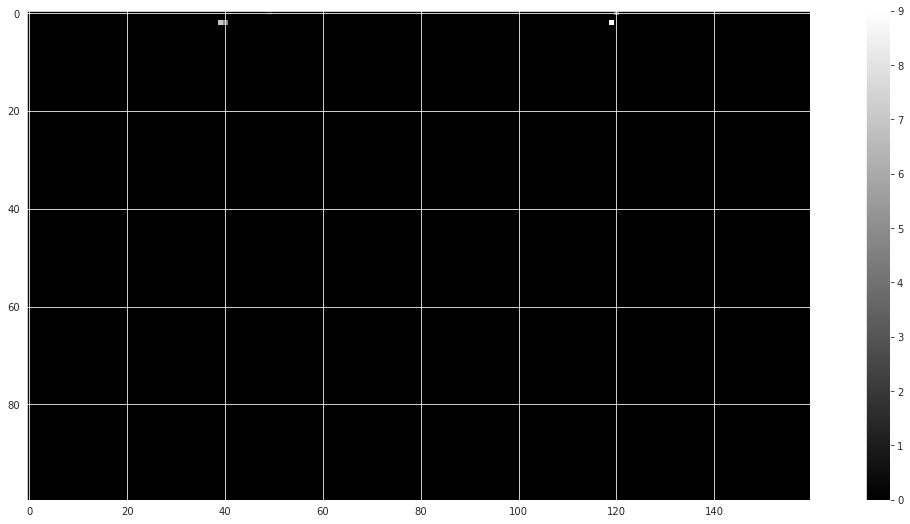

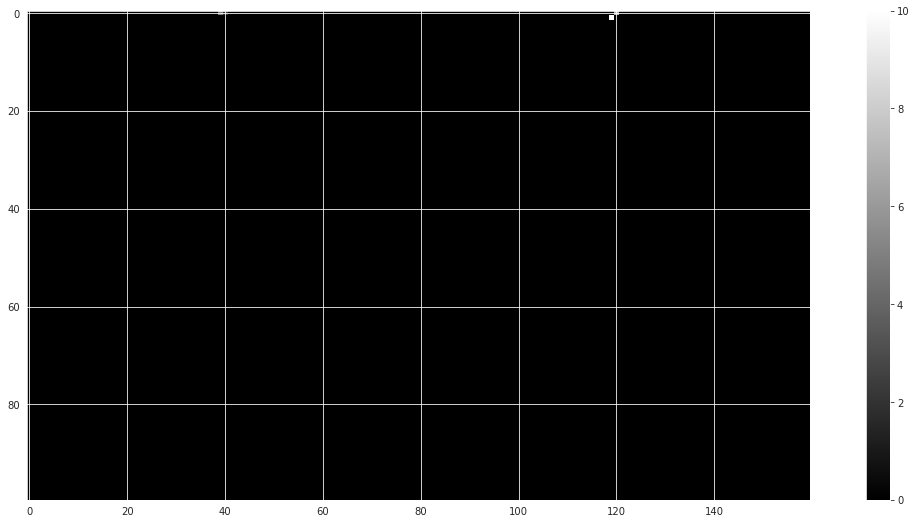

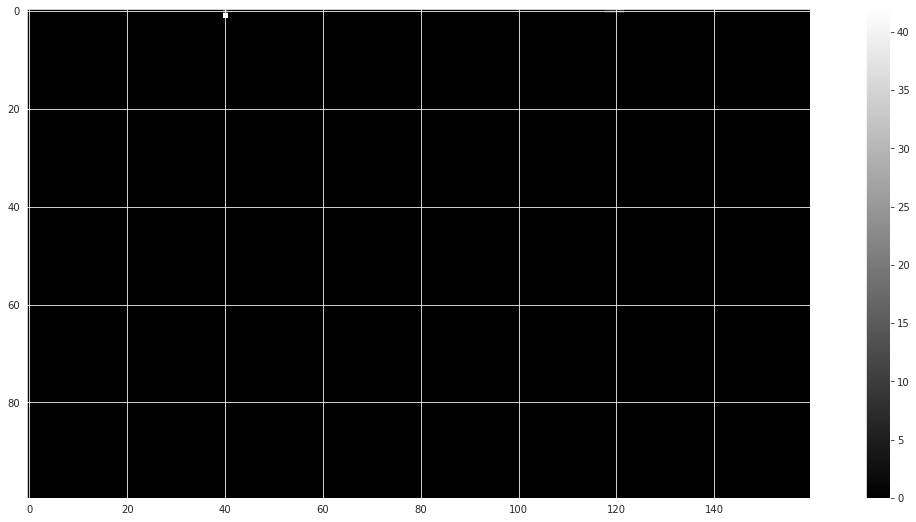

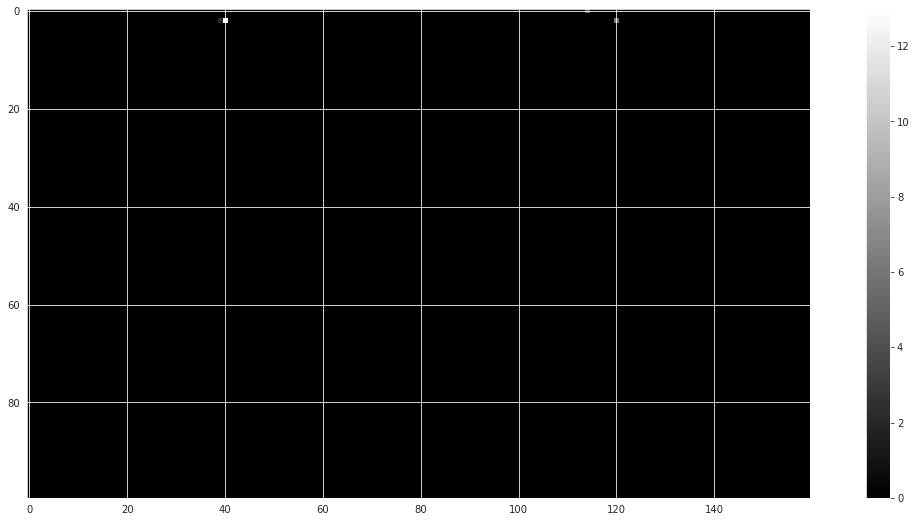

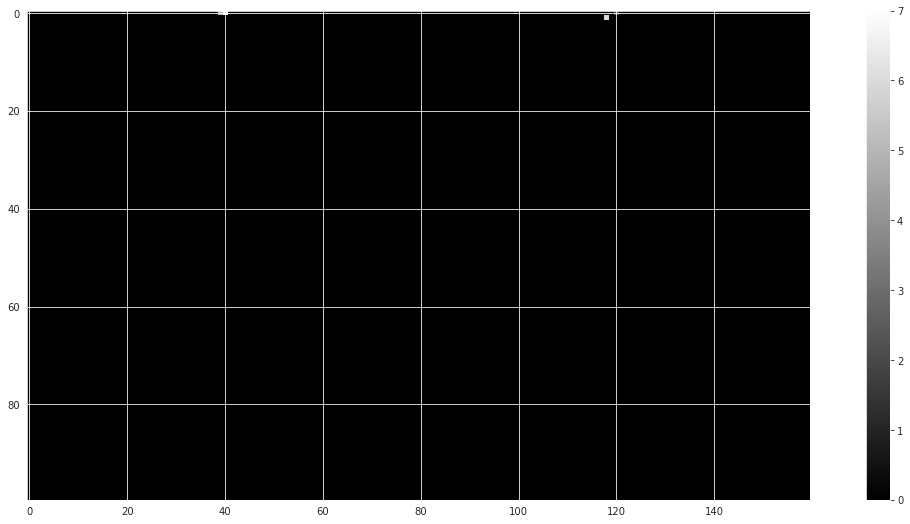

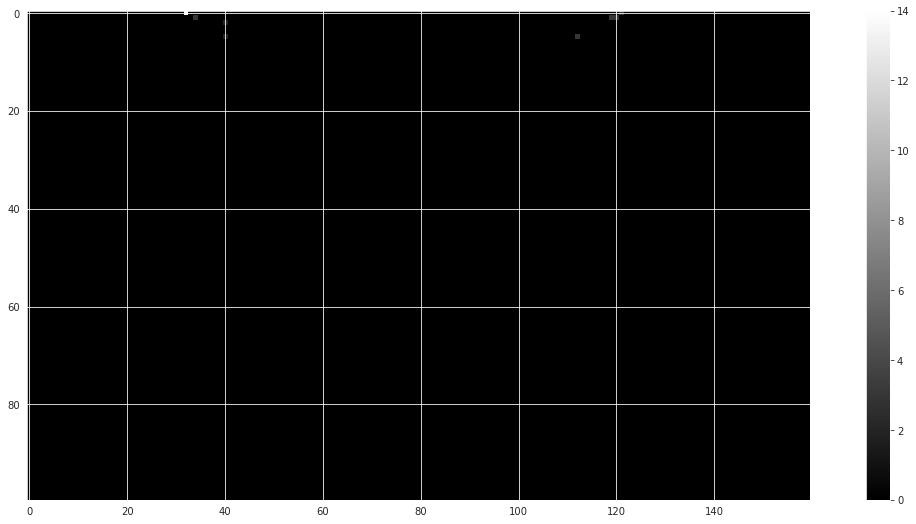

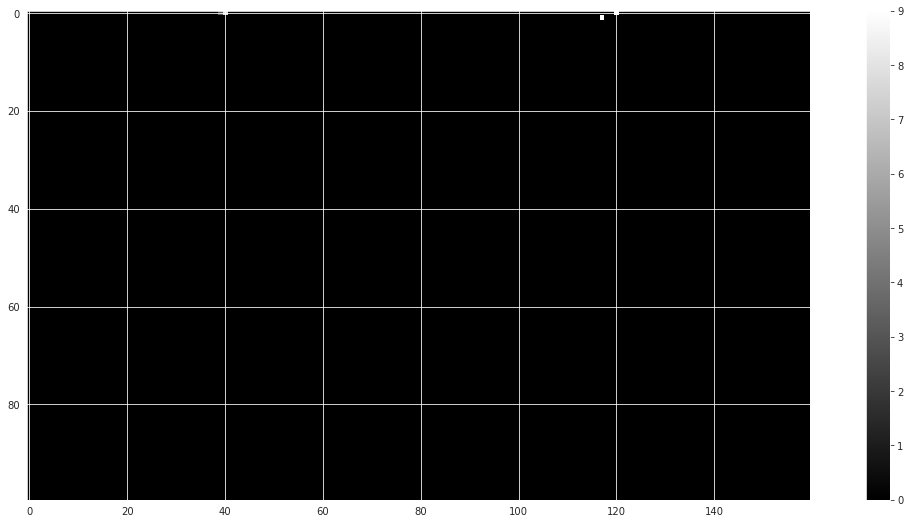

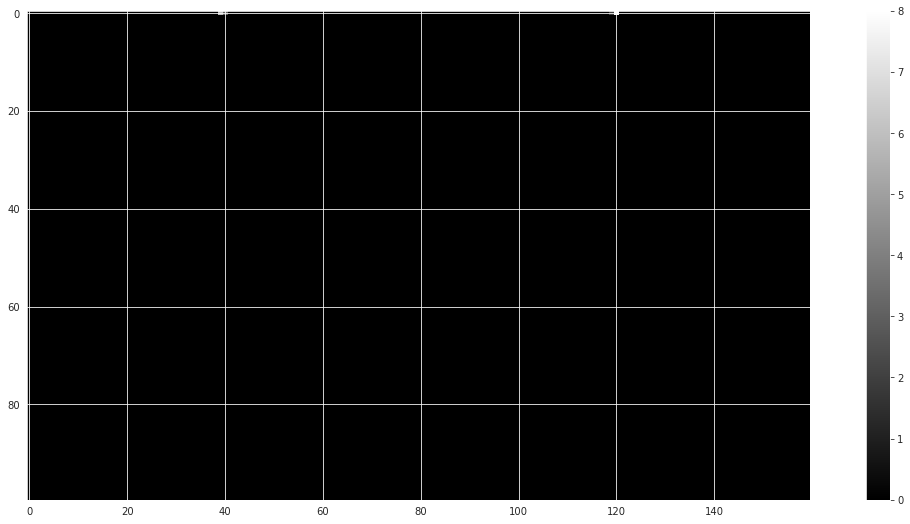

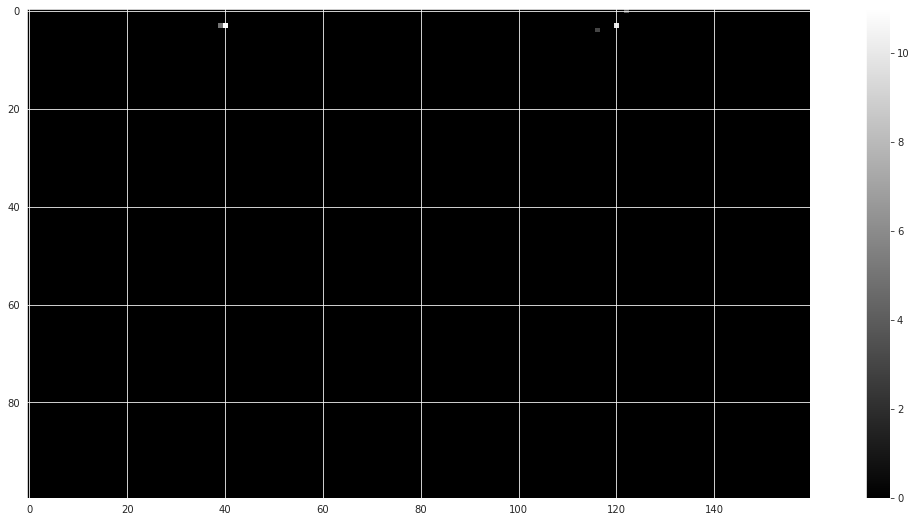

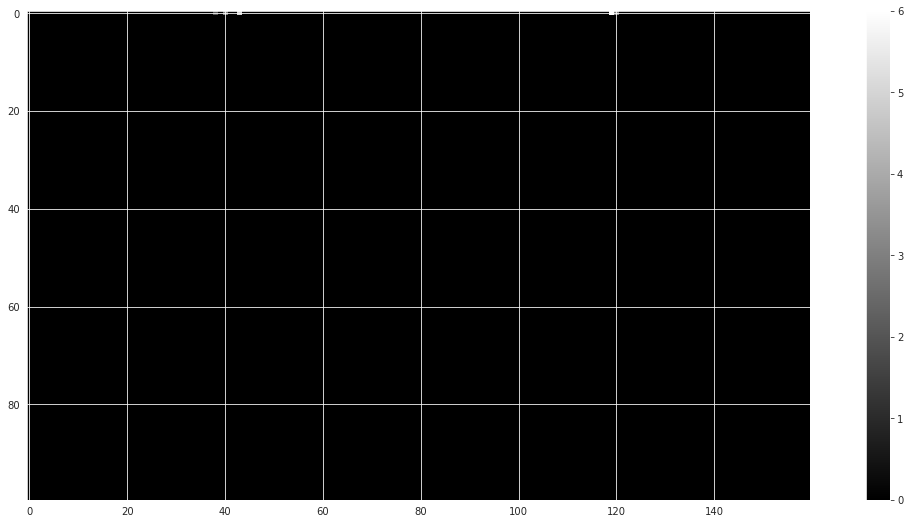

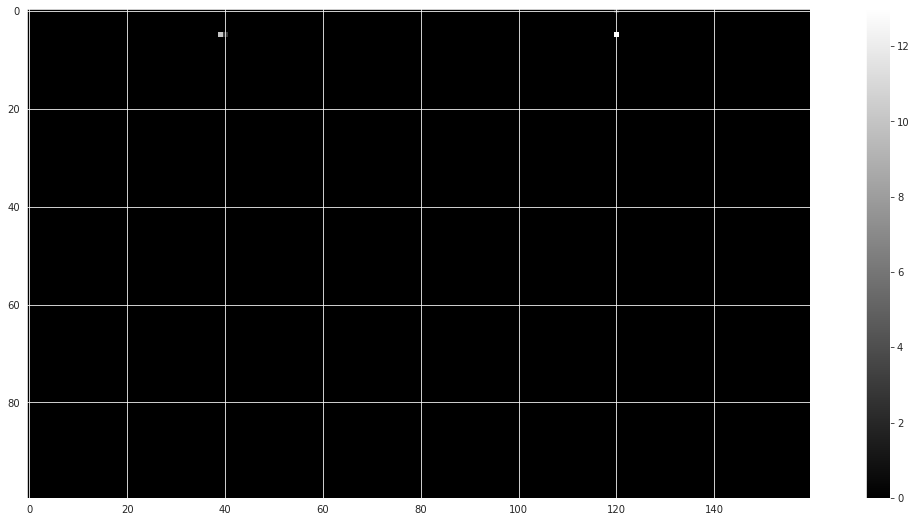

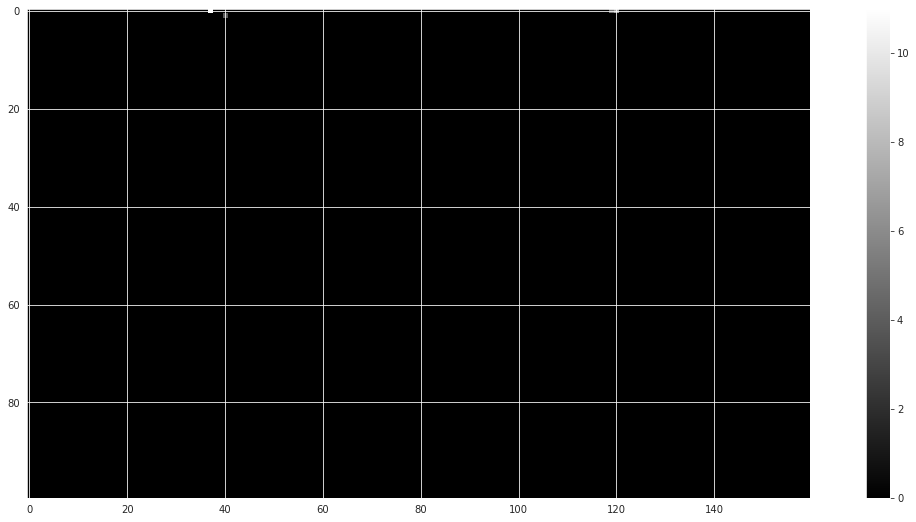

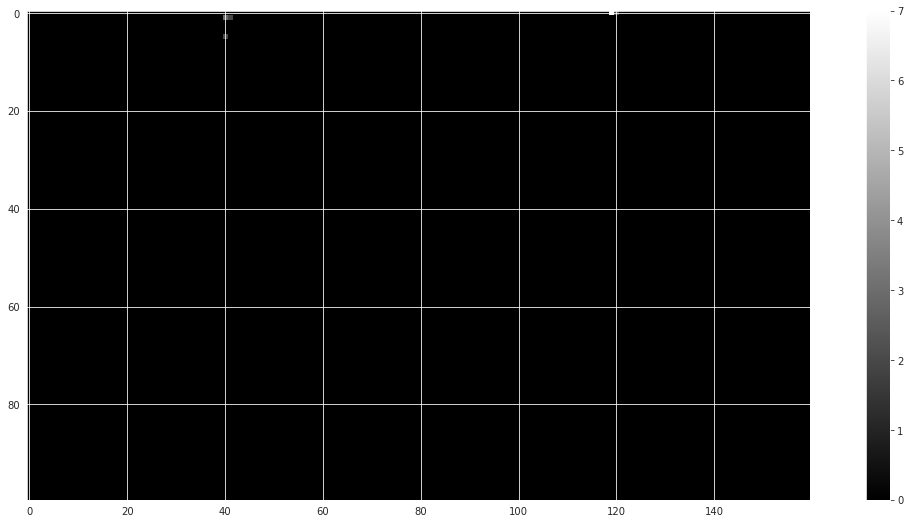

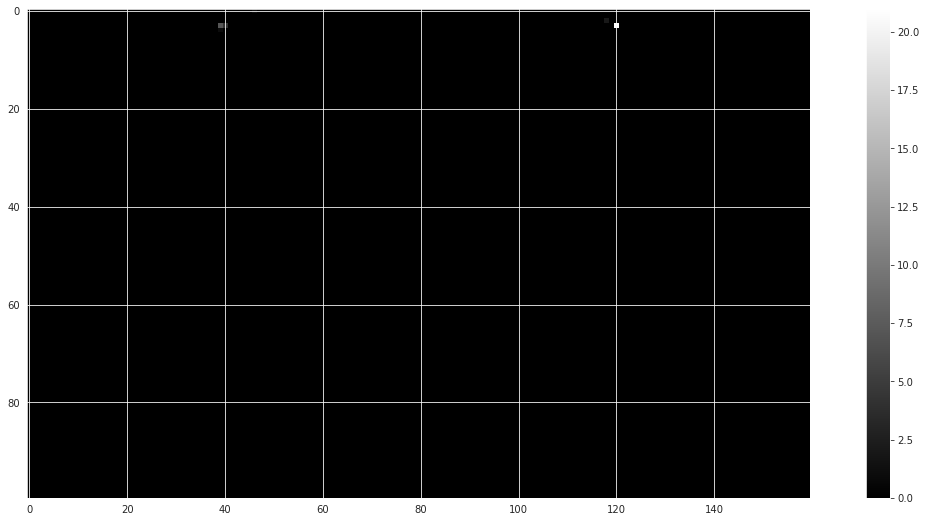

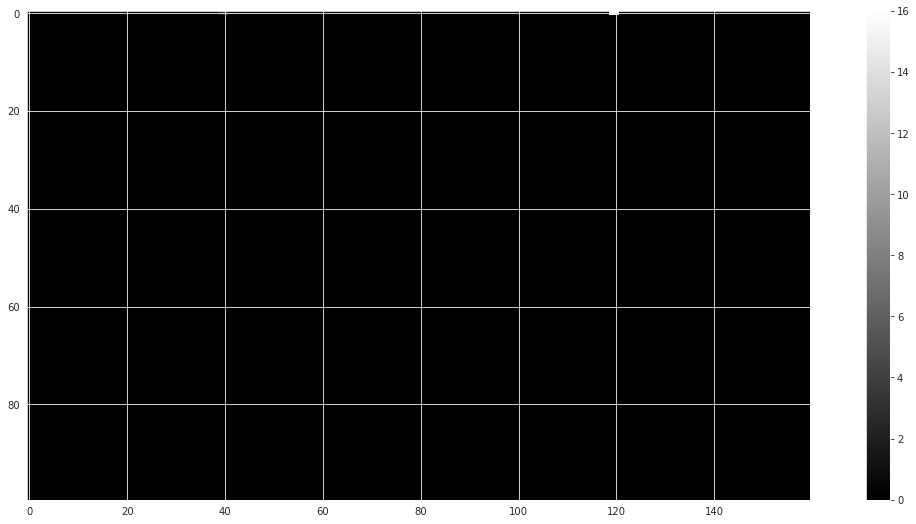

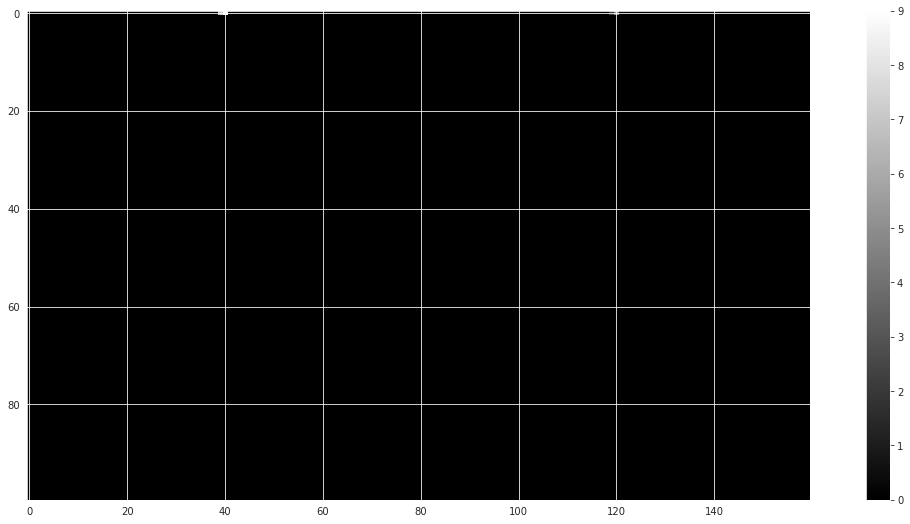

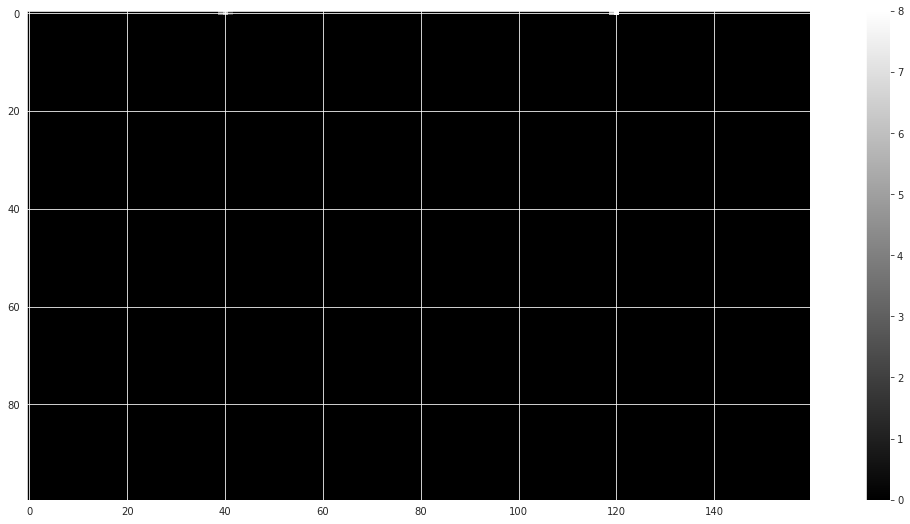

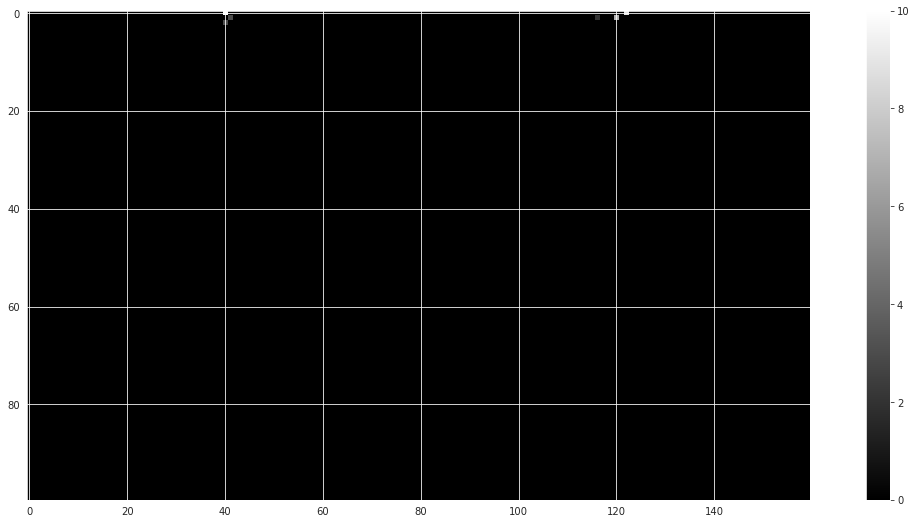

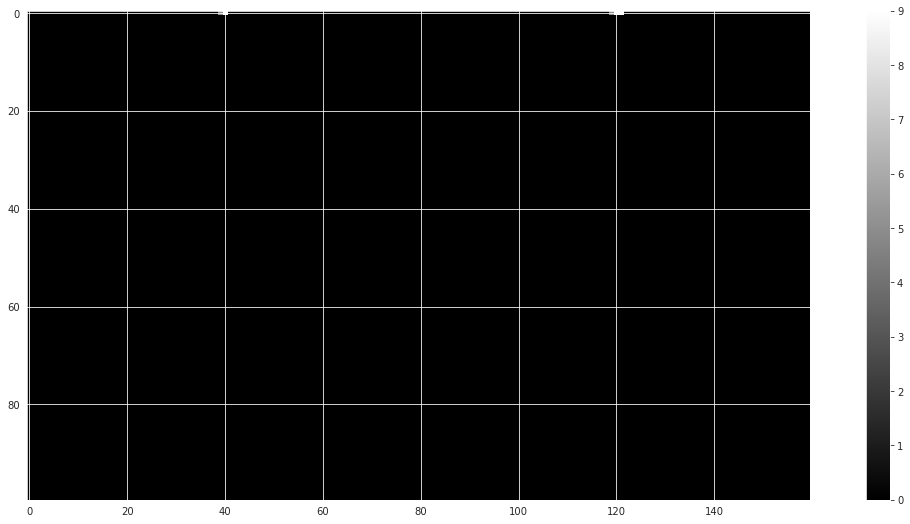

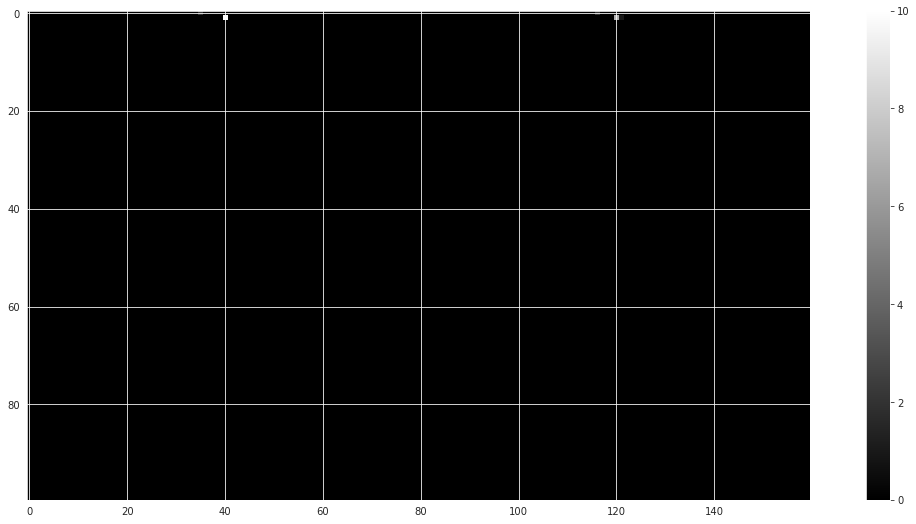

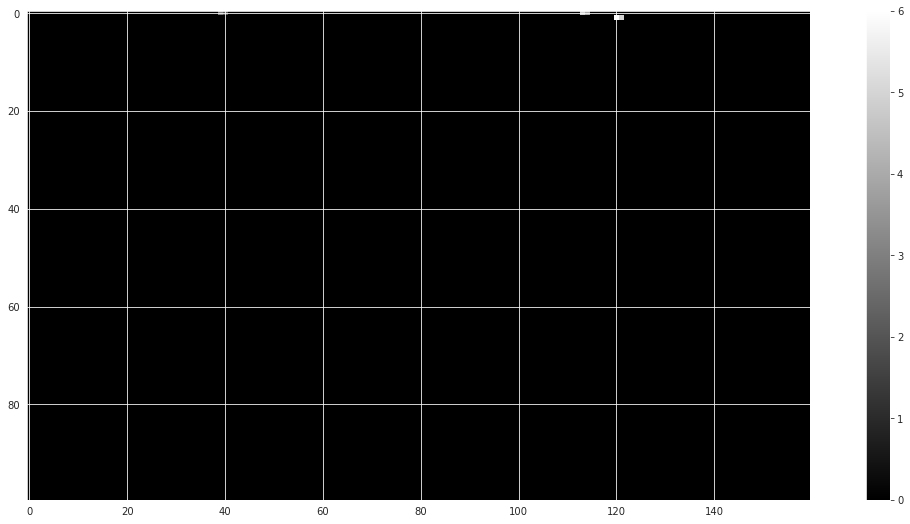

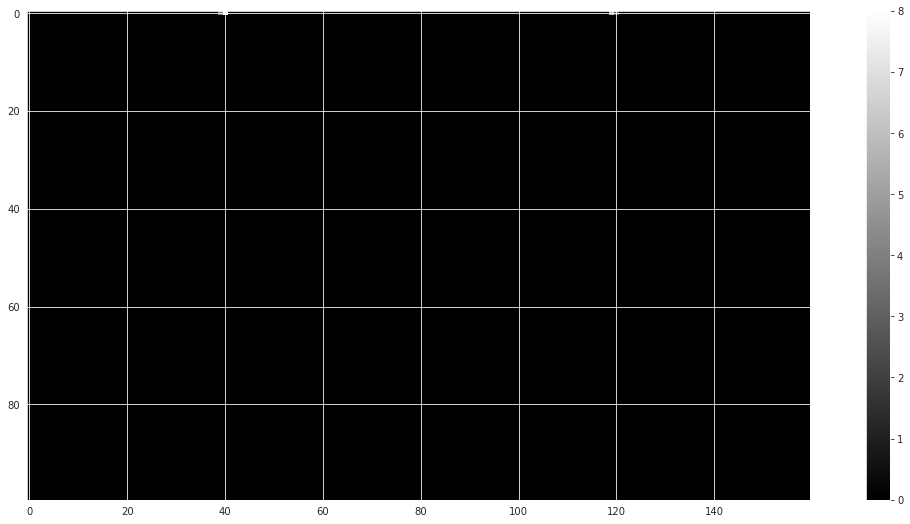

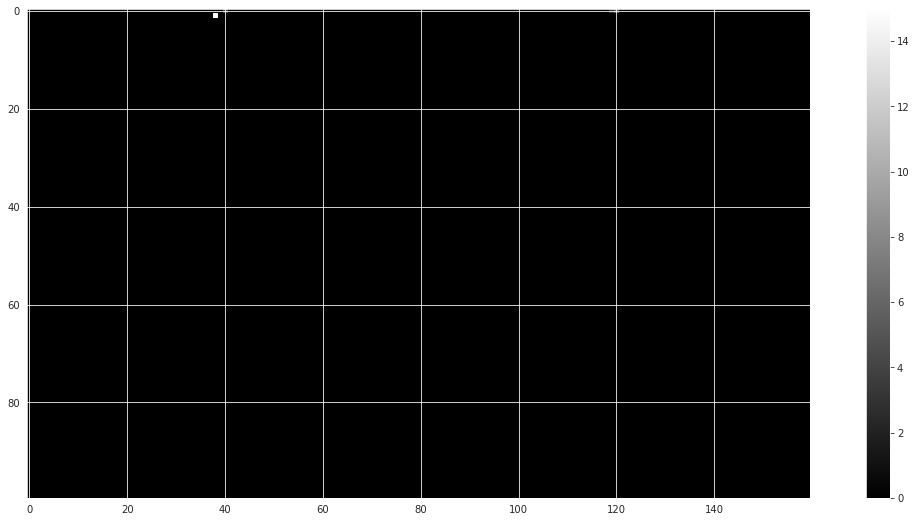

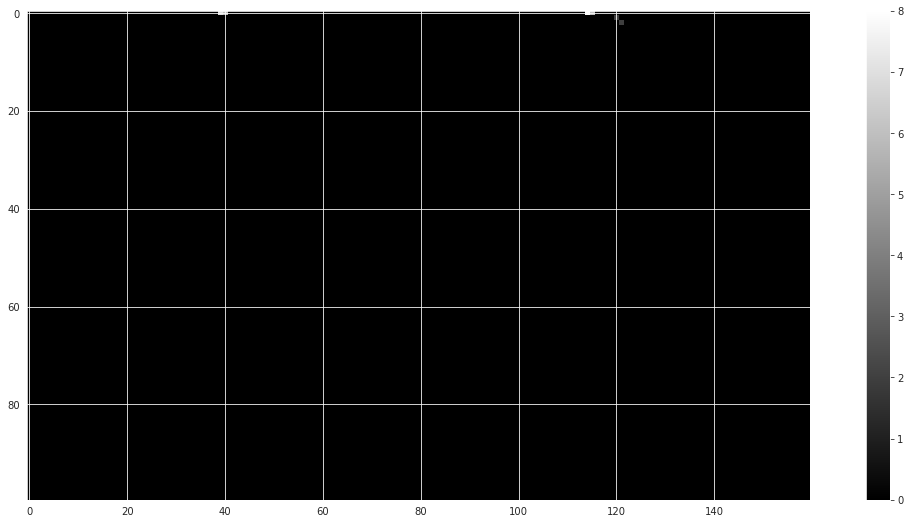

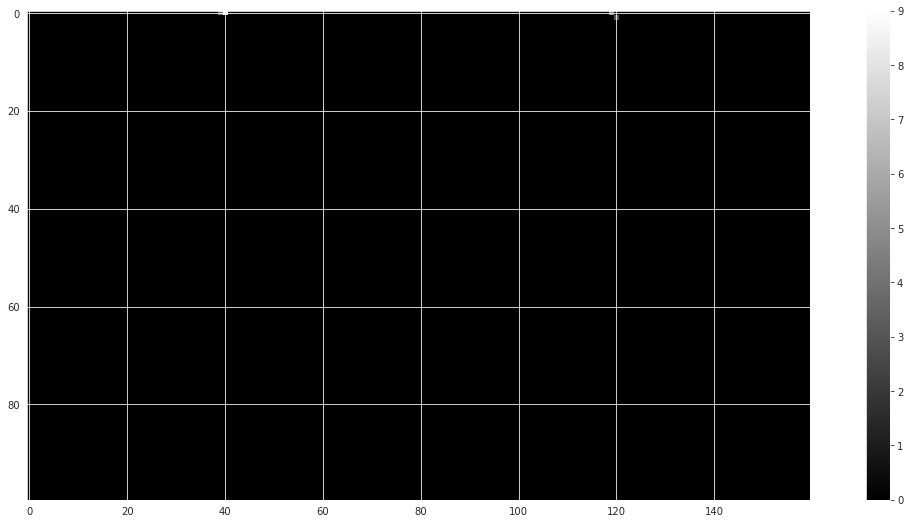

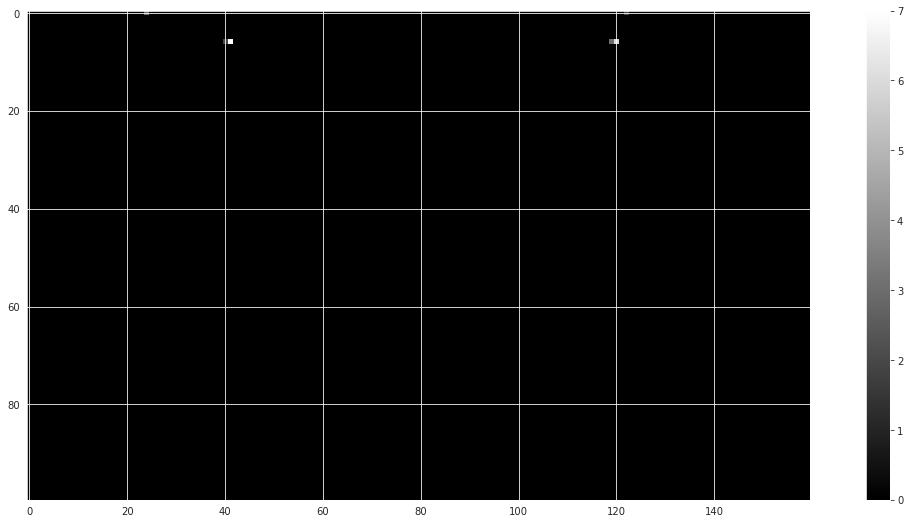

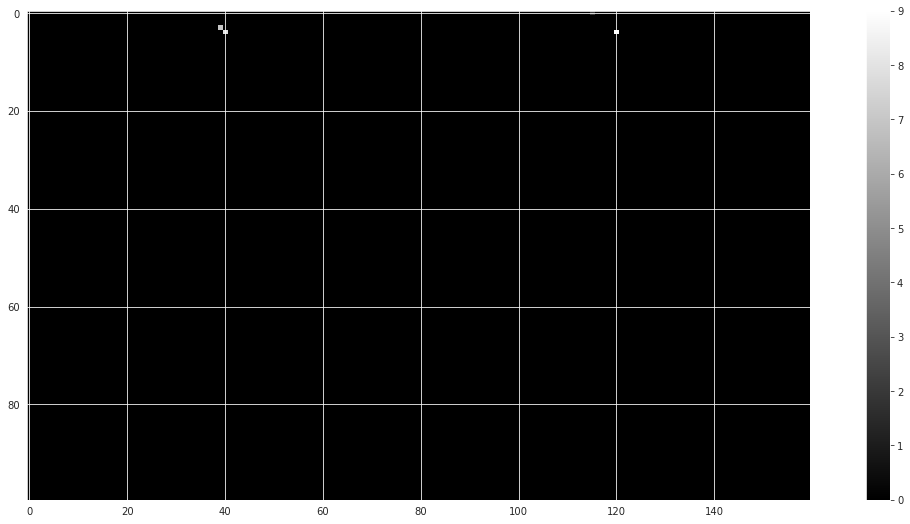

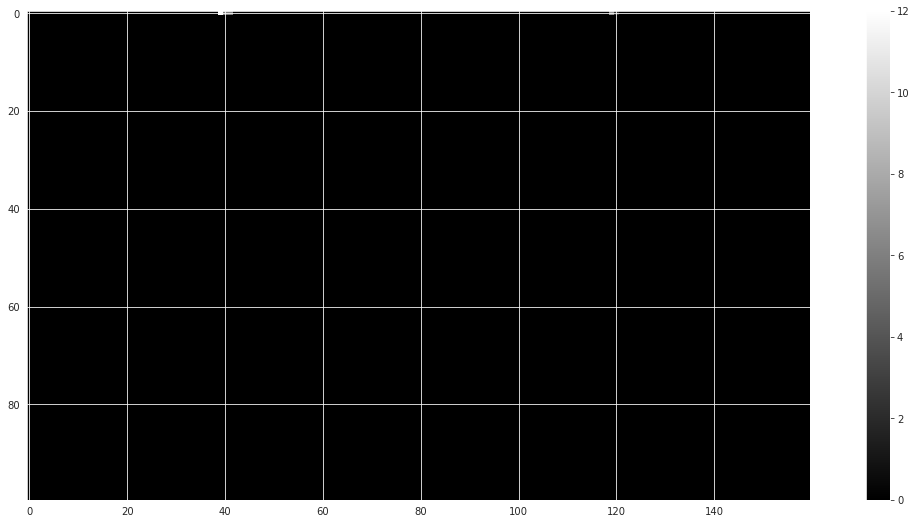

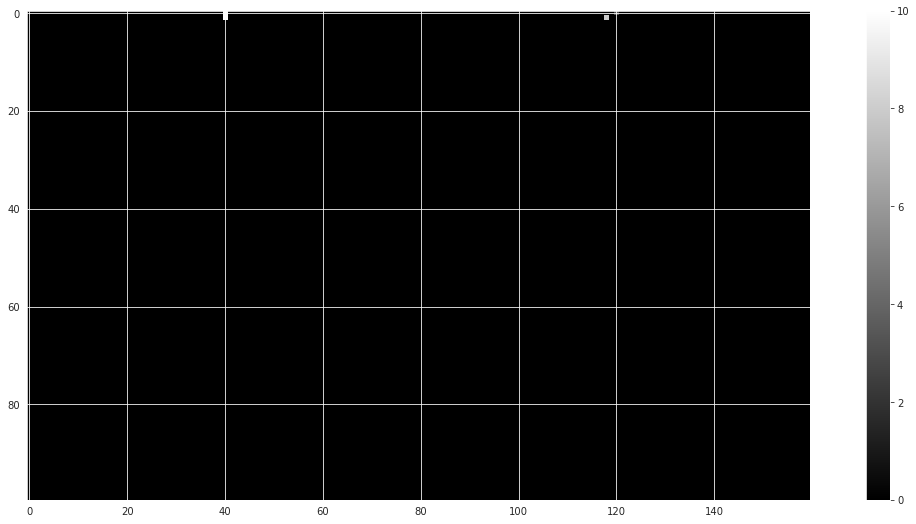

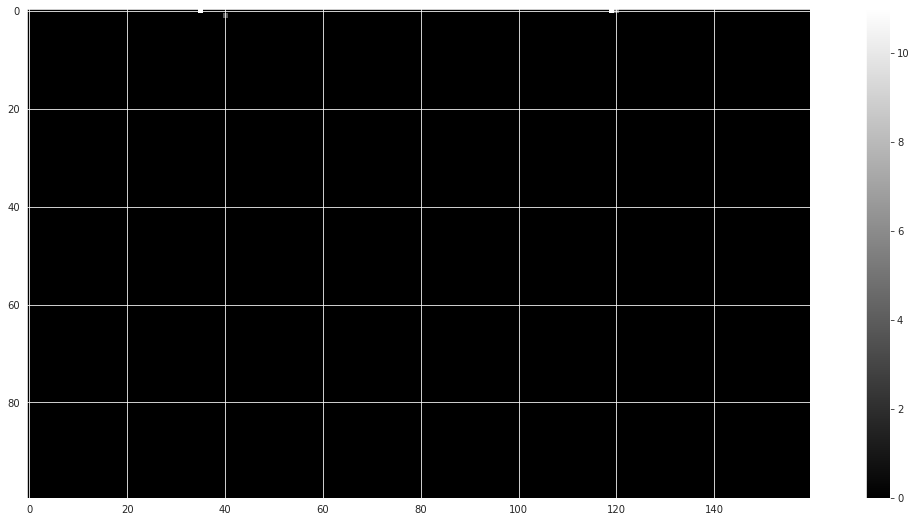

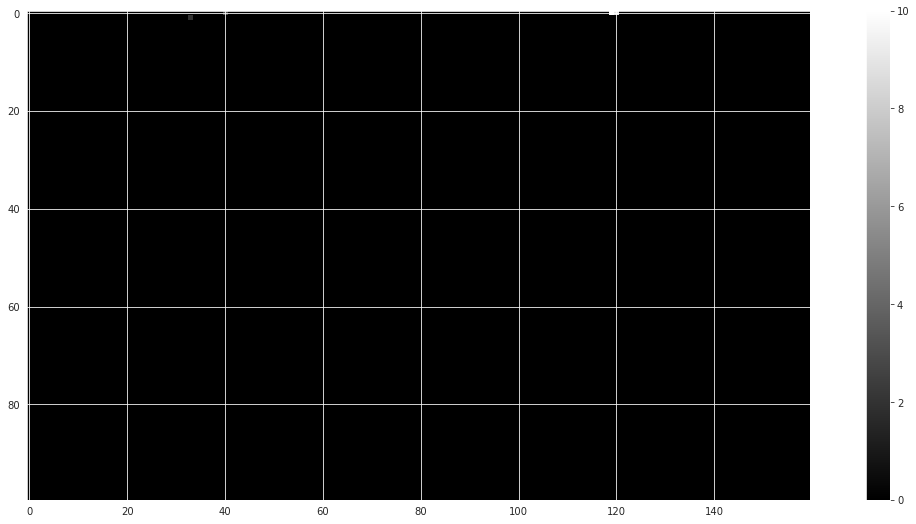

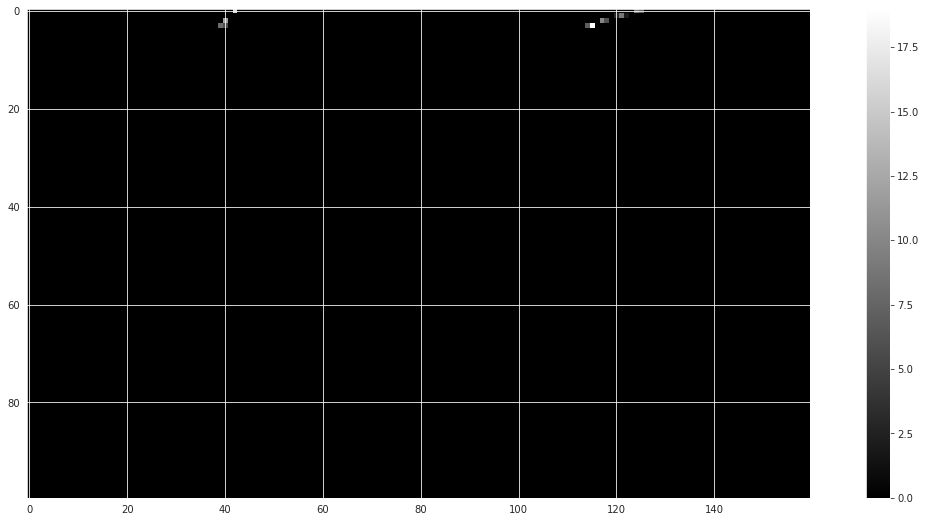

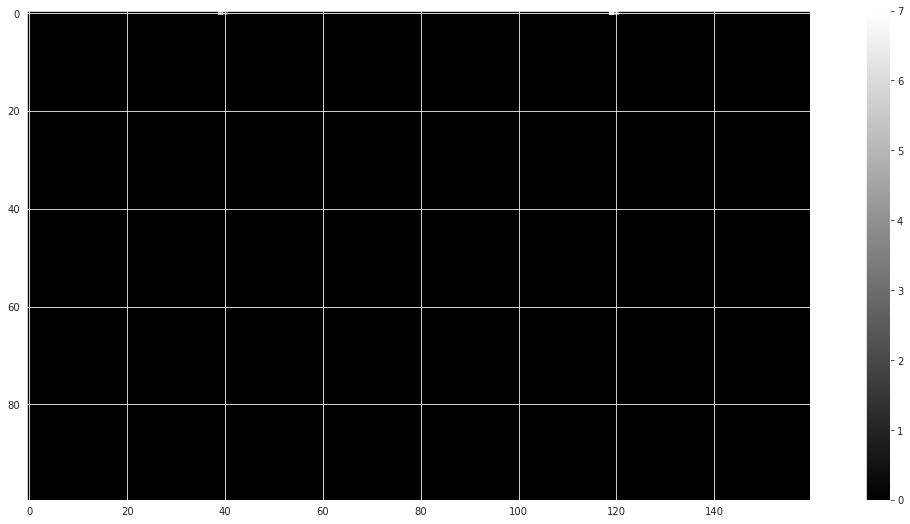

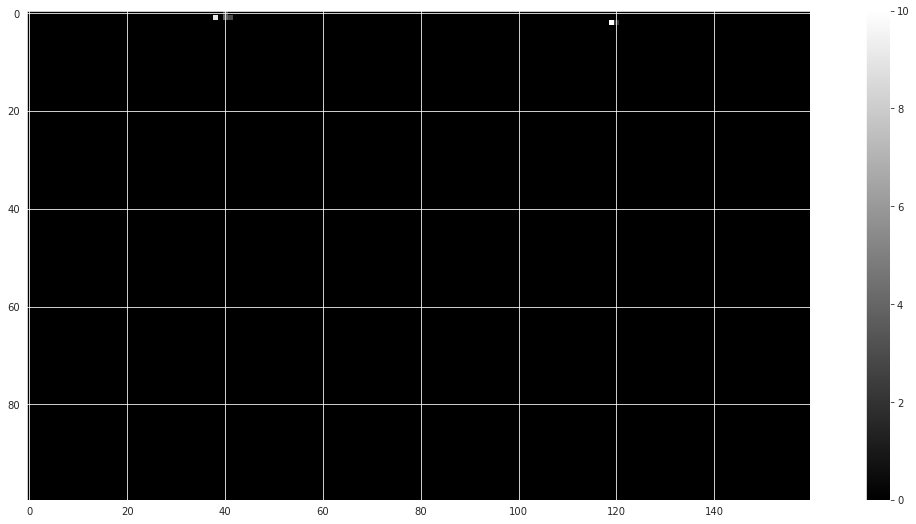

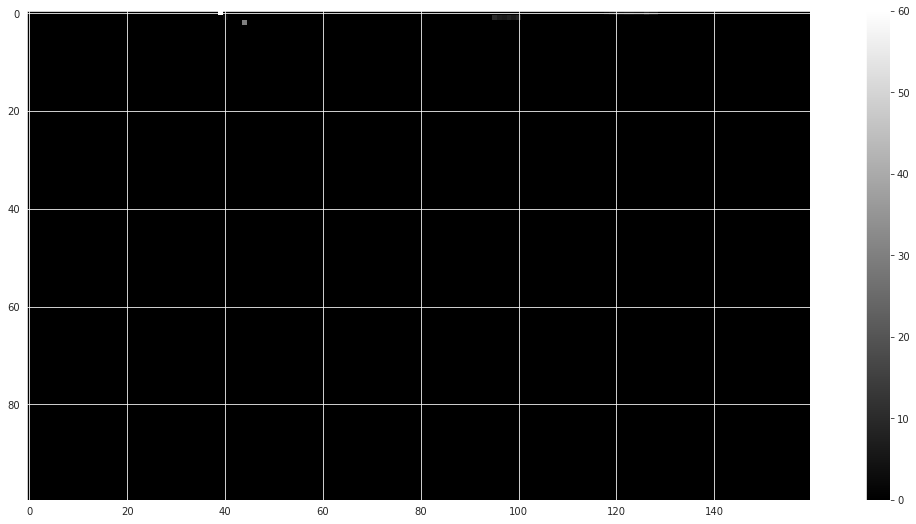

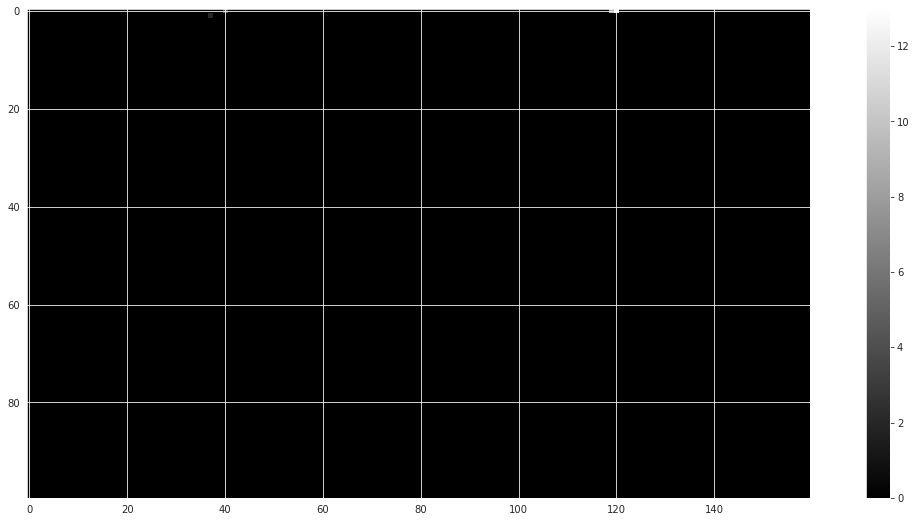

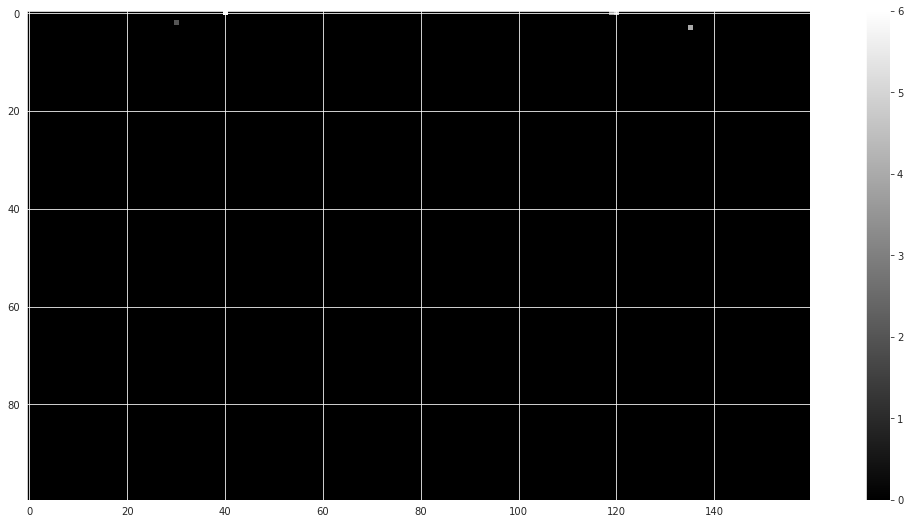

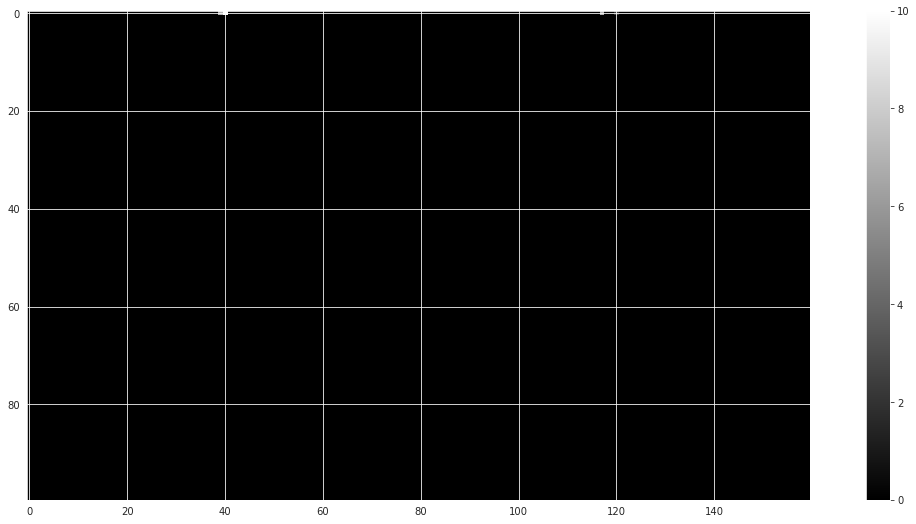

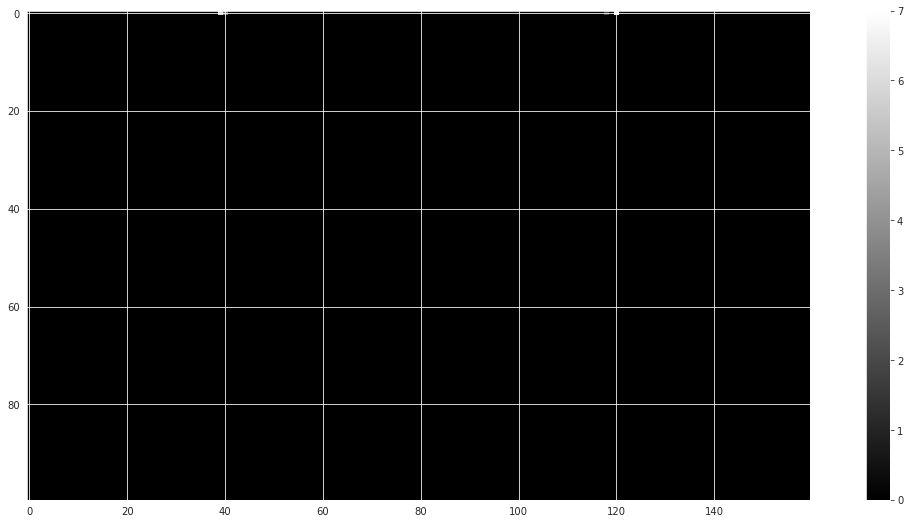

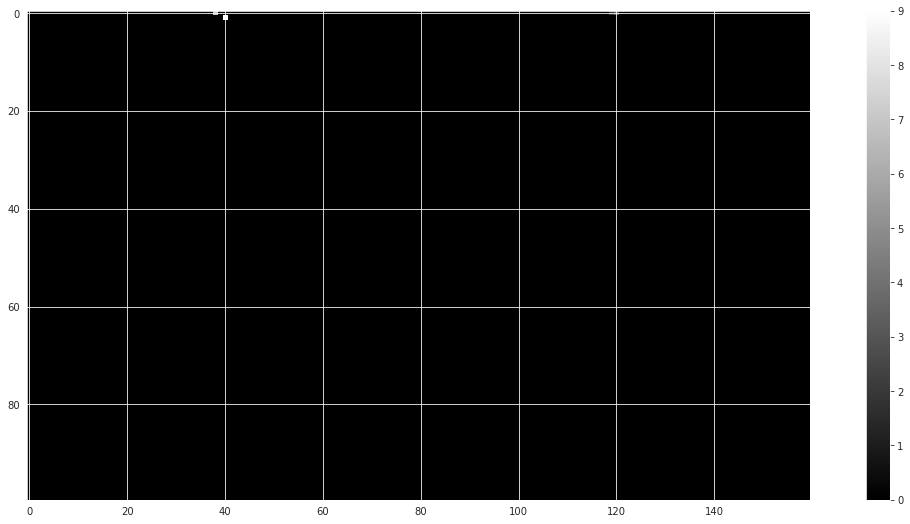

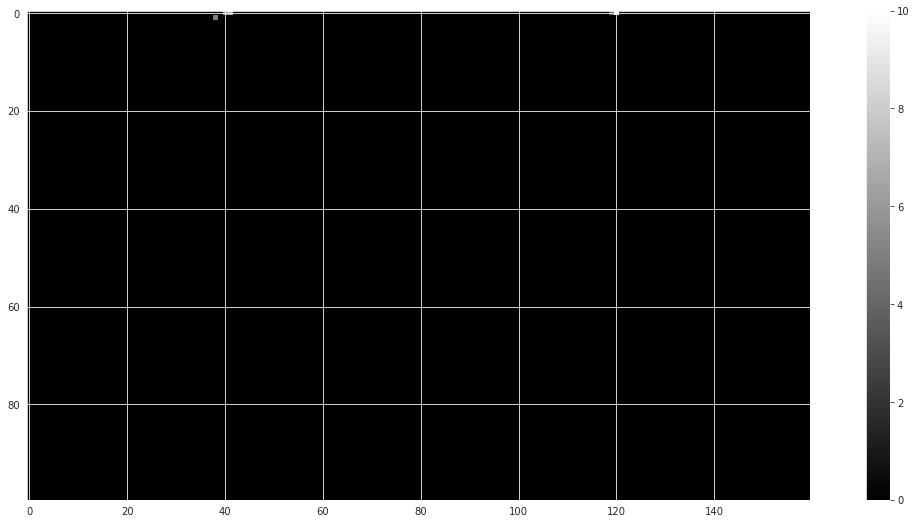

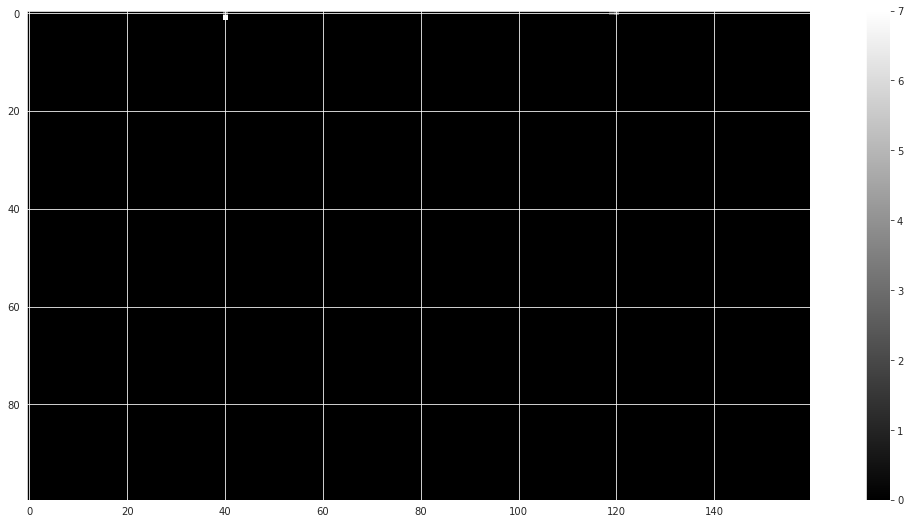

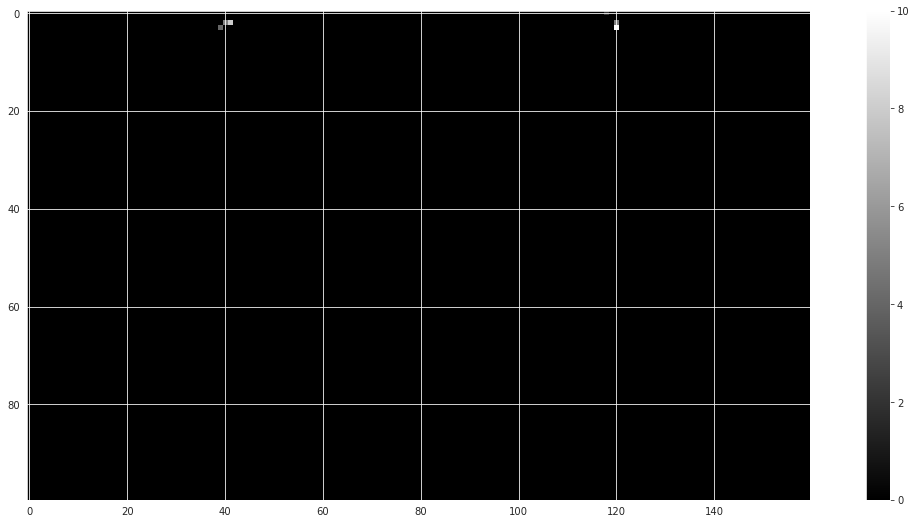

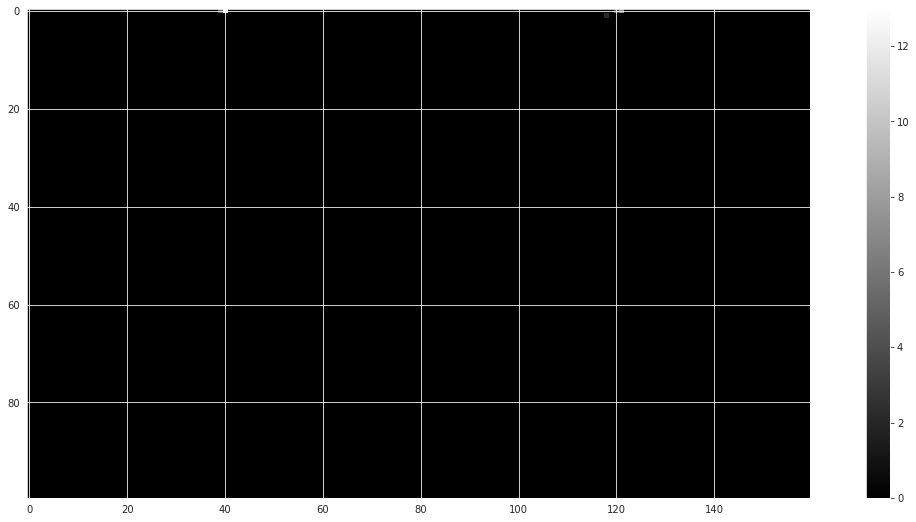

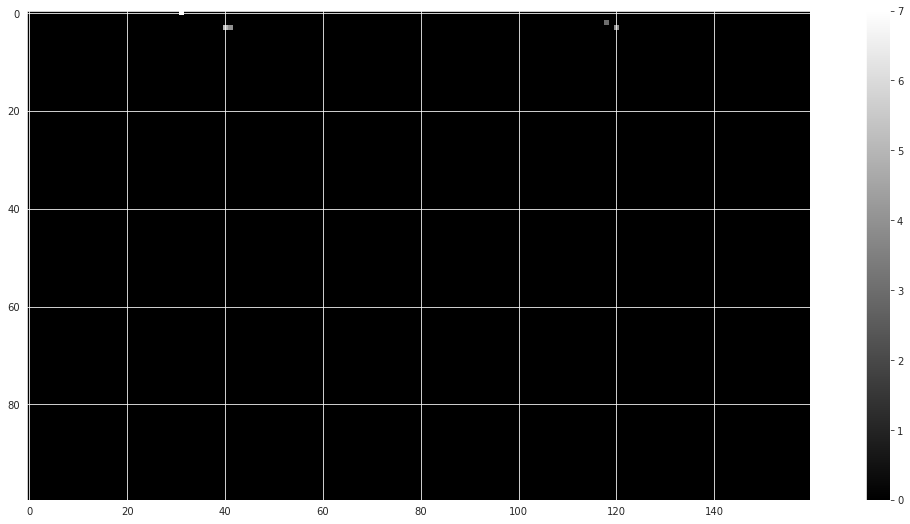

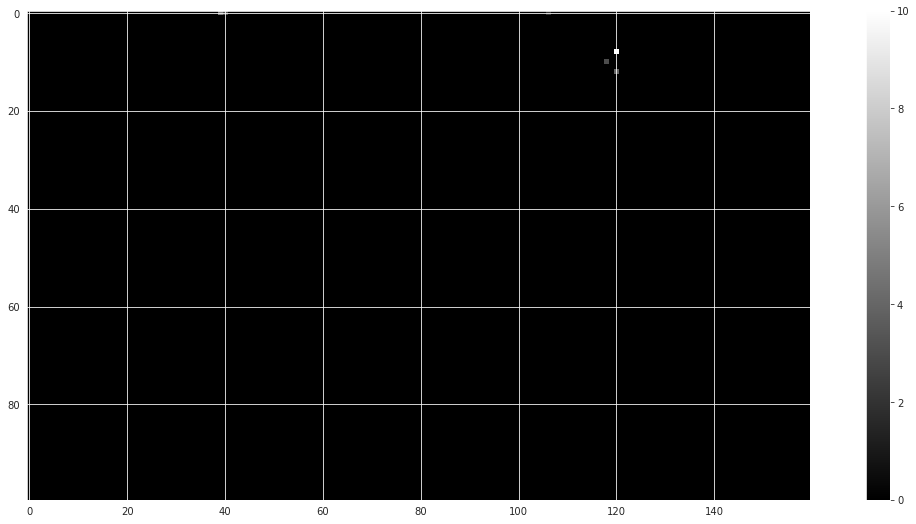

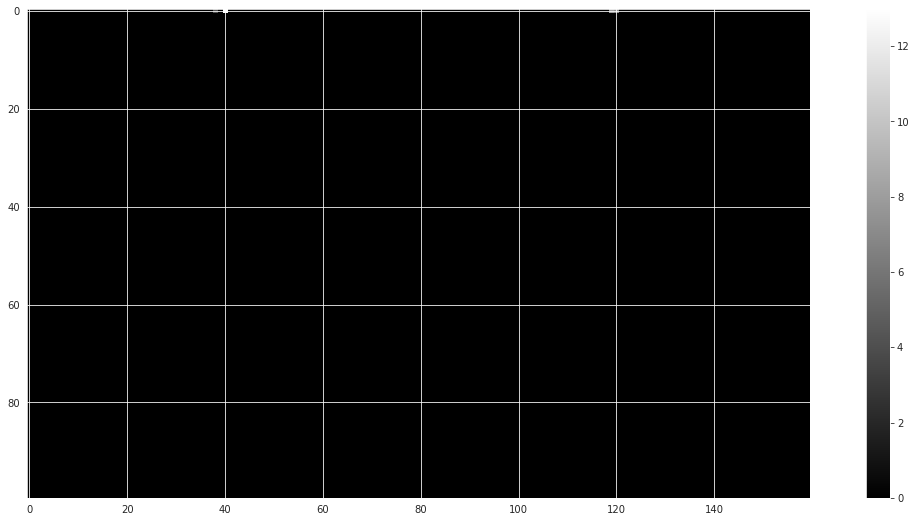

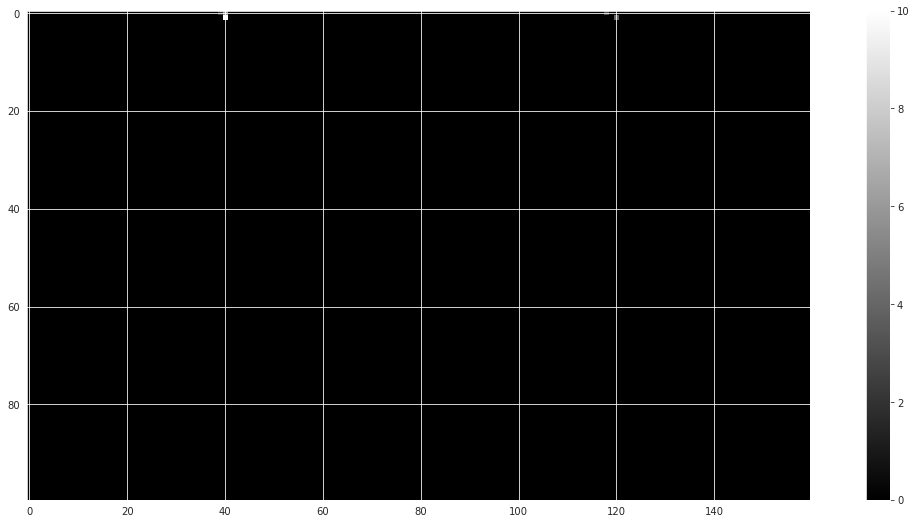

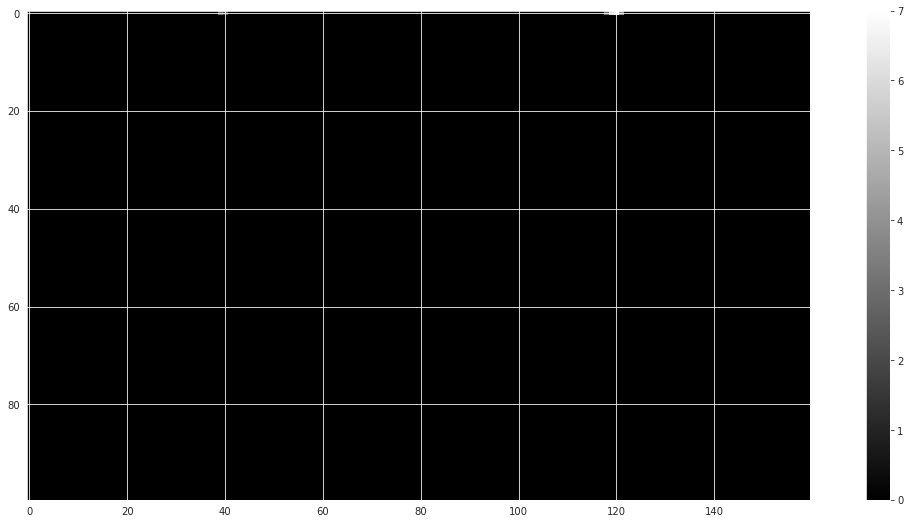

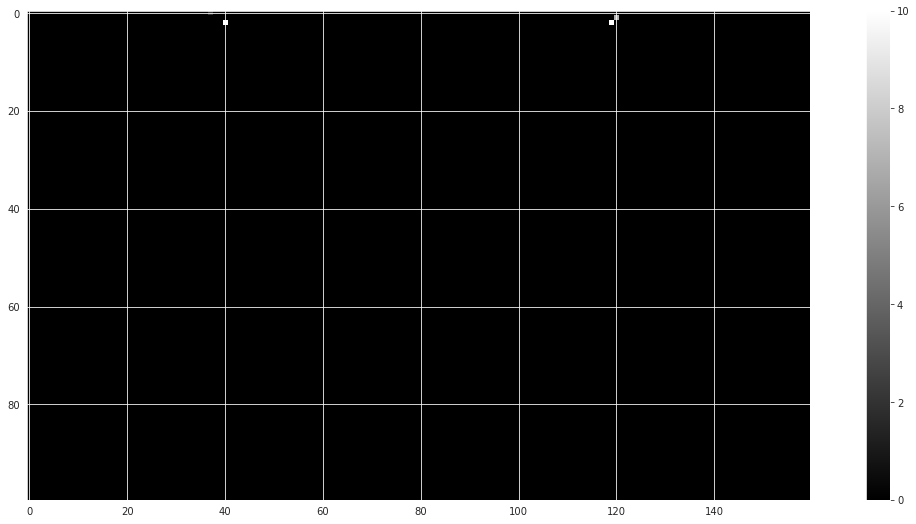

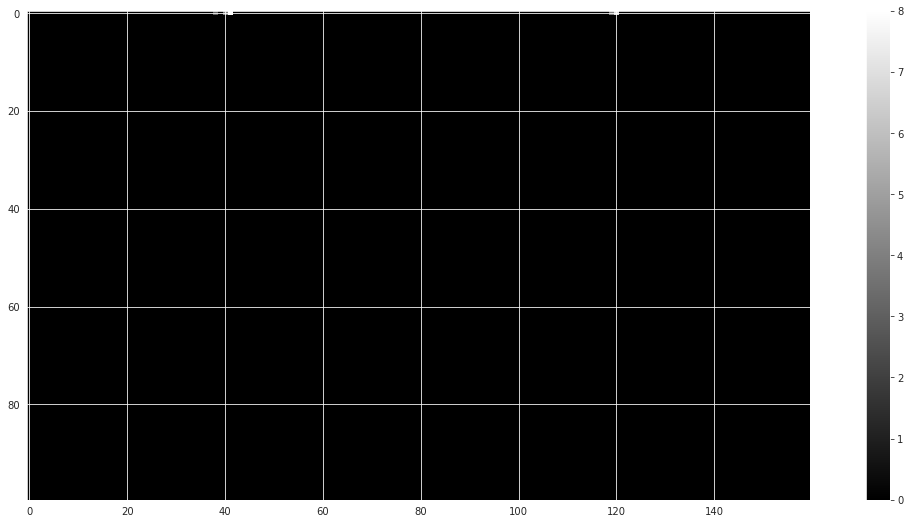

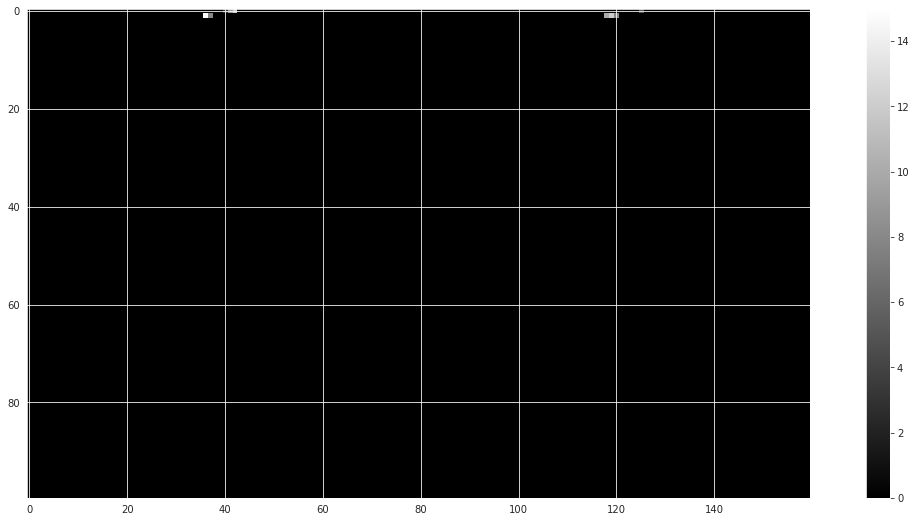

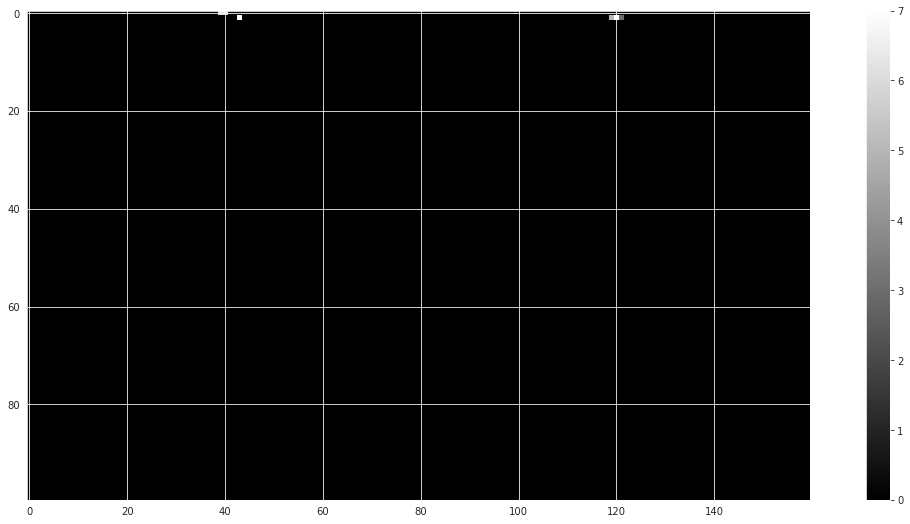

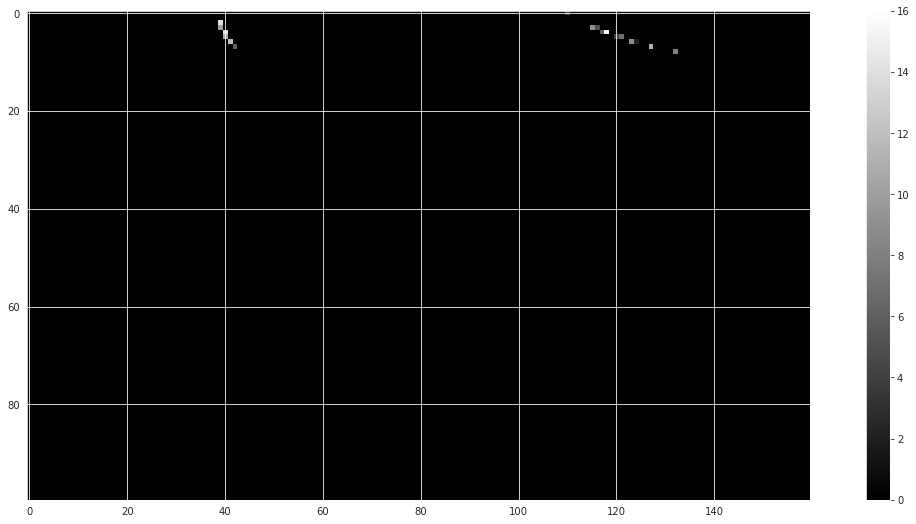

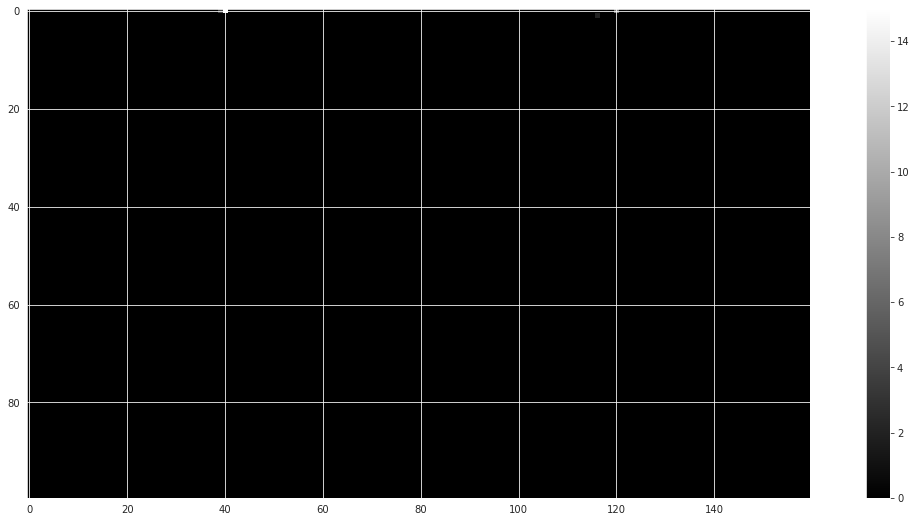

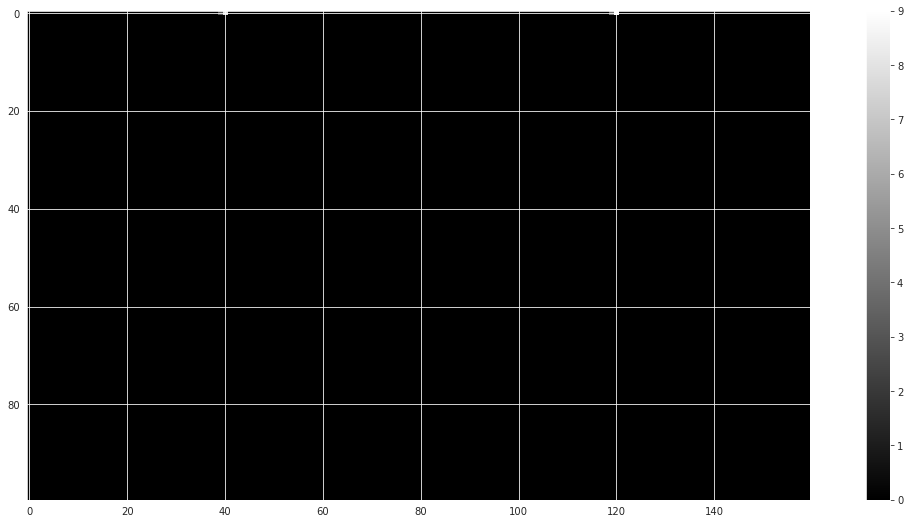

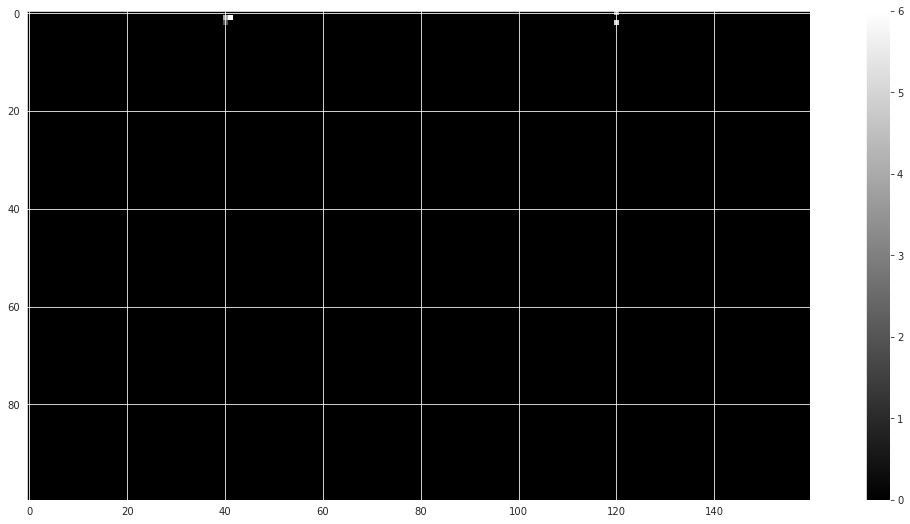

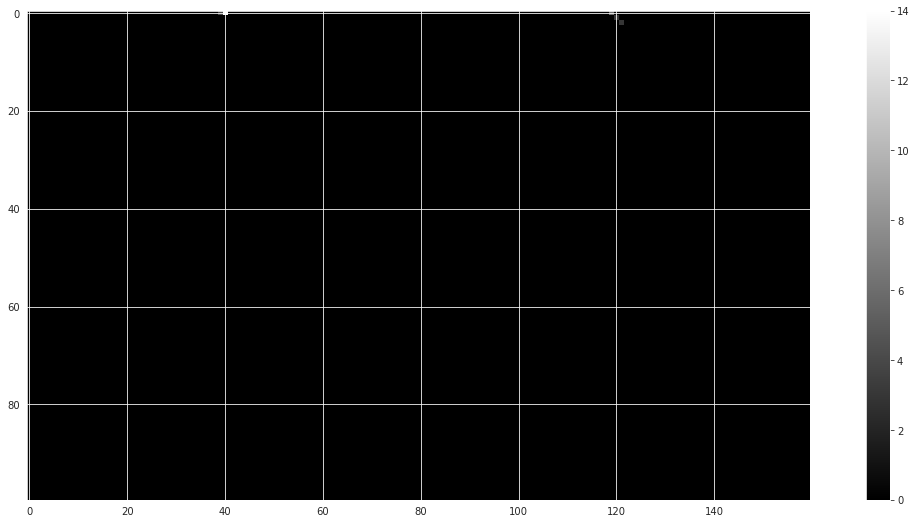

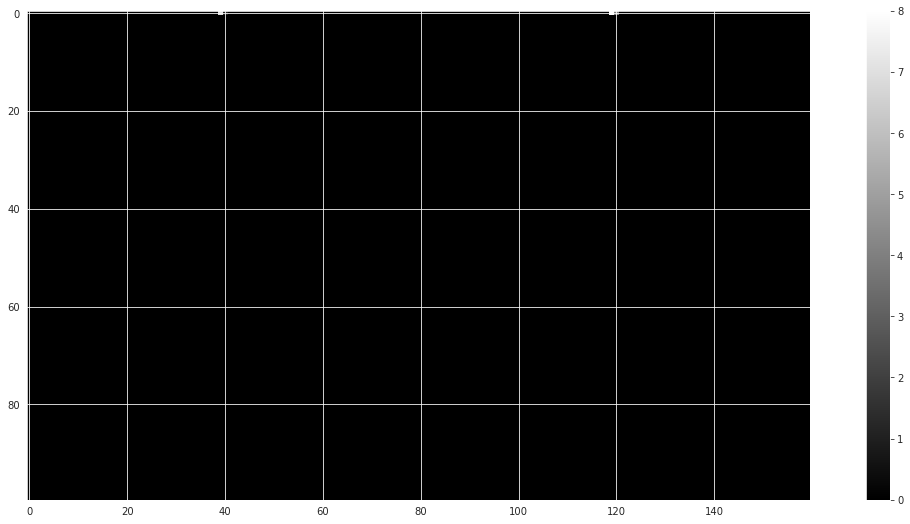

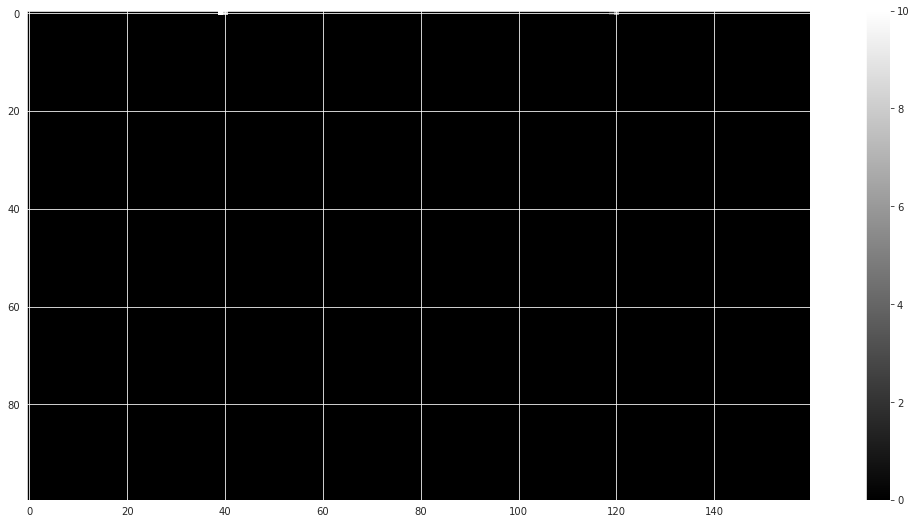

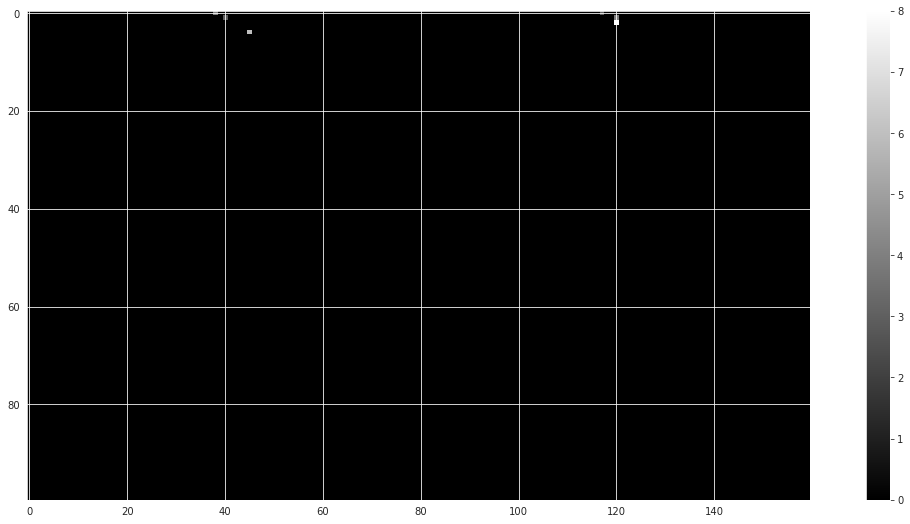

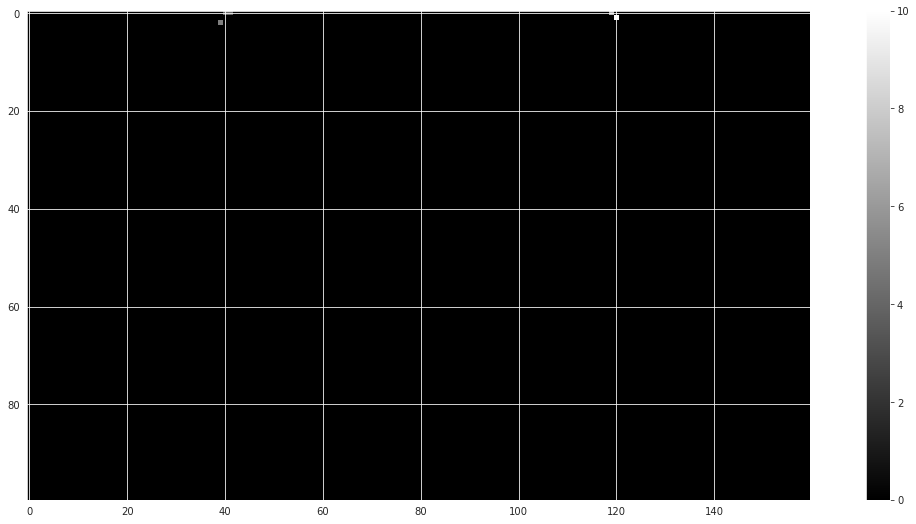

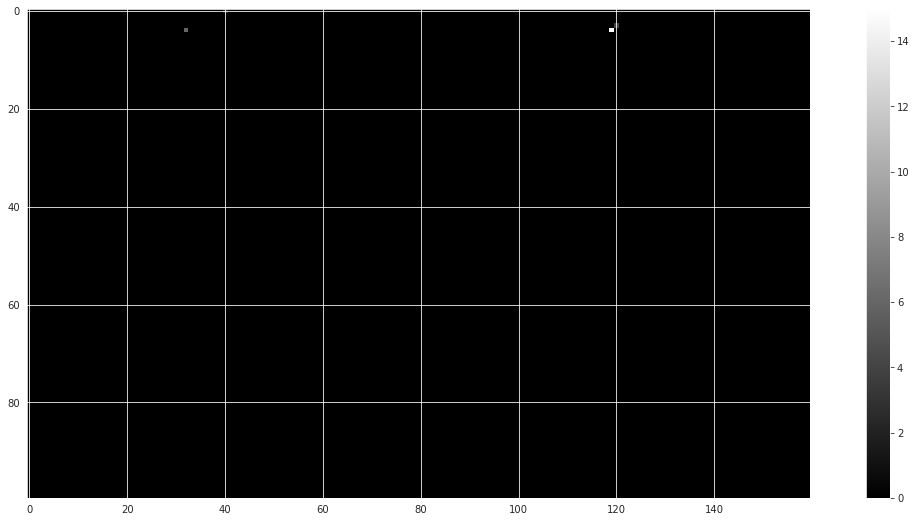

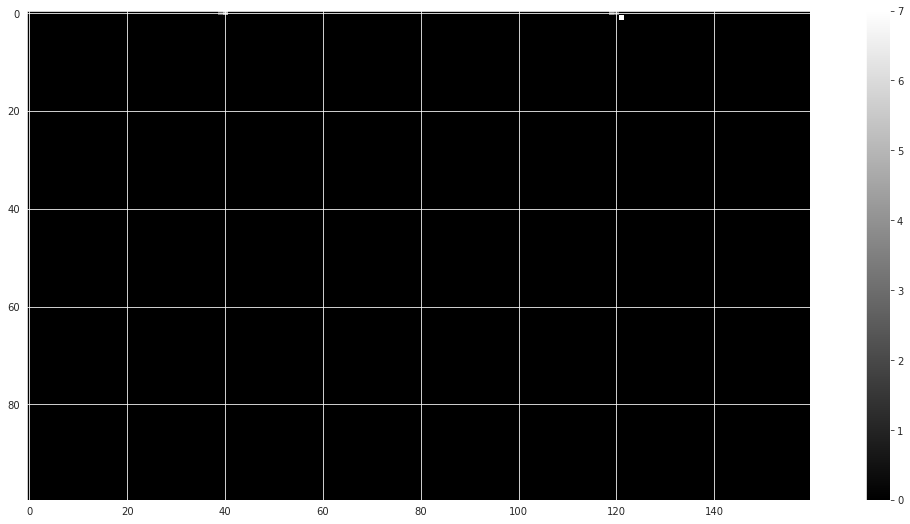

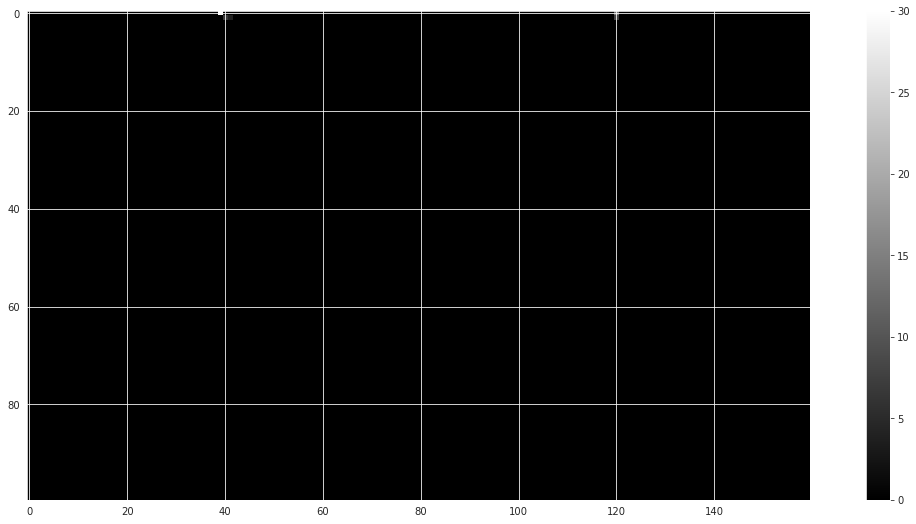

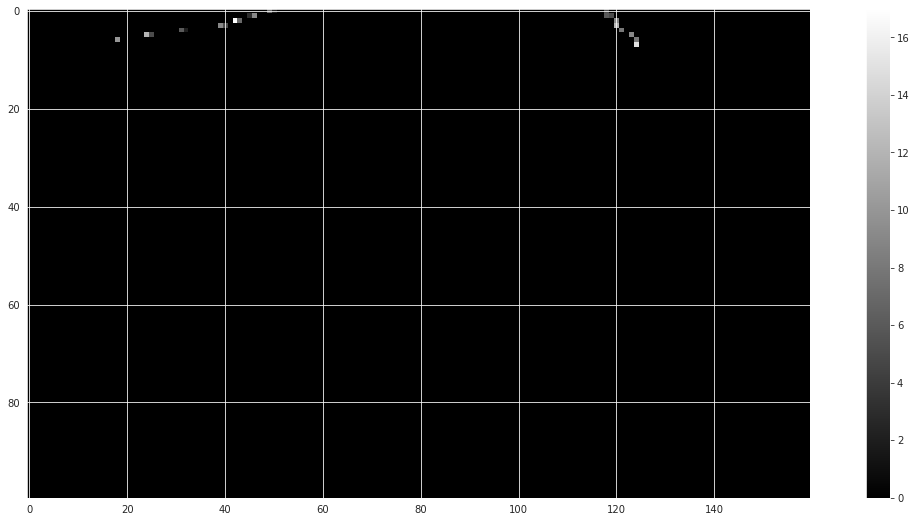

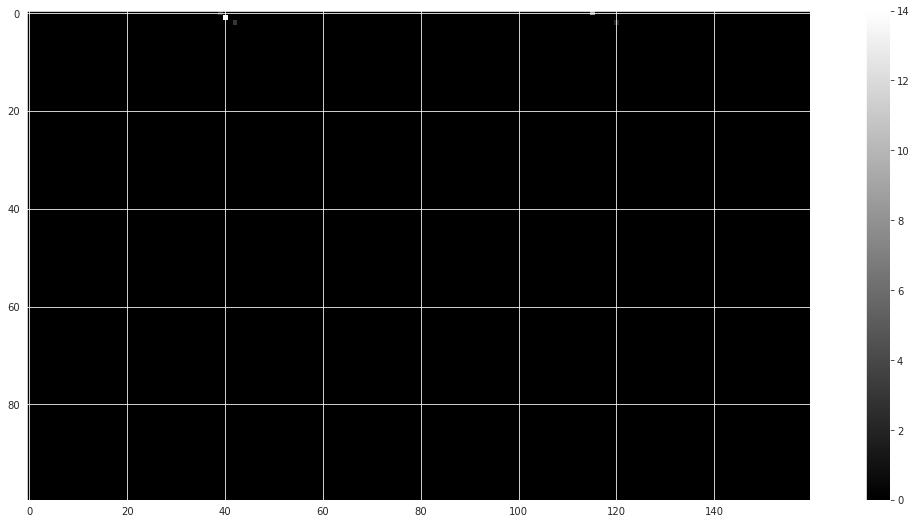

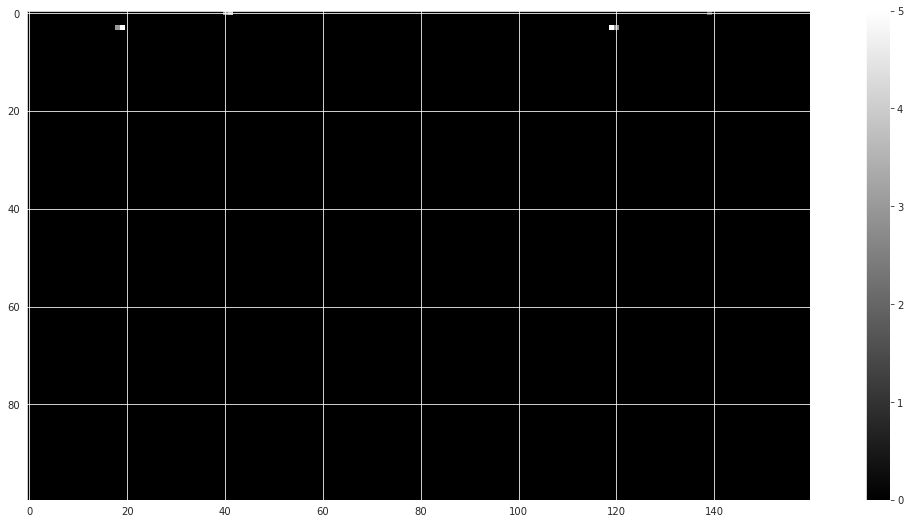

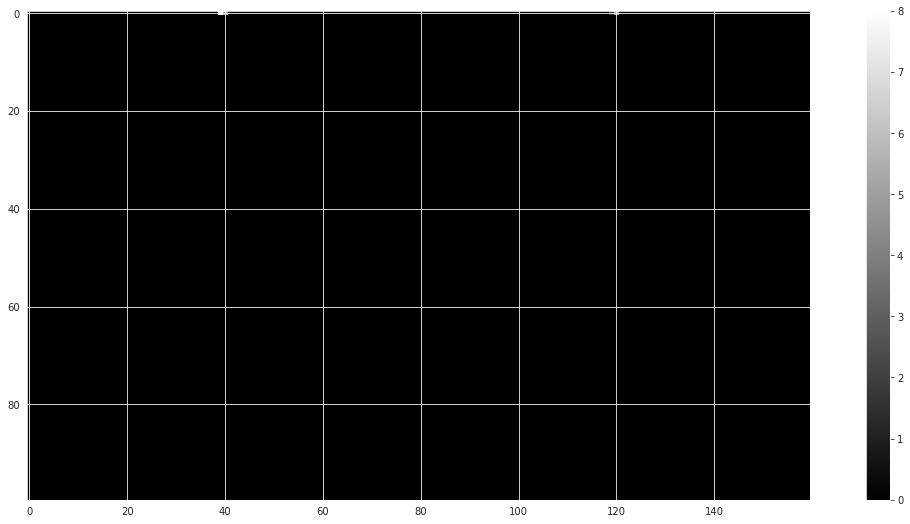

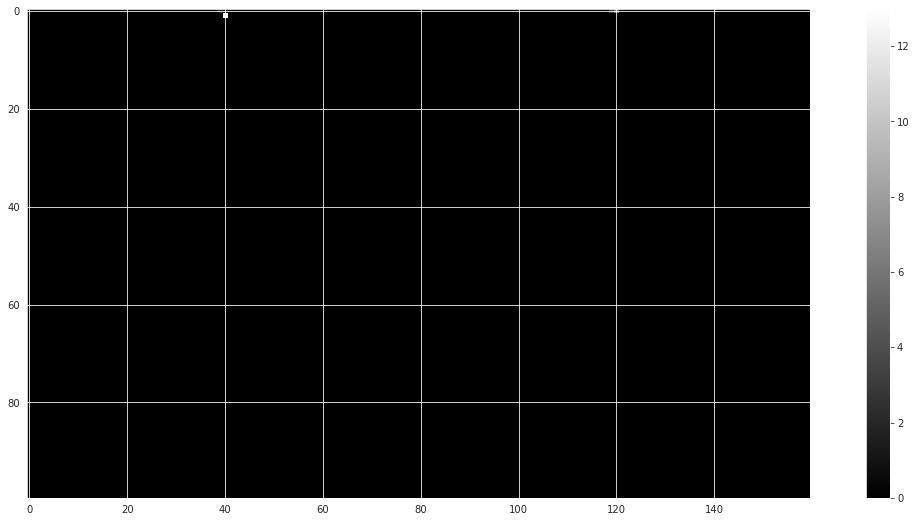

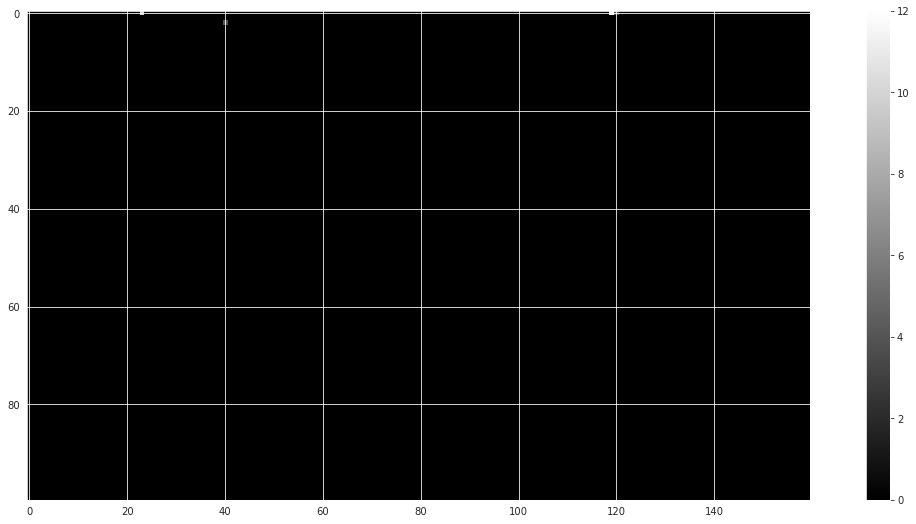

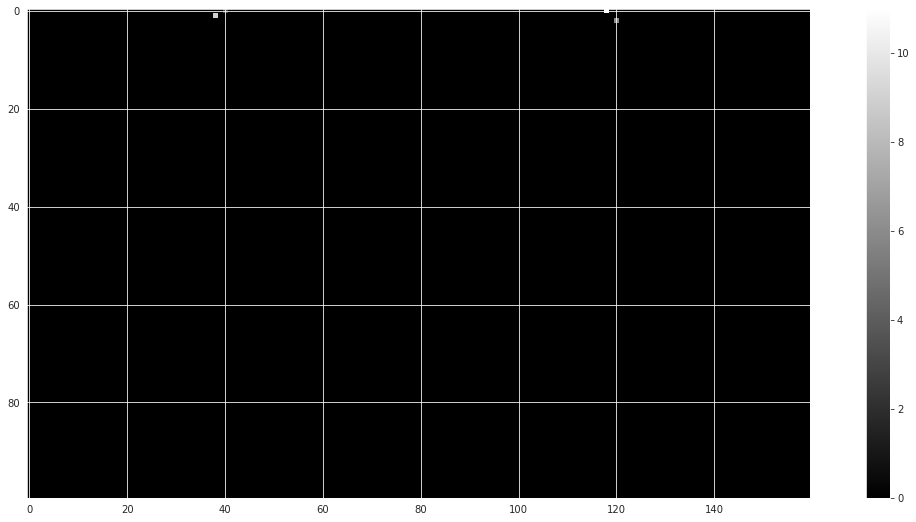

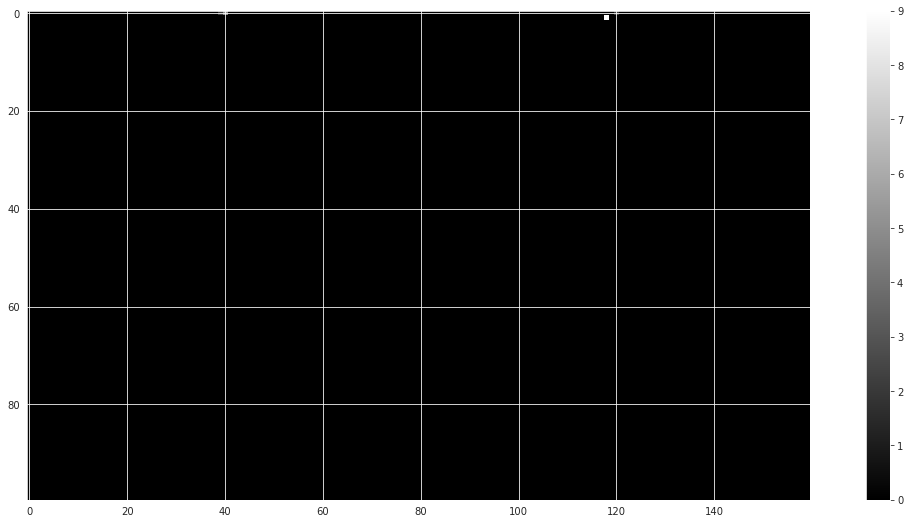

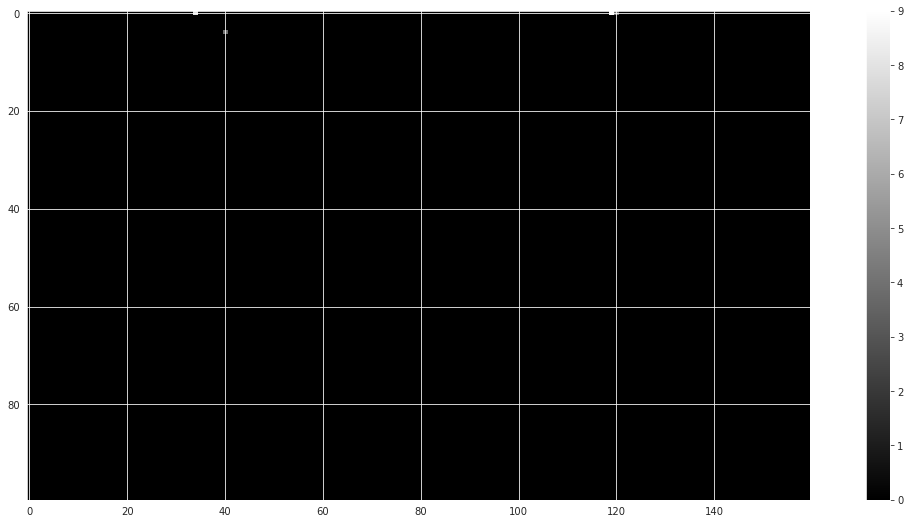

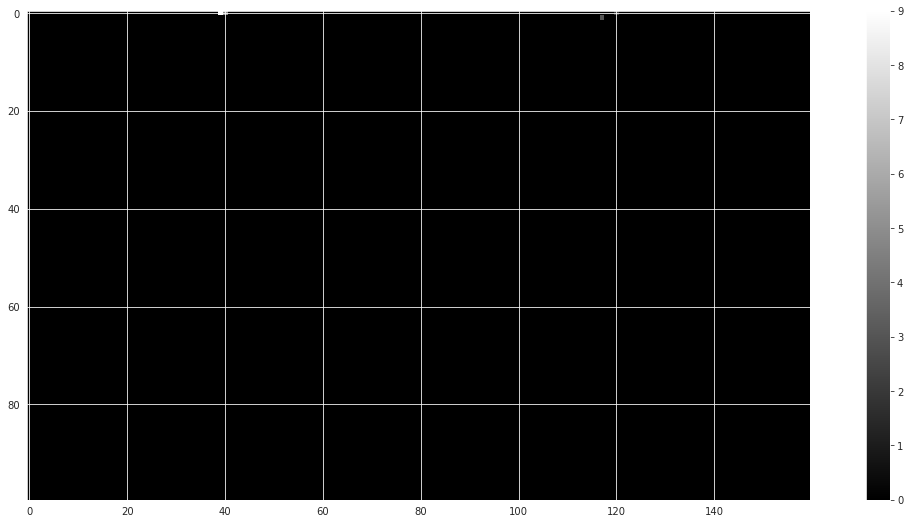

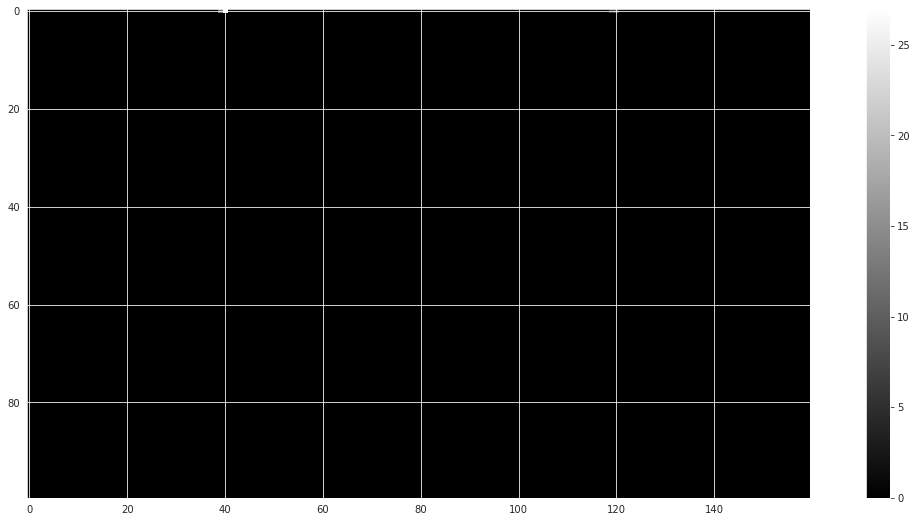

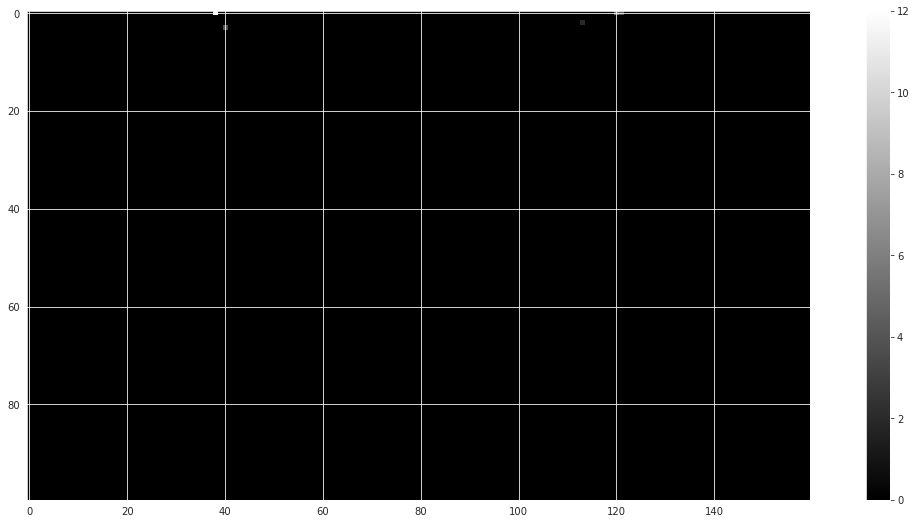

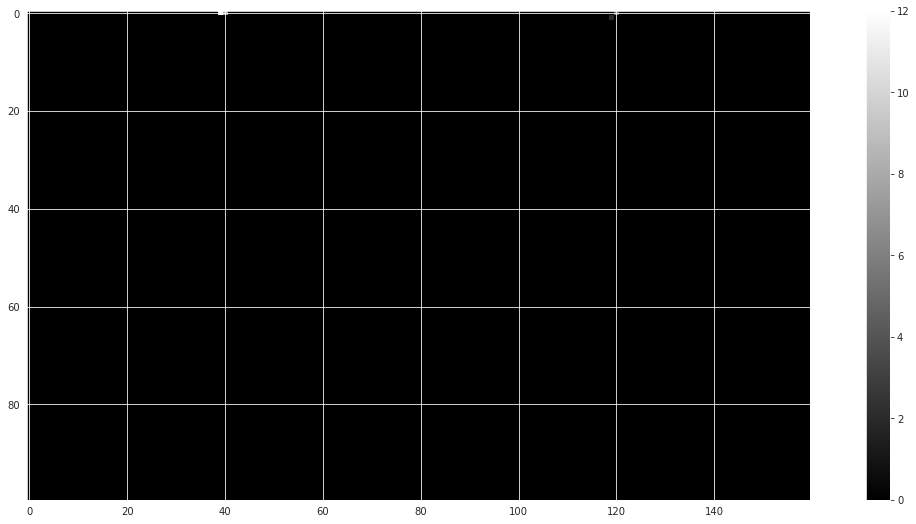

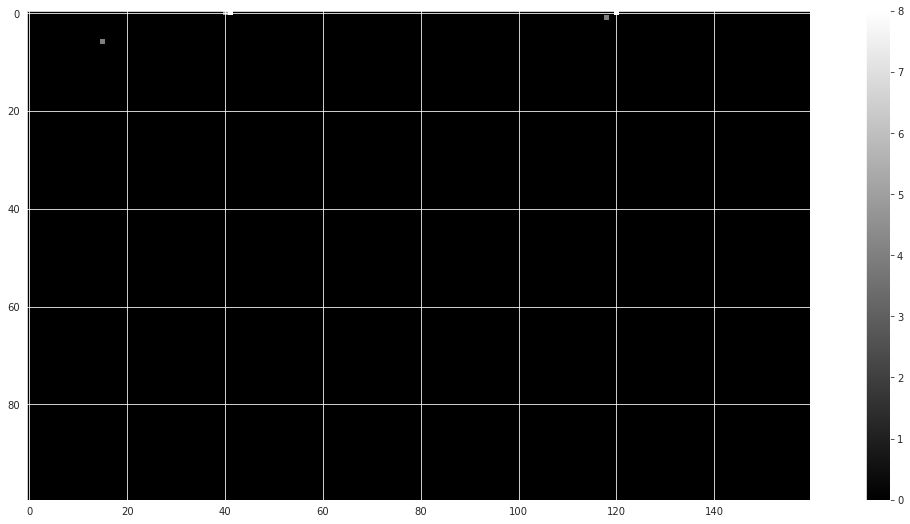

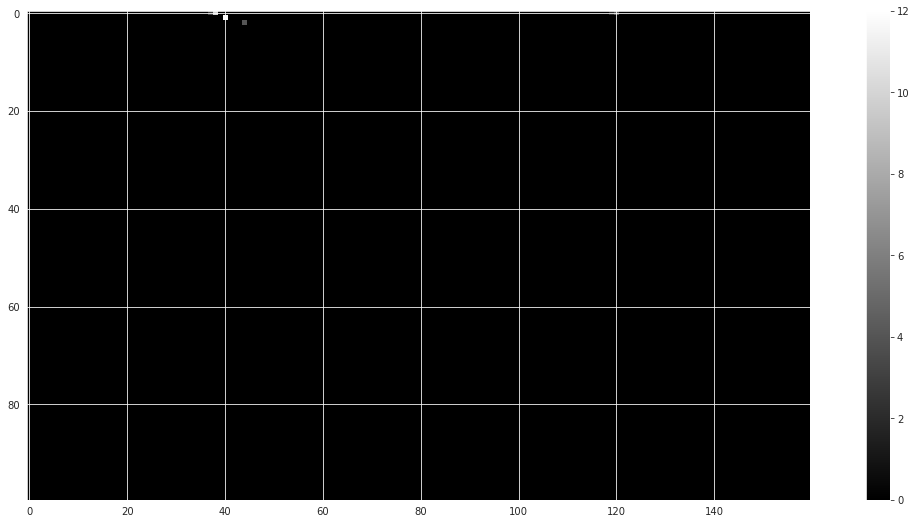

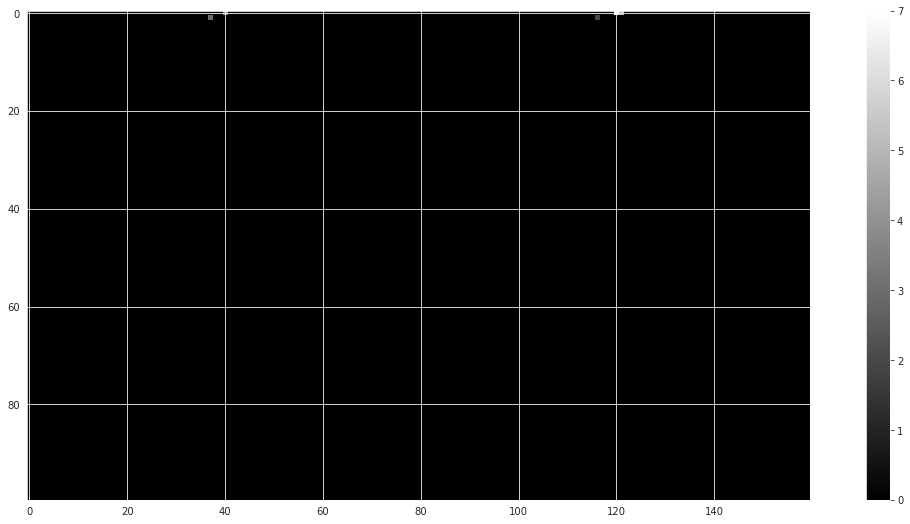

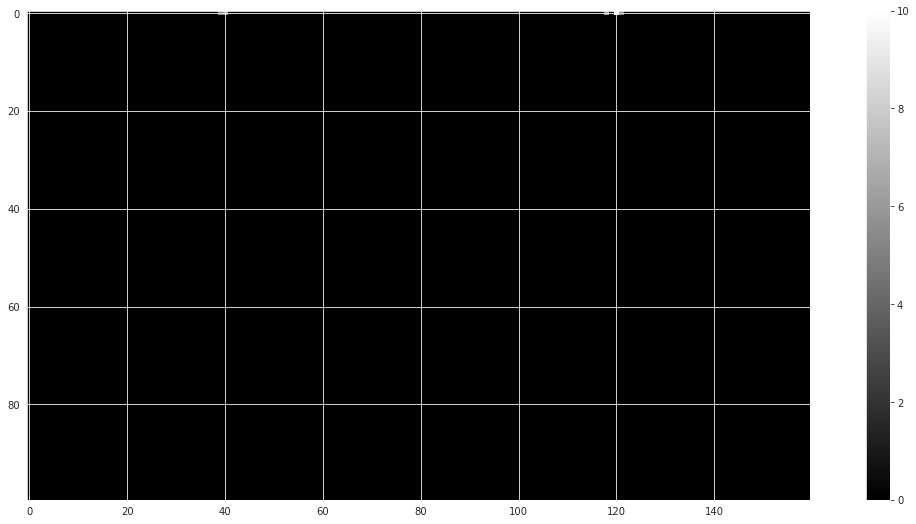

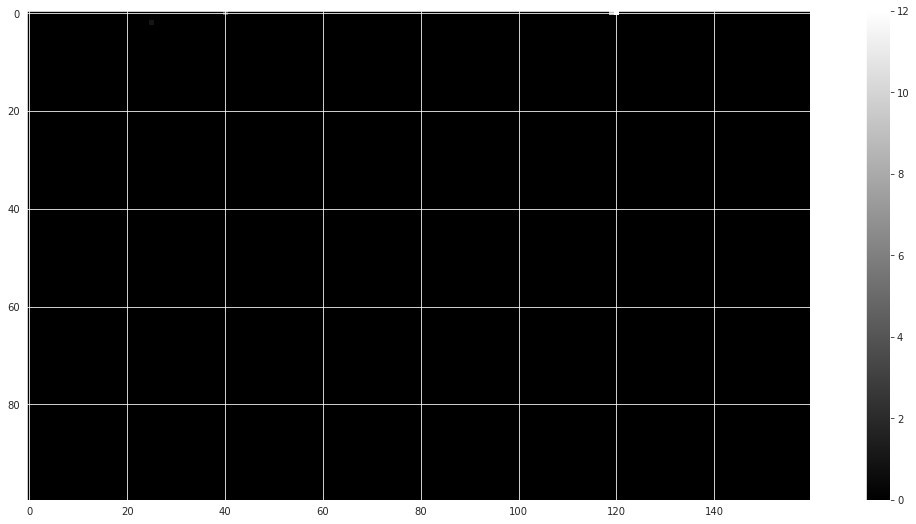

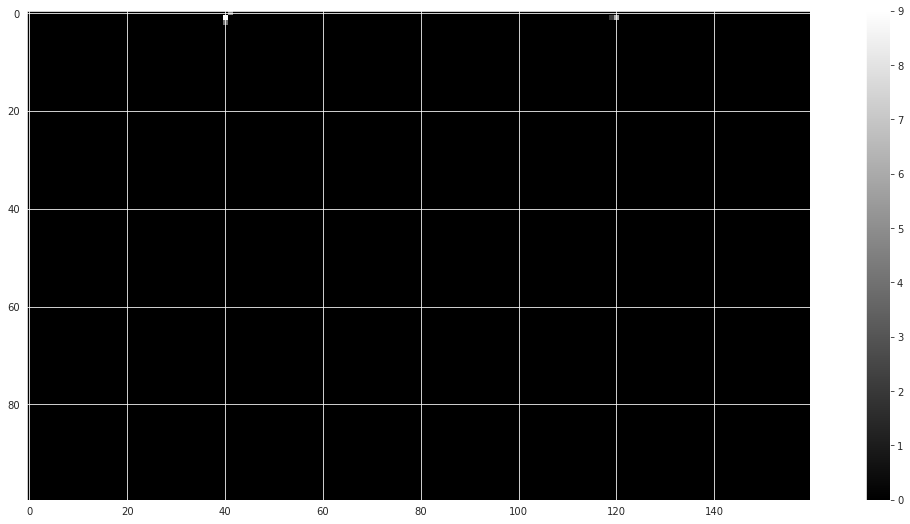

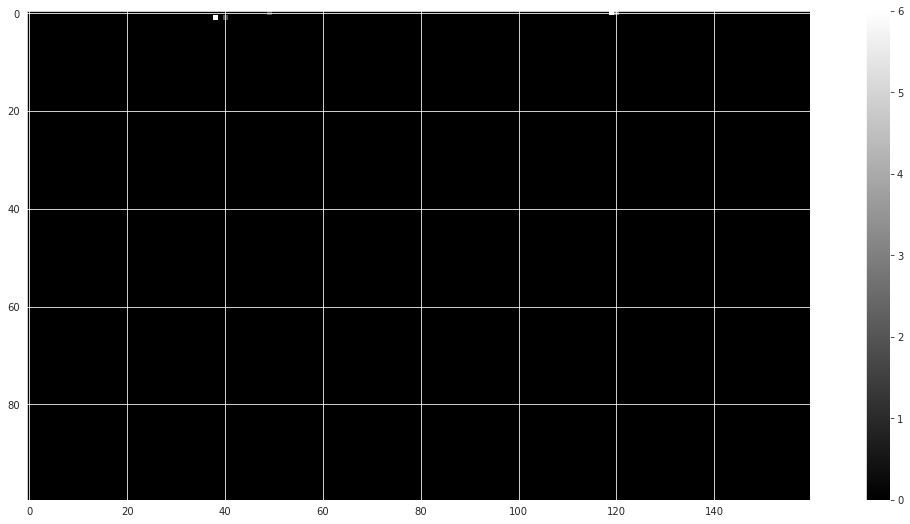

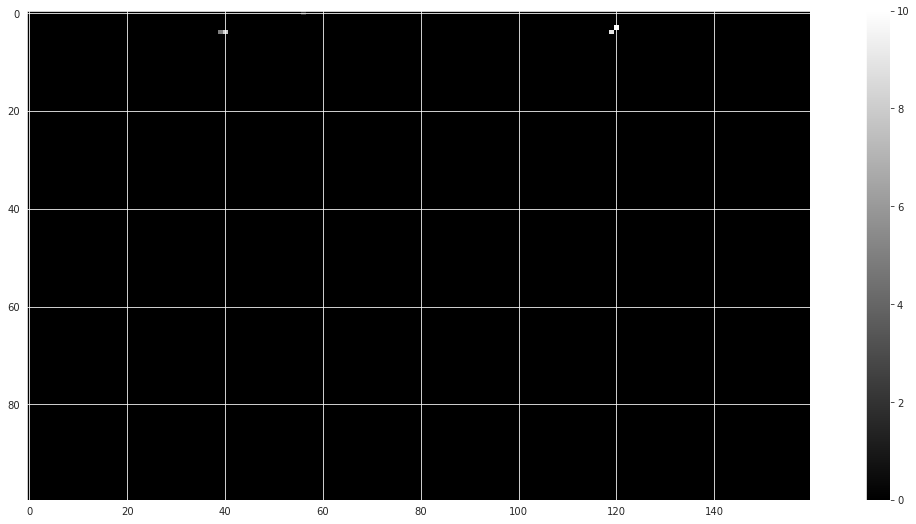

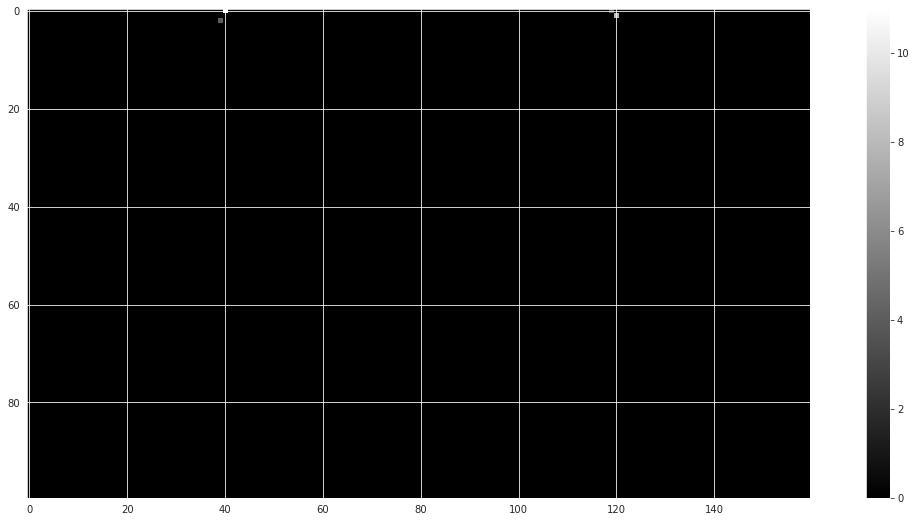

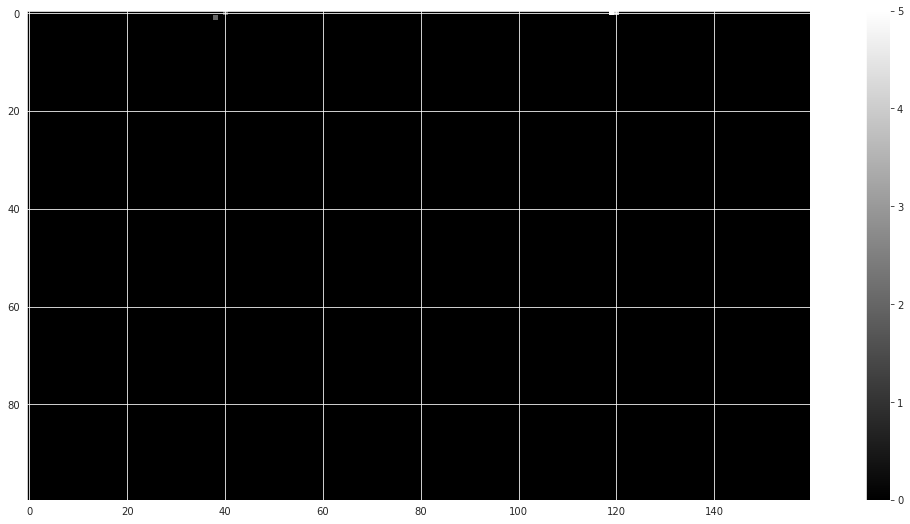

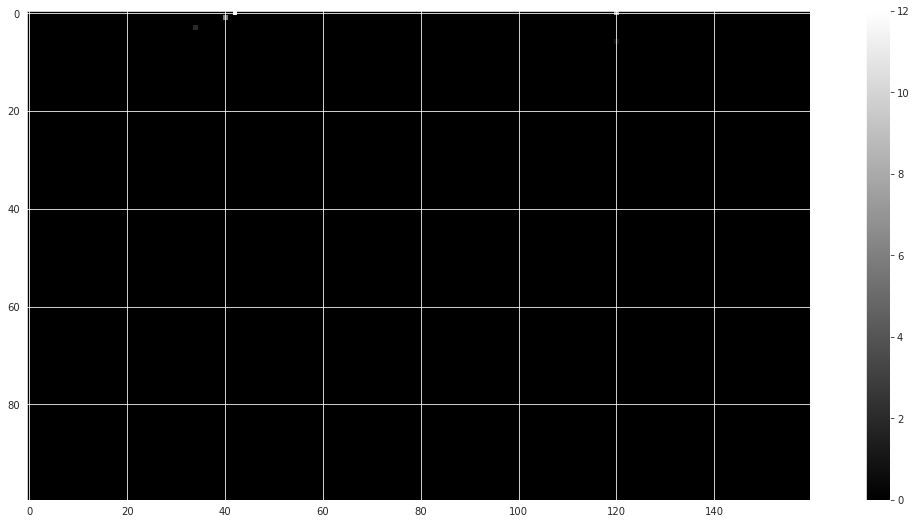

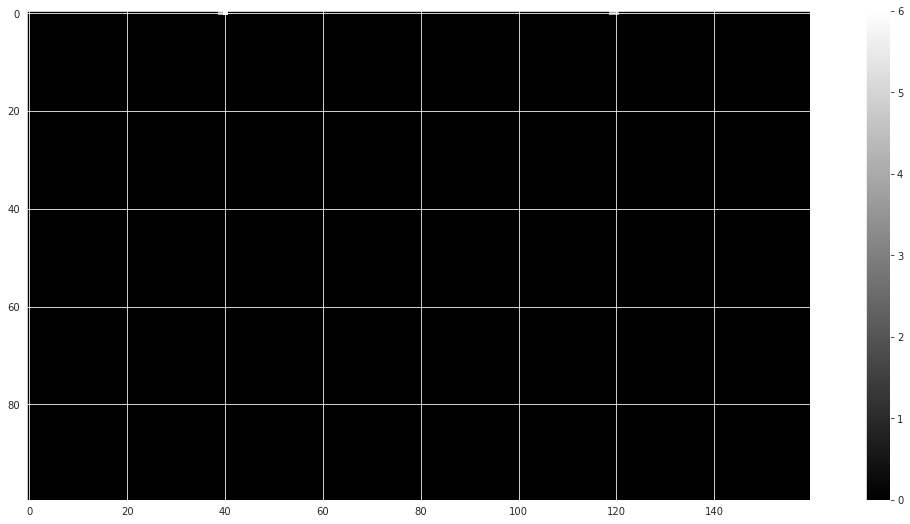

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



<Figure size 1440x648 with 0 Axes>

In [22]:
for i in df.index:
    pm=f['pm'][i]
    pm=pm.reshape((2,100,80))
    pm=np.concatenate((pm[0].reshape((100,80)),pm[1].reshape((100,80))),axis = 1)
    pm = np.stack((pm,)*3, axis=-1)
    max=np.max(pm)
    pm= pm /max
    plt.imshow(pm,cmap='gray',vmin=0, vmax=max)
    plt.colorbar()
    plt.show()
    img = im.fromarray((pm * 255).astype(np.uint8))
    img.save('./plots/muon pdm 0.72 - 0.78/'+str(i)+'pm.jpg')

'labels'